In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os

import json
import os

# Specify the path to your Kaggle API credentials JSON file
kaggle_json_path = '/content/kaggle(2).json'  # Update with the actual path

# Check if the JSON file exists
if os.path.exists(kaggle_json_path):
    with open(kaggle_json_path, 'r') as json_file:
        kaggle_credentials = json.load(json_file)

    # Extract username and key from the JSON file
    kaggle_username = kaggle_credentials['username']
    kaggle_key = kaggle_credentials['key']

    # Set Kaggle API credentials as environment variables
    os.environ['KAGGLE_USERNAME'] = kaggle_username
    os.environ['KAGGLE_KEY'] = kaggle_key
else:
    print("Kaggle API credentials JSON file not found.")


import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'
!kaggle datasets download -d obulisainaren/multi-cancer -p '/content/'




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
100% 8.61G/8.62G [02:12<00:00, 91.7MB/s]
100% 8.62G/8.62G [02:12<00:00, 70.0MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile('/content/multi-cancer.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
import random





import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout,AveragePooling2D
from tensorflow.keras.models import Model


from tensorflow.keras import Sequential

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import BatchNormalization, Input, Conv2D, MaxPooling2D, Flatten, Dense

# Define the common convolutional layers
from tensorflow.keras.layers import BatchNormalization, Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import BatchNormalization, Dropout, Flatten, Dense

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization, Input
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import PIL.Image as Image, PIL.ImageDraw as ImageDraw, PIL.ImageFont as ImageFont
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
np.random.seed(42)
allbening=[]
all_early=[]
all_pre=[]
all_pro=[]
for i in os.listdir('/content/Multi Cancer/ALL'):
    All=os.path.join('/content/Multi Cancer/ALL',i)
    for j in os.listdir(All):
        image_path=os.path.join(All,j)
        if i=='all_pro':
            #print(image_path)
            all_pro.append({'image_path':image_path,'sub_class':'all_pro','main_class':'All'})
        elif i=='all_early':
            #print(image_path)
            all_early.append({'image_path':image_path,'sub_class':'all_early','main_class':'All'})
        elif i=='all_pre':
            #print(image_path)
            all_pre.append({'image_path':image_path,'sub_class':'all_pre','main_class':'All'})
        elif i=='all_benign':
            #print(image_path)
            allbening.append({'image_path':image_path,'sub_class':'all_benign','main_class':'All'})

frac_value=0.5
df1=pd.DataFrame(allbening).sample(frac=frac_value,ignore_index=True)
df2=pd.DataFrame(all_early).sample(frac=frac_value,ignore_index=True)
df3=pd.DataFrame(all_pre).sample(frac=frac_value,ignore_index=True)
df4=pd.DataFrame(all_pro).sample(frac=frac_value,ignore_index=True)
all_bening_df=pd.concat([df1, df2,df3,df4])



BrainGlioma=[]
BrainMenin=[]
BrainTumor=[]
for i in os.listdir('/content/Multi Cancer/Brain Cancer'):
    All=os.path.join('/content/Multi Cancer/Brain Cancer',i)
    for j in os.listdir(All):
        image_path=os.path.join(All,j)
        if i=='brain_glioma':
            #print(image_path)
            BrainGlioma.append({'image_path':image_path,'sub_class':'brain_glioma','main_class':'BrainCancer'})
        elif i=='brain_menin':
            #print(image_path)
            BrainMenin.append({'image_path':image_path,'sub_class':'brain_menin','main_class':'BrainCancer'})
        elif i=='brain_tumor':
            #print(image_path)
            BrainTumor.append({'image_path':image_path,'sub_class':'brain_tumor','main_class':'BrainCancer'})
#         elif i=='all_benign':
#             #print(image_path)
#             allbening.append({'image_path':image_path,'sub_class':'all_benign','main_class':'BrainCancer'})


df21=pd.DataFrame(BrainGlioma).sample(frac=frac_value,ignore_index=True)
df22=pd.DataFrame(BrainMenin).sample(frac=frac_value,ignore_index=True)
df23=pd.DataFrame(BrainTumor).sample(frac=frac_value,ignore_index=True)
BrainCancerDf=pd.concat([df21, df22,df23])


BreastBenign=[]
BreastMalignant=[]

for i in os.listdir('/content/Multi Cancer/Breast Cancer'):
    All=os.path.join('/content/Multi Cancer/Breast Cancer',i)
    for j in os.listdir(All):
        image_path=os.path.join(All,j)
        if i=='breast_benign':
            #print(image_path)
            BreastBenign.append({'image_path':image_path,'sub_class':'BreastBenign','main_class':'BreastCancer'})
        elif i=='breast_malignant':
            #print(image_path)
            BreastMalignant.append({'image_path':image_path,'sub_class':'BreastMalignant','main_class':'BreastCancer'})
#         elif i=='brain_tumor':
#             #print(image_path)
#             BrainTumor.append({'image_path':image_path,'sub_class':'brain_tumor','main_class':'BrainCancer'})
# #         elif i=='all_benign':
#             #print(image_path)
#             allbening.append({'image_path':image_path,'sub_class':'all_benign','main_class':'BrainCancer'})

df31=pd.DataFrame(BreastBenign).sample(frac=frac_value,ignore_index=True)
df32=pd.DataFrame(BreastMalignant).sample(frac=frac_value,ignore_index=True)

BreastCancerDf=pd.concat([df31, df32])


cervix_dyk=[]
cervix_koc=[]
cervix_mep=[]
cervix_pab=[]
cervix_sfi=[]

for i in os.listdir('/content/Multi Cancer/Cervical Cancer'):
    All=os.path.join('/content/Multi Cancer/Cervical Cancer',i)
    for j in os.listdir(All):
        image_path=os.path.join(All,j)
        if i=='cervix_dyk':
            #print(image_path)
            cervix_dyk.append({'image_path':image_path,'sub_class':'cervix_dyk','main_class':'CervicalCancer'})
        elif i=='cervix_koc':
            #print(image_path)
            cervix_koc.append({'image_path':image_path,'sub_class':'cervix_koc','main_class':'CervicalCancer'})
        elif i=='cervix_mep':
            #print(image_path)
            cervix_mep.append({'image_path':image_path,'sub_class':'cervix_mep','main_class':'CervicalCancer'})
        elif i=='cervix_pab':
            #print(image_path)
            cervix_pab.append({'image_path':image_path,'sub_class':'cervix_pab','main_class':'CervicalCancer'})

        elif i=='cervix_sfi':
            #print(image_path)
            cervix_sfi.append({'image_path':image_path,'sub_class':'cervix_sfi','main_class':'CervicalCancer'})



#         elif i=='brain_tumor':
#             #print(image_path)
#             BrainTumor.append({'image_path':image_path,'sub_class':'brain_tumor','main_class':'BrainCancer'})
# #         elif i=='all_benign':
#             #print(image_path)
#             allbening.append({'image_path':image_path,'sub_class':'all_benign','main_class':'BrainCancer'})

df41=pd.DataFrame(cervix_dyk).sample(frac=frac_value,ignore_index=True)
df42=pd.DataFrame(cervix_koc).sample(frac=frac_value,ignore_index=True)
df43=pd.DataFrame(cervix_mep).sample(frac=frac_value,ignore_index=True)
df44=pd.DataFrame(cervix_pab).sample(frac=frac_value,ignore_index=True)
df45=pd.DataFrame(cervix_sfi).sample(frac=frac_value,ignore_index=True)
CervicalCancer=pd.concat([df41, df42,df43,df44,df45])

kidney_normal=[]
kidney_tumor=[]

for i in os.listdir('/content/Multi Cancer/Kidney Cancer'):
    All=os.path.join('/content/Multi Cancer/Kidney Cancer',i)
    for j in os.listdir(All):
        image_path=os.path.join(All,j)
        if i=='kidney_normal':
            #print(image_path)
            kidney_normal.append({'image_path':image_path,'sub_class':'kidney_normal','main_class':'KidneyCancer'})
        elif i=='kidney_tumor':
            #print(image_path)
            kidney_tumor.append({'image_path':image_path,'sub_class':'kidney_tumor','main_class':'KidneyCancer'})
#         elif i=='brain_tumor':
#             #print(image_path)
#             BrainTumor.append({'image_path':image_path,'sub_class':'brain_tumor','main_class':'BrainCancer'})
# #         elif i=='all_benign':
#             #print(image_path)
#             allbening.append({'image_path':image_path,'sub_class':'all_benign','main_class':'BrainCancer'})

df51=pd.DataFrame(kidney_normal).sample(frac=frac_value,ignore_index=True)
df52=pd.DataFrame(kidney_tumor).sample(frac=frac_value,ignore_index=True)

KidneyCancer=pd.concat([df51, df52])


colon_aca=[]
colon_bnt=[]
lung_aca=[]
lung_bnt=[]
lung_scc=[]

for i in os.listdir('/content/Multi Cancer/Lung and Colon Cancer'):
    All=os.path.join('/content/Multi Cancer/Lung and Colon Cancer',i)
    for j in os.listdir(All):
        image_path=os.path.join(All,j)
        if i=='colon_aca':
            #print(image_path)
            colon_aca.append({'image_path':image_path,'sub_class':'colon_aca','main_class':'ColonCancer'})
        elif i=='colon_bnt':
            #print(image_path)
            colon_bnt.append({'image_path':image_path,'sub_class':'colon_bnt','main_class':'ColonCancer'})
        elif i=='lung_aca':
            #print(image_path)
            lung_aca.append({'image_path':image_path,'sub_class':'lung_aca','main_class':'ColonCancer'})
        elif i=='lung_bnt':
            #print(image_path)
            lung_bnt.append({'image_path':image_path,'sub_class':'lung_bnt','main_class':'ColonCancer'})

        elif i=='lung_scc':
            #print(image_path)
            lung_scc.append({'image_path':image_path,'sub_class':'lung_scc','main_class':'ColonCancer'})



#         elif i=='brain_tumor':
#             #print(image_path)
#             BrainTumor.append({'image_path':image_path,'sub_class':'brain_tumor','main_class':'BrainCancer'})
# #         elif i=='all_benign':
#             #print(image_path)
#             allbening.append({'image_path':image_path,'sub_class':'all_benign','main_class':'BrainCancer'})

df61=pd.DataFrame(colon_aca).sample(frac=frac_value,ignore_index=True)
df62=pd.DataFrame(colon_bnt).sample(frac=frac_value,ignore_index=True)
df63=pd.DataFrame(lung_aca).sample(frac=frac_value,ignore_index=True)
df64=pd.DataFrame(lung_bnt).sample(frac=frac_value,ignore_index=True)
df65=pd.DataFrame(lung_scc).sample(frac=frac_value,ignore_index=True)
ColonCancer=pd.concat([df61, df62,df63,df64,df65])

lymph_cll=[]
lymph_fl=[]
lymp_mcl=[]
for i in os.listdir('/content/Multi Cancer/Lymphoma'):
    All=os.path.join('/content/Multi Cancer/Lymphoma',i)
    for j in os.listdir(All):
        image_path=os.path.join(All,j)
        if i=='lymph_cll':
            #print(image_path)
            lymph_cll.append({'image_path':image_path,'sub_class':'lymph_cll','main_class':'Lymphoma'})
        elif i=='lymph_fl':
            #print(image_path)
            lymph_fl.append({'image_path':image_path,'sub_class':'lymph_fl','main_class':'Lymphoma'})
        elif i=='lymp_mcl':
            #print(image_path)
            lymp_mcl.append({'image_path':image_path,'sub_class':'lymp_mcl','main_class':'Lymphoma'})
#         elif i=='all_benign':
#             #print(image_path)
#             allbening.append({'image_path':image_path,'sub_class':'all_benign','main_class':'BrainCancer'})


df71=pd.DataFrame(lymph_cll).sample(frac=frac_value,ignore_index=True)
df72=pd.DataFrame(lymph_fl).sample(frac=frac_value,ignore_index=True)
df73=pd.DataFrame(lymp_mcl).sample(frac=frac_value,ignore_index=True)
Lymphoma=pd.concat([df71, df72,df73])


oral_normal=[]
oral_scc=[]

for i in os.listdir('/content/Multi Cancer/Oral Cancer'):
    All=os.path.join('/content/Multi Cancer/Oral Cancer',i)
    for j in os.listdir(All):
        image_path=os.path.join(All,j)
        if i=='oral_normal':
            #print(image_path)
            oral_normal.append({'image_path':image_path,'sub_class':'oral_normal','main_class':'OralCancer'})
        elif i=='oral_scc':
            #print(image_path)
            oral_scc.append({'image_path':image_path,'sub_class':'oral_scc','main_class':'OralCancer'})

df81=pd.DataFrame(oral_normal).sample(frac=frac_value,ignore_index=True)
df82=pd.DataFrame(oral_scc).sample(frac=frac_value,ignore_index=True)

OralCancer=pd.concat([df81, df82])

combined=pd.concat([all_bening_df,BrainCancerDf,BreastCancerDf,CervicalCancer,KidneyCancer,ColonCancer,Lymphoma,OralCancer],ignore_index=True)




combined['int_main_class'] = pd.factorize(combined['main_class'])[0]
combined['int_sub_class'] = pd.factorize(combined['sub_class'])[0]


np.random.seed(42)
combined=combined.sample(frac=1)

In [ ]:
import pandas as pd
from tensorflow.keras.layers import LSTM, SimpleRNN, Concatenate,Reshape
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.models import Model

IMG_SIZE=100
# # Assuming 'main_class' and 'sub_class' are string columns, convert them to a categorical type
combined['main_class'] = combined['main_class'].astype('category')
combined['sub_class'] = combined['sub_class'].astype('category')

combined['main_class_code'] = combined['main_class'].cat.codes

# # Split the data into output block 1 (main_class) and output block 2 (sub_class)
output_block1_data = combined[['image_path', 'main_class','sub_class']]
output_block2_data = combined[['image_path', 'sub_class','main_class']]

output_block1_train, output_block1_val = train_test_split(output_block1_data, stratify=output_block1_data['sub_class'],test_size=0.2, random_state=42)
output_block1_val, output_block1_test = train_test_split(output_block1_val, stratify=output_block1_val['sub_class'],test_size=0.5, random_state=42)

output_block2_train, output_block2_val = train_test_split(output_block2_data,stratify=output_block2_data['sub_class'], test_size=0.2, random_state=42)
output_block2_val, output_block2_test = train_test_split(output_block2_val, stratify=output_block2_val['sub_class'],test_size=0.5, random_state=42)

datagen_main = ImageDataGenerator(rescale=1.0 / 255.0)

output_block1_batch_size = 512

output_block1_train_generator = datagen_main.flow_from_dataframe(
dataframe=output_block1_train,
     x_col='image_path',
     y_col='main_class',
     class_mode='categorical',
     target_size=(IMG_SIZE, IMG_SIZE),
     batch_size=output_block1_batch_size)
output_block1_val_generator = datagen_main.flow_from_dataframe(
     dataframe=output_block1_val,
     x_col='image_path',
     y_col='main_class',
     class_mode='categorical',
     target_size=(IMG_SIZE, IMG_SIZE),
     batch_size=output_block1_batch_size
 )

# # Train the main_class prediction model


output_block1_test_generator = datagen_main.flow_from_dataframe(
     dataframe=output_block1_test,
     x_col='image_path',
     y_col='main_class',
     class_mode='categorical',
     target_size=(IMG_SIZE, IMG_SIZE),
     batch_size=output_block1_batch_size
 )


Found 50000 validated image filenames belonging to 8 classes.
Found 6250 validated image filenames belonging to 8 classes.
Found 6250 validated image filenames belonging to 8 classes.


In [ ]:
from tensorflow.keras.models import load_model

# Load the main_class prediction model
import os

file_path = '/content/drive/MyDrive/IIUC ETE/main_class_prediction_model.h5'

if os.path.exists(file_path):
    loaded_model_main = load_model(file_path)
else:
    print(f"The file {file_path} does not exist.")





In [ ]:
import pandas as pd
from tensorflow.keras.layers import LSTM, SimpleRNN, Concatenate,Reshape
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16, Xception

# # Assuming 'main_class' and 'sub_class' are string columns, convert them to a categorical type
combined['main_class'] = combined['main_class'].astype('category')
combined['sub_class'] = combined['sub_class'].astype('category')

combined['main_class_code'] = combined['main_class'].cat.codes

# # Split the data into output block 1 (main_class) and output block 2 (sub_class)
output_block1_data = combined[['image_path', 'main_class','sub_class']]
output_block2_data = combined[['image_path', 'sub_class','main_class']]

output_block1_train, output_block1_val = train_test_split(output_block1_data, stratify=output_block1_data['sub_class'],test_size=0.2, random_state=42)
output_block1_val, output_block1_test = train_test_split(output_block1_val, stratify=output_block1_val['sub_class'],test_size=0.5, random_state=42)

output_block2_train, output_block2_val = train_test_split(output_block2_data,stratify=output_block2_data['sub_class'], test_size=0.2, random_state=42)
output_block2_val, output_block2_test = train_test_split(output_block2_val, stratify=output_block2_val['sub_class'],test_size=0.5, random_state=42)
# # Define the CNN model for main_class prediction
IMG_SIZE = 100


 # Create data generator for main_class prediction
datagen_main = ImageDataGenerator(rescale=1.0 / 255.0)

output_block1_batch_size = 512

output_block1_train_generator = datagen_main.flow_from_dataframe(
dataframe=output_block1_train,
     x_col='image_path',
     y_col='main_class',
     class_mode='categorical',
     target_size=(IMG_SIZE, IMG_SIZE),
     batch_size=output_block1_batch_size)
output_block1_val_generator = datagen_main.flow_from_dataframe(
     dataframe=output_block1_val,
     x_col='image_path',
     y_col='main_class',
     class_mode='categorical',
     target_size=(IMG_SIZE, IMG_SIZE),
     batch_size=output_block1_batch_size
 )

# # Train the main_class prediction model


output_block1_test_generator = datagen_main.flow_from_dataframe(
     dataframe=output_block1_test,
     x_col='image_path',
     y_col='main_class',
     class_mode='categorical',
     target_size=(IMG_SIZE, IMG_SIZE),
     batch_size=output_block1_batch_size
 )


Found 50000 validated image filenames belonging to 8 classes.
Found 6250 validated image filenames belonging to 8 classes.
Found 6250 validated image filenames belonging to 8 classes.


In [ ]:
loaded_model_main.evaluate(output_block1_val_generator)

 3/13 [=====>........................] - ETA: 13:27 - loss: 0.0110 - accuracy: 0.9961

KeyboardInterrupt: 

In [ ]:
y_predict=loaded_model_main.predict(output_block1_test_generator)

13/13 [==============================] - 1048s 79s/step


In [ ]:
y_predict[0]

array([4.0183221e-09, 1.8657886e-11, 5.5509325e-08, 9.9999982e-01,
       1.1609201e-09, 7.6567277e-12, 1.5598259e-11, 2.0453367e-08],
      dtype=float32)

In [2]:
correct_predictions = np.sum(np.argmax(y_predict, axis=1) == output_block1_test_generator.classes)


NameError: name 'np' is not defined

In [1]:
false_predictions=np.sum(np.argmax(y_predict,axis=1)!=output_block1_test_generator.classes)


NameError: name 'np' is not defined

In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
class_names = [f"Class {i+1}" for i in range(len(conf_matrix))]
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d')

plt.title('Confusion Matrix')
plt.show()

In [ ]:
predicted_class_indices=np.argmax(y_predict,axis=1)


labels = (output_block1_test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

[7,
 0,
 4,
 1,
 0,
 4,
 0,
 1,
 3,
 3,
 4,
 1,
 2,
 3,
 1,
 3,
 4,
 0,
 1,
 0,
 7,
 6,
 4,
 3,
 0,
 3,
 3,
 3,
 6,
 0,
 3,
 7,
 3,
 1,
 0,
 5,
 4,
 4,
 1,
 4,
 1,
 1,
 1,
 2,
 4,
 2,
 0,
 4,
 3,
 4,
 5,
 2,
 3,
 3,
 1,
 3,
 1,
 3,
 5,
 3,
 2,
 7,
 5,
 0,
 4,
 4,
 2,
 6,
 4,
 4,
 4,
 2,
 3,
 4,
 3,
 4,
 0,
 1,
 2,
 3,
 7,
 3,
 4,
 5,
 1,
 0,
 0,
 1,
 7,
 4,
 6,
 4,
 2,
 2,
 2,
 6,
 6,
 0,
 0,
 3,
 3,
 0,
 5,
 3,
 3,
 1,
 6,
 4,
 5,
 5,
 4,
 5,
 2,
 4,
 1,
 7,
 3,
 4,
 0,
 4,
 1,
 3,
 4,
 0,
 3,
 3,
 4,
 3,
 2,
 7,
 3,
 0,
 7,
 3,
 2,
 0,
 3,
 1,
 4,
 1,
 0,
 5,
 3,
 3,
 1,
 2,
 3,
 4,
 1,
 3,
 6,
 4,
 0,
 1,
 1,
 1,
 3,
 3,
 3,
 4,
 4,
 0,
 5,
 4,
 3,
 6,
 3,
 3,
 7,
 3,
 2,
 3,
 0,
 0,
 2,
 0,
 4,
 3,
 2,
 4,
 5,
 7,
 1,
 1,
 3,
 4,
 4,
 3,
 2,
 6,
 4,
 2,
 6,
 3,
 1,
 7,
 0,
 3,
 7,
 6,
 5,
 4,
 1,
 0,
 1,
 7,
 4,
 0,
 1,
 1,
 3,
 4,
 7,
 4,
 1,
 3,
 2,
 7,
 0,
 6,
 1,
 4,
 7,
 6,
 3,
 4,
 4,
 0,
 3,
 6,
 3,
 3,
 0,
 2,
 2,
 4,
 5,
 7,
 2,
 3,
 4,
 1,
 0,
 7,
 6,
 1,
 6,
 4,
 3,
 3,


In [ ]:
labels[0]

'All'

In [ ]:
combined

,image_path,sub_class,main_class,int_main_class,int_sub_class
59887,/content/Multi Cancer/Oral Cancer/oral_normal/...,oral_normal,OralCancer,7,23
53868,/content/Multi Cancer/Lymphoma/lymph_cll/lymph...,lymph_cll,Lymphoma,6,21
57287,/content/Multi Cancer/Lymphoma/lymph_fl/lymph_...,lymph_fl,Lymphoma,6,22
37007,/content/Multi Cancer/Kidney Cancer/kidney_nor...,kidney_normal,KidneyCancer,4,14
34309,/content/Multi Cancer/Cervical Cancer/cervix_s...,cervix_sfi,CervicalCancer,3,13
...,...,...,...,...,...
54343,/content/Multi Cancer/Lymphoma/lymph_cll/lymph...,lymph_cll,Lymphoma,6,21
38158,/content/Multi Cancer/Kidney Cancer/kidney_tum...,kidney_tumor,KidneyCancer,4,15
860,/content/Multi Cancer/ALL/all_benign/all_benig...,all_benign,All,0,0
15795,/content/Multi Cancer/Brain Cancer/brain_tumor...,brain_tumor,BrainCancer,1,6


In [ ]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(combined,stratify=combined['sub_class'],test_size=0.1,random_state=42)

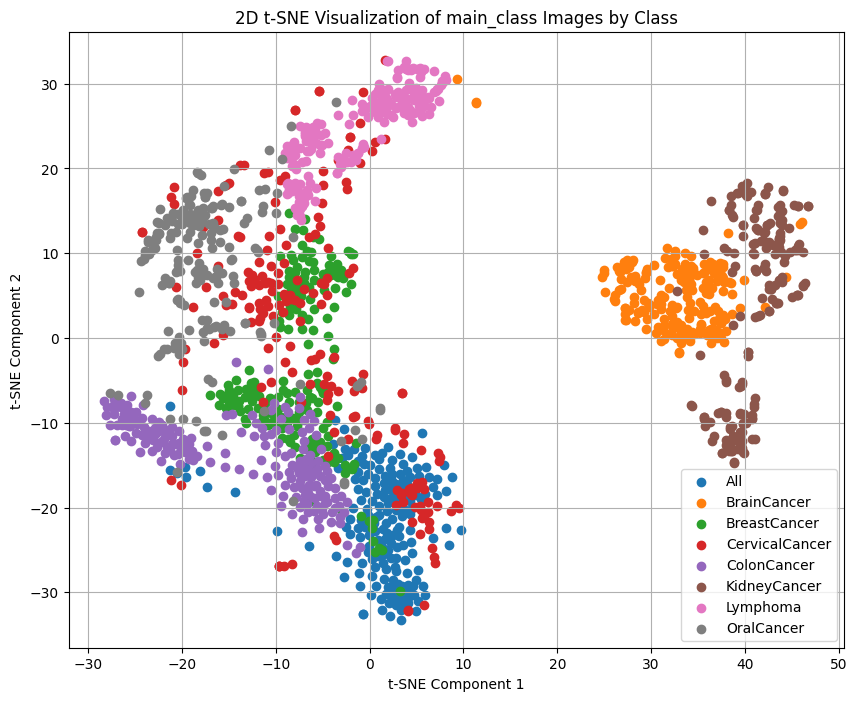

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

# Step 1: Load CSV file
df = test # Replace 'your_file.csv' with the path to your CSV file

# Sample 100 images per class
sampled_df = df.groupby('main_class').apply(lambda x: x.sample(min(len(x), 200))).reset_index(drop=True)

# Step 2: Read and preprocess images
image_size = (50, 50)  # You can adjust the image size as per your requirements
images = []
labels = []

for idx, row in sampled_df.iterrows():
    try:
        img = imread(row['image_path'])
        img = resize(img, image_size)
        images.append(img.flatten())  # Flatten the 2D image to 1D array
        labels.append(row['main_class'])
    except Exception as e:
        print(f"Error reading {row['image_path']}: {e}")

images = np.array(images)
labels = np.array(labels)

# Step 3: Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(images)

# Step 4: Plotting
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

plt.figure(figsize=(10, 8))
for i, class_name in enumerate(label_encoder.classes_):
    plt.scatter(tsne_results[labels_encoded == i, 0], tsne_results[labels_encoded == i, 1], label=class_name)

plt.title('2D t-SNE Visualization of main_class Images by Class')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)
plt.savefig('tsne_visualization_main_class.png')
plt.show()


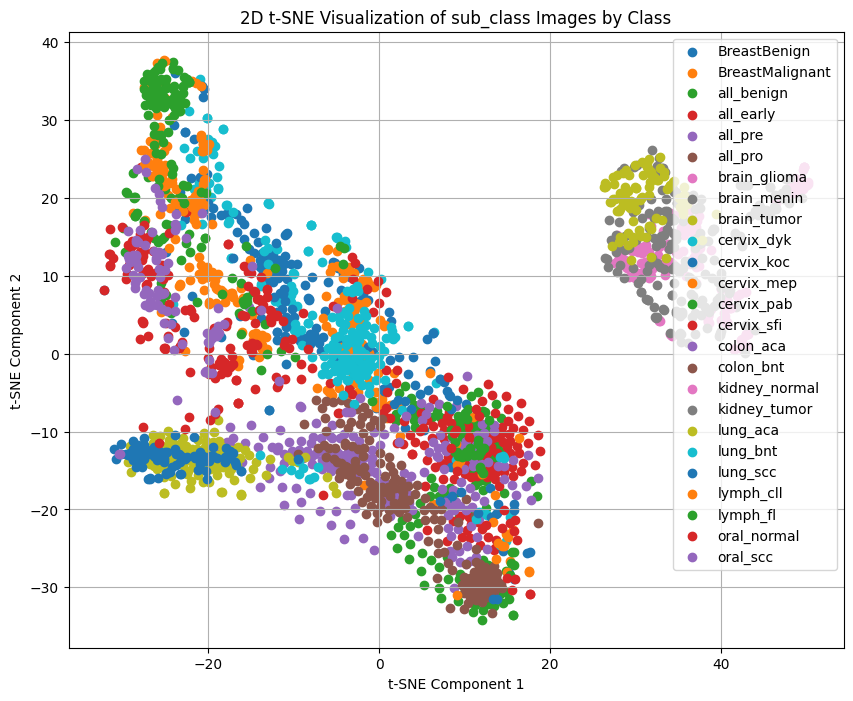

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

# Step 1: Load CSV file
df = test # Replace 'your_file.csv' with the path to your CSV file

# Sample 100 images per class
sampled_df = df.groupby('sub_class').apply(lambda x: x.sample(min(len(x), 100))).reset_index(drop=True)

# Step 2: Read and preprocess images
image_size = (50, 50)  # You can adjust the image size as per your requirements
images = []
labels = []

for idx, row in sampled_df.iterrows():
    try:
        img = imread(row['image_path'])
        img = resize(img, image_size)
        images.append(img.flatten())  # Flatten the 2D image to 1D array
        labels.append(row['sub_class'])
    except Exception as e:
        print(f"Error reading {row['image_path']}: {e}")

images = np.array(images)
labels = np.array(labels)

# Step 3: Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(images)

# Step 4: Plotting
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

plt.figure(figsize=(10, 8))
for i, class_name in enumerate(label_encoder.classes_):
    plt.scatter(tsne_results[labels_encoded == i, 0], tsne_results[labels_encoded == i, 1], label=class_name)

plt.title('2D t-SNE Visualization of sub_class Images by Class')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)
plt.savefig('tsne_visualization_main_class.png')
plt.show()


In [ ]:
a=[all_bening_df,
BrainCancerDf,
BreastCancerDf,
CervicalCancer,
KidneyCancer,
ColonCancer,
Lymphoma,
OralCancer]

In [ ]:
b=list(combined.main_class.unique())

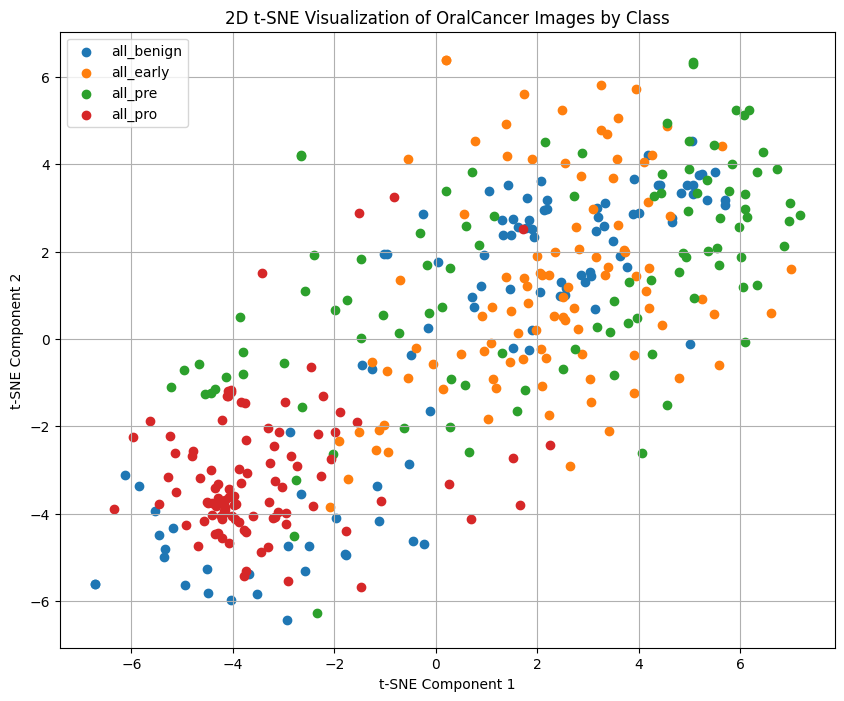

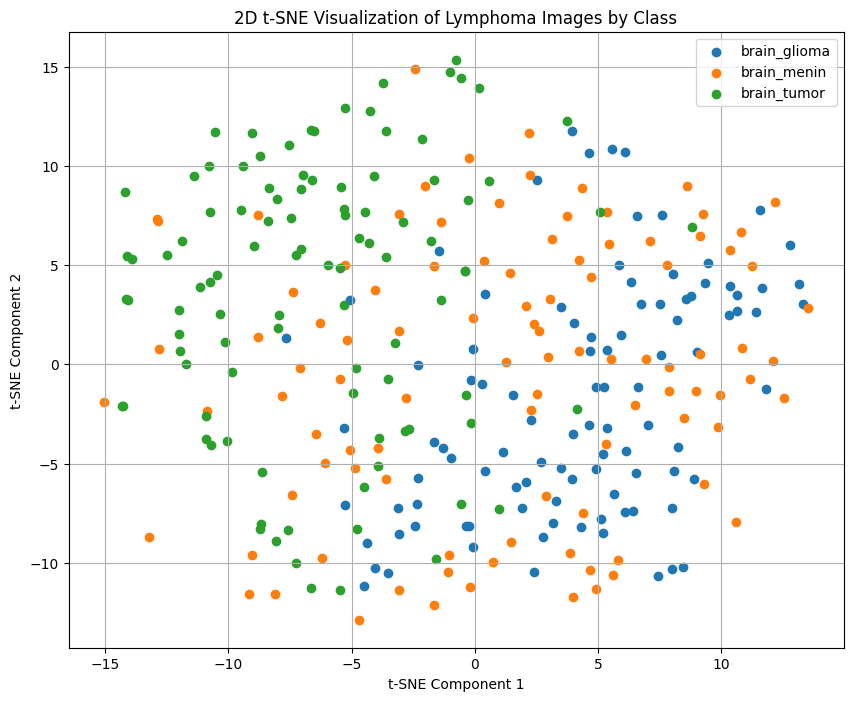

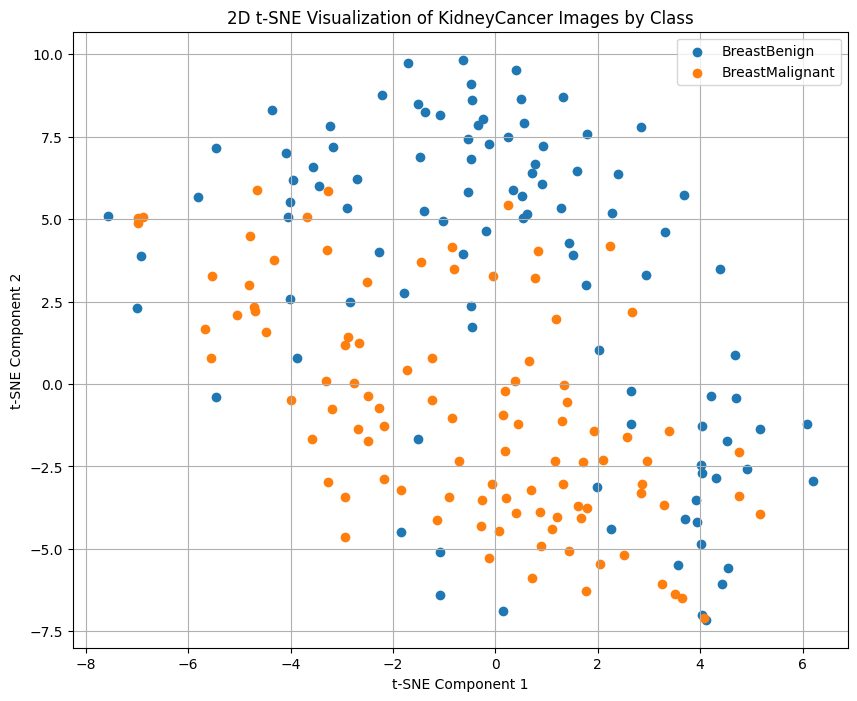

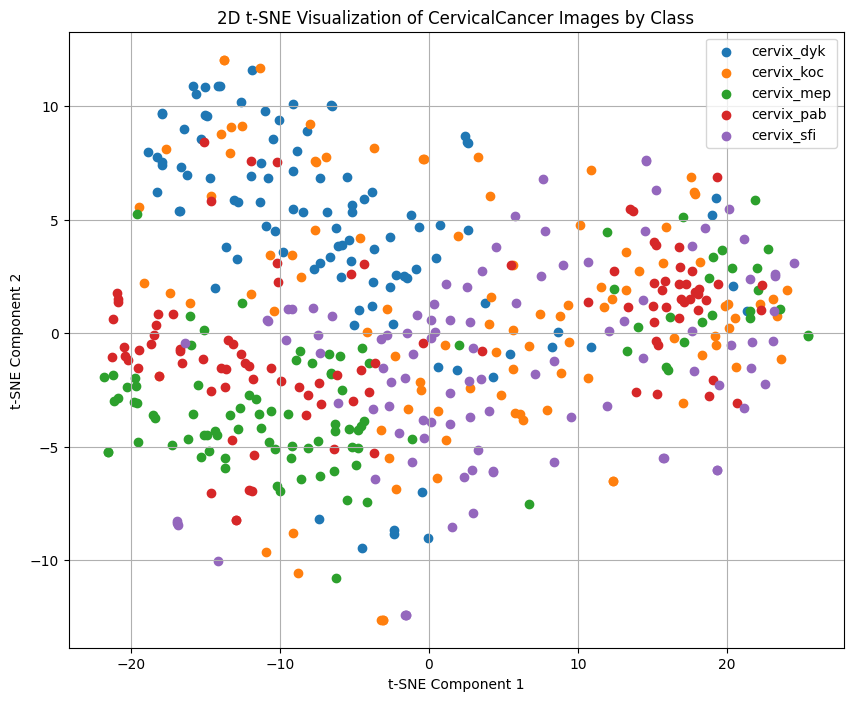

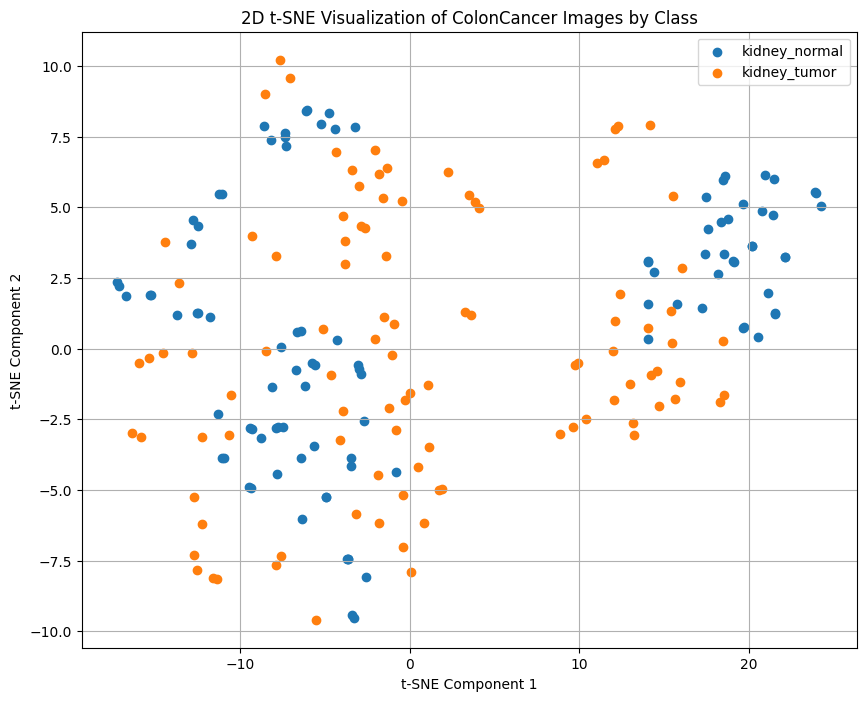

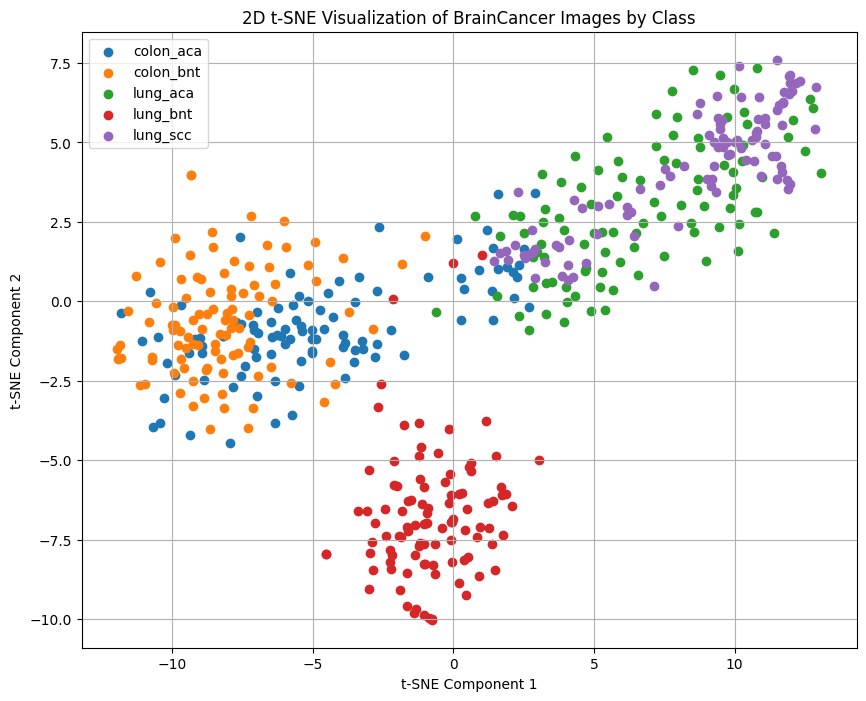

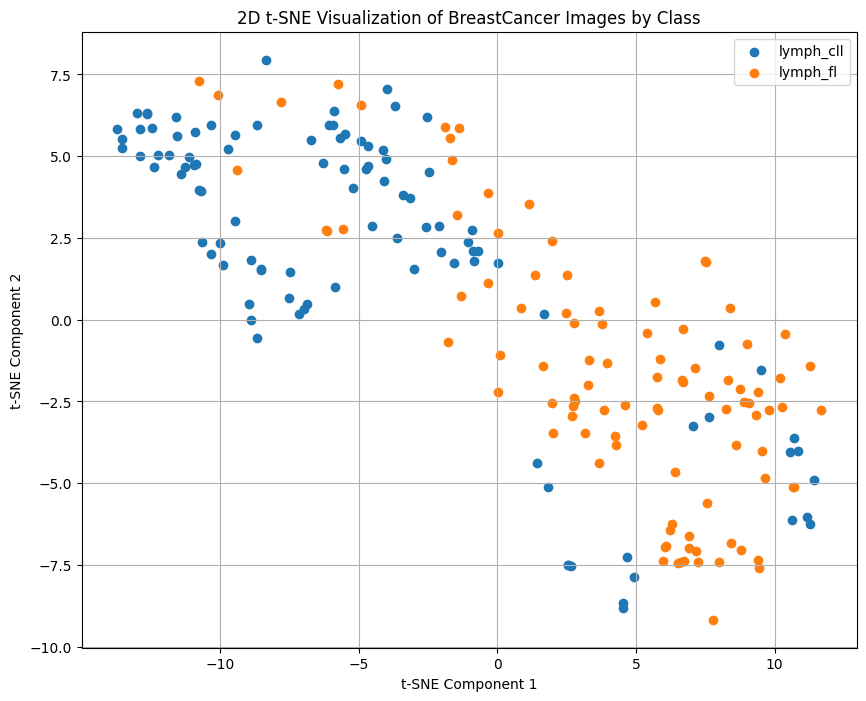

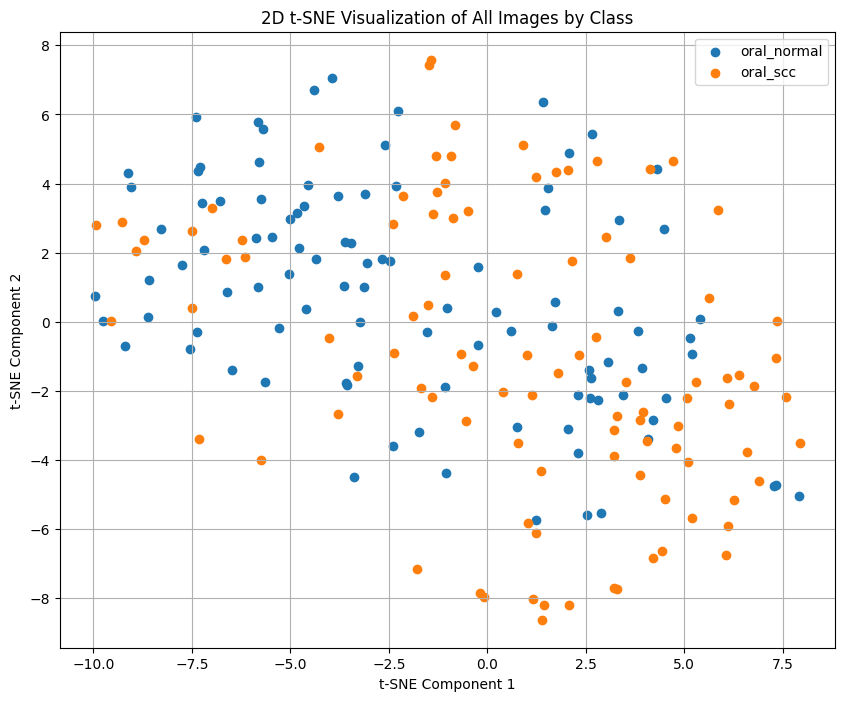

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

# Step 1: Load CSV file
k=0
for j,i in enumerate(a):

  df = i  # Replace 'your_file.csv' with the path to your CSV file

  # Sample 100 images per class
  sampled_df = df.groupby('sub_class').apply(lambda x: x.sample(min(len(x), 100))).reset_index(drop=True)

  # Step 2: Read and preprocess images
  image_size = (50, 50)  # You can adjust the image size as per your requirements
  images = []
  labels = []

  for idx, row in sampled_df.iterrows():
      try:
          img = imread(row['image_path'])
          img = resize(img, image_size)
          images.append(img.flatten())  # Flatten the 2D image to 1D array
          labels.append(row['sub_class'])
      except Exception as e:
          print(f"Error reading {row['image_path']}: {e}")

  images = np.array(images)
  labels = np.array(labels)

  # Step 3: Dimensionality reduction using t-SNE
  tsne = TSNE(n_components=2, random_state=42)
  tsne_results = tsne.fit_transform(images)

  # Step 4: Plotting
  label_encoder = LabelEncoder()
  labels_encoded = label_encoder.fit_transform(labels)

  plt.figure(figsize=(10, 8))
  for i, class_name in enumerate(label_encoder.classes_):
      plt.scatter(tsne_results[labels_encoded == i, 0], tsne_results[labels_encoded == i, 1], label=class_name)

  plt.title(f'2D t-SNE Visualization of {str(b[k])} Images by Class')
  plt.xlabel('t-SNE Component 1')
  plt.ylabel('t-SNE Component 2')
  plt.legend()
  plt.grid(True)
  plt.savefig(f'tsne_visualization_ {str(b[k])}.png')
  plt.show()
  k+=1

array(['OralCancer', 'Lymphoma', 'KidneyCancer', 'CervicalCancer',
       'ColonCancer', 'BrainCancer', 'BreastCancer', 'All'], dtype=object)

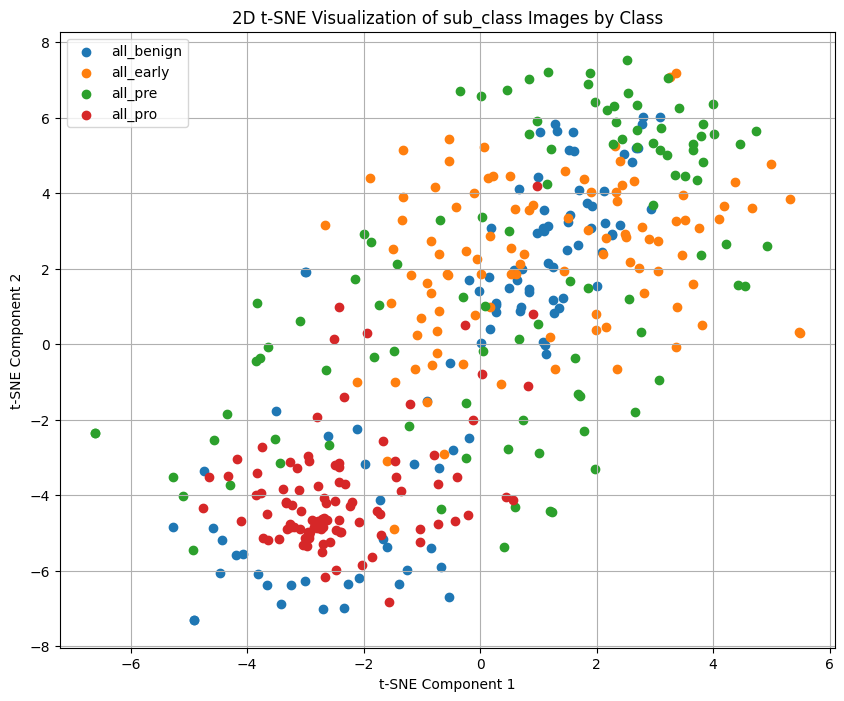

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

# Step 1: Load CSV file
df = CervicalCancer # Replace 'your_file.csv' with the path to your CSV file

# Sample 100 images per class
sampled_df = df.groupby('sub_class').apply(lambda x: x.sample(min(len(x), 100))).reset_index(drop=True)

# Step 2: Read and preprocess images
image_size = (50, 50)  # You can adjust the image size as per your requirements
images = []
labels = []

for idx, row in sampled_df.iterrows():
    try:
        img = imread(row['image_path'])
        img = resize(img, image_size)
        images.append(img.flatten())  # Flatten the 2D image to 1D array
        labels.append(row['sub_class'])
    except Exception as e:
        print(f"Error reading {row['image_path']}: {e}")

images = np.array(images)
labels = np.array(labels)

# Step 3: Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(images)

# Step 4: Plotting
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

plt.figure(figsize=(10, 8))
for i, class_name in enumerate(label_encoder.classes_):
    plt.scatter(tsne_results[labels_encoded == i, 0], tsne_results[labels_encoded == i, 1], label=class_name)

plt.title('2D t-SNE Visualization of sub_class Images by Class')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)
plt.savefig('tsne_visualization_ALL.png')
plt.show()

In [ ]:
import pandas as pd
import os
import re
np.random.seed(42)
# Your existing code to create the DataFrame
data = []
folder_path = '/content/Multicancer all classes (7 cancer_ 23 classes combined)/augmentend train'

for folder_name in os.listdir(folder_path):
    folder_full_path = os.path.join(folder_path, folder_name)
    if os.path.isdir(folder_full_path):
        for image_name in os.listdir(folder_full_path):
            image_path = os.path.join(folder_full_path, image_name)
            folder_parts = re.split(r'[_\s]+', folder_name)
            main_class = folder_parts[0]
            sub_class = ' '.join(folder_parts)
            data.append([image_path, main_class, sub_class])

# Create a DataFrame
train_df = pd.DataFrame(data, columns=['image_path', 'main_class', 'sub_class'])

# Sample 25% of data for each subclass
train_df = train_df.groupby('sub_class', group_keys=False).apply(lambda x: x.sample(frac=0.25, random_state=42))

# Display the sampled DataFrame



train_df['int_main_class'] = pd.factorize(train_df['main_class'])[0]
train_df['int_sub_class'] = pd.factorize(train_df['sub_class'])[0]
import os
import pandas as pd
import re

data = []

folder_path = '/content/Multicancer all classes (7 cancer_ 23 classes combined)/val'

for folder_name in os.listdir(folder_path):
    folder_full_path = os.path.join(folder_path, folder_name)
    if os.path.isdir(folder_full_path):
        for image_name in os.listdir(folder_full_path):
            image_path = os.path.join(folder_full_path, image_name)
            folder_parts = re.split(r'[_\s]+', folder_name)
            main_class = folder_parts[0]
            sub_class = ' '.join(folder_parts)
            data.append([image_path, main_class, sub_class])

# Create a DataFrame
val_df = pd.DataFrame(data, columns=['image_path', 'main_class', 'sub_class'])
val_df = val_df.groupby('sub_class', group_keys=False).apply(lambda x: x.sample(frac=0.25, random_state=42))
val_df['int_main_class'] = pd.factorize(val_df['main_class'])[0]
val_df['int_sub_class'] = pd.factorize(val_df['sub_class'])[0]


data = []

folder_path = '/content/Multicancer all classes (7 cancer_ 23 classes combined)/test'

for folder_name in os.listdir(folder_path):
    folder_full_path = os.path.join(folder_path, folder_name)
    if os.path.isdir(folder_full_path):
        for image_name in os.listdir(folder_full_path):
            image_path = os.path.join(folder_full_path, image_name)
            folder_parts = re.split(r'[_\s]+', folder_name)
            main_class = folder_parts[0]
            sub_class = ' '.join(folder_parts)
            data.append([image_path, main_class, sub_class])

# Create a DataFrame
test_df = pd.DataFrame(data, columns=['image_path', 'main_class', 'sub_class'])
test_df = test_df.groupby('sub_class', group_keys=False).apply(lambda x: x.sample(frac=0.5, random_state=42))
test_df['int_main_class'] = pd.factorize(test_df['main_class'])[0]
test_df['int_sub_class'] = pd.factorize(test_df['sub_class'])[0]

np.random.seed(42)

image_size=75
import tensorflow as tf
batch_size = 256
class CancerImageDataGenerator(tf.keras.utils.Sequence):
    def __init__(self,data=train_df,batch_size=batch_size,image_size=(image_size,image_size)):
        self.data=data
        self.image_size=image_size
        self.batch_size=batch_size
        self.num_main_class=len(self.data.main_class.unique())
        self.num_sub_class=len(self.data.sub_class.unique())
        self.indexes=np.arange(len(self.data))
        self.current_index = 0
    def __len__(self):
        return int(np.ceil(len(self.data)/self.batch_size))

    def __getitem__(self, index):
        start_idx = index * self.batch_size
        end_idx = (index + 1) * self.batch_size

        batch_indexes = self.indexes[start_idx:end_idx]
        X, y_main, y_sub = self.__data_generation(batch_indexes)

        return X, [y_main, y_sub]

    def on_epoch_end(self):
        np.random.shuffle(self.indexes)
    def __iter__(self):
        return self
    def __next__(self):
        if self.current_index >= len(self):
            # If we have iterated over all batches, reset the index and raise StopIteration
            self.current_index = 0
            raise StopIteration
        else:
            # Get the next batch and increment the current index
            batch_X, batch_Y = self.__getitem__(self.current_index)
            self.current_index += 1
            return batch_X, batch_Y

    def __data_generation(self, batch_indexes):
        X = np.empty((len(batch_indexes), *self.image_size, 3))
        y_main = np.empty((len(batch_indexes)), dtype=int)
        y_sub = np.empty((len(batch_indexes)), dtype=int)

        for i, idx in enumerate(batch_indexes):
            image_path = self.data.iloc[idx]['image_path']
            img = load_and_preprocess_image(image_path, self.image_size)
            X[i,] = img
            y_main[i] = self.data.iloc[idx]['int_main_class']
            y_sub[i] = self.data.iloc[idx]['int_sub_class']

        y_main = to_categorical(y_main, num_classes=self.num_main_class)
        y_sub = to_categorical(y_sub, num_classes=self.num_sub_class)

        return X, y_main, y_sub



import cv2
import numpy as np


image_size = (75, 75, 3)  # width, height, channels

def load_and_preprocess_image(image_path, image_size):
    # Load the image using OpenCV
    image = cv2.imread(image_path)  # Load in grayscale

    # Resize the image to the desired size
    image = cv2.resize(image, (image_size[0], image_size[1]))
    #kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 5))
    #image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

    # Normalize pixel values to the range [0, 1]
    image = image.astype(np.float32) / 255.0

    # Add a channel dimension for grayscale
    #image = np.expand_dims(image, axis=-1)  # Ensures shape is (75, 75, 1)

    return image






import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

np.random.seed(42)
train_Generator = CancerImageDataGenerator(data=train_df, batch_size=batch_size)
validation_Generator = CancerImageDataGenerator(data=val_df, batch_size=batch_size)
test_Generator = CancerImageDataGenerator(data=test_df, batch_size=batch_size)



In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import  VGG16, InceptionV3, ResNet50,ResNet152V2,MobileNetV2,DenseNet201, Xception, EfficientNetB0,NASNetLarge,EfficientNetV2L,ConvNeXtTiny,ConvNeXtLarge
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

np.random.seed(42)
tf.random.set_seed(42)
NUM_CLASSES = 23
IMG_SIZE = 75  # replace with your desired image size

# Define a list of pre-trained models
results = pd.DataFrame()
columns=['Model', 'Main Accuracy', 'Sub Accuracy','Test Main Accuracy','Test Sub Accuracy']
pretrained_models = [InceptionV3,Xception]

# Create a DataFrame to store the results


for model_class in pretrained_models:
    # Load pre-trained model
    np.random.seed(42)
    base_model = model_class(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

    # Custom input layer
    input_tensor = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    #x = Conv2D(3, (3, 3), padding='same')(input_tensor)  # Convert single-channel (grayscale) input to 3 channels

    # Connect the custom input layer to the pre-trained model
    pretrained_out = base_model(input_tensor)

    # Flatten the output of the pre-trained model
    flatten = Flatten()(pretrained_out)

    # Main and sub Dense layers with BatchNormalization and Dropout
    dense_main = Dense(512, activation='relu')(flatten)
    batch_norm_main = BatchNormalization()(dense_main)
    dropout_main = Dropout(0.5)(batch_norm_main)

    dense_main_2 = Dense(512, activation='relu')(dropout_main)
    batch_norm_main_2 = BatchNormalization()(dense_main_2)
    dropout_main_2 = Dropout(0.5)(batch_norm_main_2)

    dense_sub = Dense(512, activation='relu')(flatten)
    batch_norm_sub = BatchNormalization()(dense_sub)
    dropout_sub = Dropout(0.5)(batch_norm_sub)

    dense_sub2 = Dense(512, activation='relu')(dropout_sub)
    batch_norm_sub2 = BatchNormalization()(dense_sub2)
    dropout_sub2 = Dropout(0.5)(batch_norm_sub2)

    # Output layers
    output_main = Dense(train_Generator.num_main_class, activation='softmax', name='output_main')(dropout_main_2)
    output_sub = Dense(train_Generator.num_sub_class, activation='softmax', name='output_sub')(dropout_sub2)

    # Create the model
    model = Model(inputs=input_tensor, outputs=[output_main, output_sub])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
                  loss=['categorical_crossentropy', 'categorical_crossentropy'],
                  metrics=['accuracy'])

    # ModelCheckpoint callback
    checkpoint = ModelCheckpoint(f'best_model_{model_class.__name__}.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)




    # Fit the model using the generators
    history = model.fit(
        train_Generator,
        steps_per_epoch=len(train_Generator),
        epochs=30,  # Adjust the number of epochs as needed
        validation_data=validation_Generator,
        validation_steps=len(validation_Generator),
        callbacks=[checkpoint],  # Optional: You can add more callbacks as needed
        verbose=1
    )

    # Evaluate the model on the test set
    test_results = model.evaluate(test_Generator, verbose=1)
    #print(test_results)

    # Save the evaluation results to the DataFrame
    model_name = model_class.__name__
    main_acc =  history.history['output_main_accuracy'][-1]
    sub_acc = history.history['output_sub_accuracy'][-1]
    test_main_acc = test_results[-2]
    test_sub_acc = test_results[-1]

    # Append a new row to the DataFrame
    results = pd.concat([results, pd.DataFrame([[model_name, main_acc, sub_acc, test_main_acc, test_sub_acc]], columns=columns)], ignore_index=True)

# Save the results to a CSV file
results.to_csv('model_results.csv', index=False)

# Print the results
print(results)

# Create a LaTeX table
latex_table = results.to_latex(index=False)
with open('model_results.tex', 'w') as f:
    f.write(latex_table)


87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/30
90/90 [==============================] - ETA: 0s - loss: 5.9554 - output_main_loss: 2.3071 - output_sub_loss: 3.6483 - output_main_accuracy: 0.1370 - output_sub_accuracy: 0.0365

90/90 [==============================] - 93s 470ms/step - loss: 5.9554 - output_main_loss: 2.3071 - output_sub_loss: 3.6483 - output_main_accuracy: 0.1370 - output_sub_accuracy: 0.0365 - val_loss: 2781.4624 - val_output_main_loss: 775.4117 - val_output_sub_loss: 2006.0507 - val_output_main_accuracy: 0.1102 - val_output_sub_accuracy: 0.0282
Epoch 2/30
90/90 [==============================] - ETA: 0s - loss: 4.3105 - output_main_loss: 1.3943 - output_sub_loss: 2.9162 - output_main_accuracy: 0.4282 - output_sub_accuracy: 0.1094

90/90 [==============================] - 36s 400ms/step - loss: 4.3105 - output_main_loss: 1.3943 - output_sub_loss: 2.9162 - output_main_accuracy: 0.4282 - output_sub_accuracy: 0.1094 - val_loss: 76.8502 - val_output_main_loss: 10.2855 - val_output_sub_loss: 66.5646 - val_output_main_accuracy: 0.4557 - val_output_sub_accuracy: 0.1902
Epoch 3/30
90/90 [==============================] - ETA: 0s - loss: 2.5833 - output_main_loss: 0.5514 - output_sub_loss: 2.0319 - output_main_accuracy: 0.7263 - output_sub_accuracy: 0.2171

90/90 [==============================] - 39s 432ms/step - loss: 2.5833 - output_main_loss: 0.5514 - output_sub_loss: 2.0319 - output_main_accuracy: 0.7263 - output_sub_accuracy: 0.2171 - val_loss: 8.3746 - val_output_main_loss: 1.5854 - val_output_sub_loss: 6.7891 - val_output_main_accuracy: 0.3399 - val_output_sub_accuracy: 0.0612
Epoch 4/30
90/90 [==============================] - ETA: 0s - loss: 2.1000 - output_main_loss: 0.3228 - output_sub_loss: 1.7771 - output_main_accuracy: 0.8873 - output_sub_accuracy: 0.2595

90/90 [==============================] - 40s 439ms/step - loss: 2.1000 - output_main_loss: 0.3228 - output_sub_loss: 1.7771 - output_main_accuracy: 0.8873 - output_sub_accuracy: 0.2595 - val_loss: 3.1658 - val_output_main_loss: 0.9218 - val_output_sub_loss: 2.2440 - val_output_main_accuracy: 0.6205 - val_output_sub_accuracy: 0.2844
Epoch 5/30
90/90 [==============================] - ETA: 0s - loss: 1.7716 - output_main_loss: 0.1832 - output_sub_loss: 1.5884 - output_main_accuracy: 0.9417 - output_sub_accuracy: 0.2796

90/90 [==============================] - 37s 404ms/step - loss: 1.7716 - output_main_loss: 0.1832 - output_sub_loss: 1.5884 - output_main_accuracy: 0.9417 - output_sub_accuracy: 0.2796 - val_loss: 2.4085 - val_output_main_loss: 0.6239 - val_output_sub_loss: 1.7846 - val_output_main_accuracy: 0.8060 - val_output_sub_accuracy: 0.3249
Epoch 6/30
90/90 [==============================] - ETA: 0s - loss: 1.5843 - output_main_loss: 0.1018 - output_sub_loss: 1.4825 - output_main_accuracy: 0.9729 - output_sub_accuracy: 0.2975

90/90 [==============================] - 38s 417ms/step - loss: 1.5843 - output_main_loss: 0.1018 - output_sub_loss: 1.4825 - output_main_accuracy: 0.9729 - output_sub_accuracy: 0.2975 - val_loss: 2.4651 - val_output_main_loss: 0.5854 - val_output_sub_loss: 1.8796 - val_output_main_accuracy: 0.7966 - val_output_sub_accuracy: 0.3258
Epoch 7/30
90/90 [==============================] - ETA: 0s - loss: 1.7129 - output_main_loss: 0.1916 - output_sub_loss: 1.5212 - output_main_accuracy: 0.9540 - output_sub_accuracy: 0.3031

90/90 [==============================] - 38s 414ms/step - loss: 1.7129 - output_main_loss: 0.1916 - output_sub_loss: 1.5212 - output_main_accuracy: 0.9540 - output_sub_accuracy: 0.3031 - val_loss: 1070.4214 - val_output_main_loss: 371.7841 - val_output_sub_loss: 698.6373 - val_output_main_accuracy: 0.6186 - val_output_sub_accuracy: 0.2326
Epoch 8/30
90/90 [==============================] - ETA: 0s - loss: 1.7738 - output_main_loss: 0.2364 - output_sub_loss: 1.5375 - output_main_accuracy: 0.9433 - output_sub_accuracy: 0.3139

90/90 [==============================] - 37s 406ms/step - loss: 1.7738 - output_main_loss: 0.2364 - output_sub_loss: 1.5375 - output_main_accuracy: 0.9433 - output_sub_accuracy: 0.3139 - val_loss: 566.6632 - val_output_main_loss: 190.7369 - val_output_sub_loss: 375.9263 - val_output_main_accuracy: 0.5264 - val_output_sub_accuracy: 0.1761
Epoch 9/30
90/90 [==============================] - ETA: 0s - loss: 1.4434 - output_main_loss: 0.0891 - output_sub_loss: 1.3542 - output_main_accuracy: 0.9848 - output_sub_accuracy: 0.3431

90/90 [==============================] - 38s 420ms/step - loss: 1.4434 - output_main_loss: 0.0891 - output_sub_loss: 1.3542 - output_main_accuracy: 0.9848 - output_sub_accuracy: 0.3431 - val_loss: 9.5391 - val_output_main_loss: 0.4339 - val_output_sub_loss: 9.1052 - val_output_main_accuracy: 0.7090 - val_output_sub_accuracy: 0.3672
Epoch 10/30
90/90 [==============================] - ETA: 0s - loss: 1.5474 - output_main_loss: 0.1450 - output_sub_loss: 1.4024 - output_main_accuracy: 0.9590 - output_sub_accuracy: 0.3354

90/90 [==============================] - 36s 400ms/step - loss: 1.5474 - output_main_loss: 0.1450 - output_sub_loss: 1.4024 - output_main_accuracy: 0.9590 - output_sub_accuracy: 0.3354 - val_loss: 111.6640 - val_output_main_loss: 2.6890 - val_output_sub_loss: 108.9750 - val_output_main_accuracy: 0.5490 - val_output_sub_accuracy: 0.0405
Epoch 11/30
90/90 [==============================] - ETA: 0s - loss: 1.3775 - output_main_loss: 0.0749 - output_sub_loss: 1.3026 - output_main_accuracy: 0.9840 - output_sub_accuracy: 0.3592

90/90 [==============================] - 38s 422ms/step - loss: 1.3775 - output_main_loss: 0.0749 - output_sub_loss: 1.3026 - output_main_accuracy: 0.9840 - output_sub_accuracy: 0.3592 - val_loss: 3.7349 - val_output_main_loss: 1.3185 - val_output_sub_loss: 2.4163 - val_output_main_accuracy: 0.6789 - val_output_sub_accuracy: 0.2476
Epoch 12/30
90/90 [==============================] - ETA: 0s - loss: 1.3125 - output_main_loss: 0.0514 - output_sub_loss: 1.2611 - output_main_accuracy: 0.9890 - output_sub_accuracy: 0.3736

90/90 [==============================] - 39s 436ms/step - loss: 1.3125 - output_main_loss: 0.0514 - output_sub_loss: 1.2611 - output_main_accuracy: 0.9890 - output_sub_accuracy: 0.3736 - val_loss: 8.3321 - val_output_main_loss: 0.7127 - val_output_sub_loss: 7.6194 - val_output_main_accuracy: 0.8710 - val_output_sub_accuracy: 0.2844
Epoch 13/30
90/90 [==============================] - ETA: 0s - loss: 1.2225 - output_main_loss: 0.0352 - output_sub_loss: 1.1872 - output_main_accuracy: 0.9926 - output_sub_accuracy: 0.3977

90/90 [==============================] - 37s 406ms/step - loss: 1.2225 - output_main_loss: 0.0352 - output_sub_loss: 1.1872 - output_main_accuracy: 0.9926 - output_sub_accuracy: 0.3977 - val_loss: 1.2595 - val_output_main_loss: 0.0922 - val_output_sub_loss: 1.1673 - val_output_main_accuracy: 0.9925 - val_output_sub_accuracy: 0.5028
Epoch 14/30
90/90 [==============================] - ETA: 0s - loss: 1.2409 - output_main_loss: 0.0575 - output_sub_loss: 1.1834 - output_main_accuracy: 0.9913 - output_sub_accuracy: 0.4018

90/90 [==============================] - 38s 422ms/step - loss: 1.2409 - output_main_loss: 0.0575 - output_sub_loss: 1.1834 - output_main_accuracy: 0.9913 - output_sub_accuracy: 0.4018 - val_loss: 2.4773 - val_output_main_loss: 0.0578 - val_output_sub_loss: 2.4195 - val_output_main_accuracy: 0.9859 - val_output_sub_accuracy: 0.5574
Epoch 15/30
90/90 [==============================] - ETA: 0s - loss: 1.1375 - output_main_loss: 0.0279 - output_sub_loss: 1.1096 - output_main_accuracy: 0.9957 - output_sub_accuracy: 0.4210

90/90 [==============================] - 36s 402ms/step - loss: 1.1375 - output_main_loss: 0.0279 - output_sub_loss: 1.1096 - output_main_accuracy: 0.9957 - output_sub_accuracy: 0.4210 - val_loss: 12.0964 - val_output_main_loss: 0.2464 - val_output_sub_loss: 11.8500 - val_output_main_accuracy: 0.9727 - val_output_sub_accuracy: 0.3842
Epoch 16/30
90/90 [==============================] - ETA: 0s - loss: 1.1696 - output_main_loss: 0.0386 - output_sub_loss: 1.1311 - output_main_accuracy: 0.9933 - output_sub_accuracy: 0.4183

90/90 [==============================] - 39s 433ms/step - loss: 1.1696 - output_main_loss: 0.0386 - output_sub_loss: 1.1311 - output_main_accuracy: 0.9933 - output_sub_accuracy: 0.4183 - val_loss: 1.2175 - val_output_main_loss: 0.0381 - val_output_sub_loss: 1.1794 - val_output_main_accuracy: 0.9953 - val_output_sub_accuracy: 0.3512
Epoch 17/30
90/90 [==============================] - ETA: 0s - loss: 1.0690 - output_main_loss: 0.0200 - output_sub_loss: 1.0490 - output_main_accuracy: 0.9953 - output_sub_accuracy: 0.4639

90/90 [==============================] - 37s 405ms/step - loss: 1.0690 - output_main_loss: 0.0200 - output_sub_loss: 1.0490 - output_main_accuracy: 0.9953 - output_sub_accuracy: 0.4639 - val_loss: 1.6830 - val_output_main_loss: 0.2906 - val_output_sub_loss: 1.3924 - val_output_main_accuracy: 0.9322 - val_output_sub_accuracy: 0.3992
Epoch 18/30
90/90 [==============================] - ETA: 0s - loss: 1.0156 - output_main_loss: 0.0294 - output_sub_loss: 0.9861 - output_main_accuracy: 0.9937 - output_sub_accuracy: 0.5070

90/90 [==============================] - 37s 407ms/step - loss: 1.0156 - output_main_loss: 0.0294 - output_sub_loss: 0.9861 - output_main_accuracy: 0.9937 - output_sub_accuracy: 0.5070 - val_loss: 2.3116 - val_output_main_loss: 0.5669 - val_output_sub_loss: 1.7446 - val_output_main_accuracy: 0.8550 - val_output_sub_accuracy: 0.4821
Epoch 19/30
90/90 [==============================] - ETA: 0s - loss: 0.9258 - output_main_loss: 0.0194 - output_sub_loss: 0.9064 - output_main_accuracy: 0.9967 - output_sub_accuracy: 0.5427

90/90 [==============================] - 37s 407ms/step - loss: 0.9258 - output_main_loss: 0.0194 - output_sub_loss: 0.9064 - output_main_accuracy: 0.9967 - output_sub_accuracy: 0.5427 - val_loss: 1.9126 - val_output_main_loss: 0.4443 - val_output_sub_loss: 1.4683 - val_output_main_accuracy: 0.9058 - val_output_sub_accuracy: 0.4548
Epoch 20/30
90/90 [==============================] - ETA: 0s - loss: 0.8653 - output_main_loss: 0.0169 - output_sub_loss: 0.8484 - output_main_accuracy: 0.9973 - output_sub_accuracy: 0.5720

90/90 [==============================] - 42s 467ms/step - loss: 0.8653 - output_main_loss: 0.0169 - output_sub_loss: 0.8484 - output_main_accuracy: 0.9973 - output_sub_accuracy: 0.5720 - val_loss: 1.1375 - val_output_main_loss: 0.1025 - val_output_sub_loss: 1.0351 - val_output_main_accuracy: 0.9765 - val_output_sub_accuracy: 0.5640
Epoch 21/30
90/90 [==============================] - ETA: 0s - loss: 0.8823 - output_main_loss: 0.0345 - output_sub_loss: 0.8478 - output_main_accuracy: 0.9950 - output_sub_accuracy: 0.5919

90/90 [==============================] - 37s 410ms/step - loss: 0.8823 - output_main_loss: 0.0345 - output_sub_loss: 0.8478 - output_main_accuracy: 0.9950 - output_sub_accuracy: 0.5919 - val_loss: 1.1276 - val_output_main_loss: 0.1192 - val_output_sub_loss: 1.0084 - val_output_main_accuracy: 0.9783 - val_output_sub_accuracy: 0.5348
Epoch 22/30
90/90 [==============================] - ETA: 0s - loss: 0.8172 - output_main_loss: 0.0196 - output_sub_loss: 0.7976 - output_main_accuracy: 0.9968 - output_sub_accuracy: 0.6152

90/90 [==============================] - 37s 415ms/step - loss: 0.8172 - output_main_loss: 0.0196 - output_sub_loss: 0.7976 - output_main_accuracy: 0.9968 - output_sub_accuracy: 0.6152 - val_loss: 0.8122 - val_output_main_loss: 0.0359 - val_output_sub_loss: 0.7763 - val_output_main_accuracy: 0.9906 - val_output_sub_accuracy: 0.6026
Epoch 23/30
90/90 [==============================] - ETA: 0s - loss: 0.7361 - output_main_loss: 0.0156 - output_sub_loss: 0.7205 - output_main_accuracy: 0.9972 - output_sub_accuracy: 0.6653

90/90 [==============================] - 37s 411ms/step - loss: 0.7361 - output_main_loss: 0.0156 - output_sub_loss: 0.7205 - output_main_accuracy: 0.9972 - output_sub_accuracy: 0.6653 - val_loss: 1.1878 - val_output_main_loss: 0.2337 - val_output_sub_loss: 0.9541 - val_output_main_accuracy: 0.9774 - val_output_sub_accuracy: 0.5499
Epoch 24/30
90/90 [==============================] - ETA: 0s - loss: 0.6970 - output_main_loss: 0.0172 - output_sub_loss: 0.6799 - output_main_accuracy: 0.9962 - output_sub_accuracy: 0.6877

90/90 [==============================] - 39s 430ms/step - loss: 0.6970 - output_main_loss: 0.0172 - output_sub_loss: 0.6799 - output_main_accuracy: 0.9962 - output_sub_accuracy: 0.6877 - val_loss: 0.8725 - val_output_main_loss: 0.0572 - val_output_sub_loss: 0.8153 - val_output_main_accuracy: 0.9962 - val_output_sub_accuracy: 0.5951
Epoch 25/30
90/90 [==============================] - ETA: 0s - loss: 0.8248 - output_main_loss: 0.0673 - output_sub_loss: 0.7575 - output_main_accuracy: 0.9910 - output_sub_accuracy: 0.6713

90/90 [==============================] - 36s 403ms/step - loss: 0.8248 - output_main_loss: 0.0673 - output_sub_loss: 0.7575 - output_main_accuracy: 0.9910 - output_sub_accuracy: 0.6713 - val_loss: 5.8956 - val_output_main_loss: 1.7169 - val_output_sub_loss: 4.1787 - val_output_main_accuracy: 0.7307 - val_output_sub_accuracy: 0.3258
Epoch 26/30
90/90 [==============================] - ETA: 0s - loss: 0.6643 - output_main_loss: 0.0210 - output_sub_loss: 0.6433 - output_main_accuracy: 0.9963 - output_sub_accuracy: 0.7145

90/90 [==============================] - 37s 407ms/step - loss: 0.6643 - output_main_loss: 0.0210 - output_sub_loss: 0.6433 - output_main_accuracy: 0.9963 - output_sub_accuracy: 0.7145 - val_loss: 1.3178 - val_output_main_loss: 0.1736 - val_output_sub_loss: 1.1442 - val_output_main_accuracy: 0.9727 - val_output_sub_accuracy: 0.5282
Epoch 27/30
90/90 [==============================] - ETA: 0s - loss: 0.5511 - output_main_loss: 0.0086 - output_sub_loss: 0.5425 - output_main_accuracy: 0.9987 - output_sub_accuracy: 0.7702

90/90 [==============================] - 40s 442ms/step - loss: 0.5511 - output_main_loss: 0.0086 - output_sub_loss: 0.5425 - output_main_accuracy: 0.9987 - output_sub_accuracy: 0.7702 - val_loss: 1.1369 - val_output_main_loss: 0.0827 - val_output_sub_loss: 1.0542 - val_output_main_accuracy: 0.9831 - val_output_sub_accuracy: 0.5264
Epoch 28/30
90/90 [==============================] - ETA: 0s - loss: 0.5167 - output_main_loss: 0.0131 - output_sub_loss: 0.5036 - output_main_accuracy: 0.9973 - output_sub_accuracy: 0.7948

90/90 [==============================] - 37s 408ms/step - loss: 0.5167 - output_main_loss: 0.0131 - output_sub_loss: 0.5036 - output_main_accuracy: 0.9973 - output_sub_accuracy: 0.7948 - val_loss: 1.4639 - val_output_main_loss: 0.0915 - val_output_sub_loss: 1.3723 - val_output_main_accuracy: 0.9896 - val_output_sub_accuracy: 0.5508
Epoch 29/30
90/90 [==============================] - ETA: 0s - loss: 0.6887 - output_main_loss: 0.0382 - output_sub_loss: 0.6505 - output_main_accuracy: 0.9937 - output_sub_accuracy: 0.7374

90/90 [==============================] - 38s 416ms/step - loss: 0.6887 - output_main_loss: 0.0382 - output_sub_loss: 0.6505 - output_main_accuracy: 0.9937 - output_sub_accuracy: 0.7374 - val_loss: 1.1185 - val_output_main_loss: 0.0958 - val_output_sub_loss: 1.0228 - val_output_main_accuracy: 0.9859 - val_output_sub_accuracy: 0.5386
Epoch 30/30
90/90 [==============================] - ETA: 0s - loss: 0.5945 - output_main_loss: 0.0228 - output_sub_loss: 0.5717 - output_main_accuracy: 0.9956 - output_sub_accuracy: 0.7631

83683744/83683744 [==============================] - 0s 0us/step
Epoch 1/30
90/90 [==============================] - ETA: 0s - loss: 1.3579 - output_main_loss: 0.1444 - output_sub_loss: 1.2134 - output_main_accuracy: 0.9576 - output_sub_accuracy: 0.6028

90/90 [==============================] - 91s 672ms/step - loss: 1.3579 - output_main_loss: 0.1444 - output_sub_loss: 1.2134 - output_main_accuracy: 0.9576 - output_sub_accuracy: 0.6028 - val_loss: 6.2619 - val_output_main_loss: 0.3551 - val_output_sub_loss: 5.9068 - val_output_main_accuracy: 0.9369 - val_output_sub_accuracy: 0.4953
Epoch 2/30
90/90 [==============================] - ETA: 0s - loss: 0.3941 - output_main_loss: 0.0103 - output_sub_loss: 0.3838 - output_main_accuracy: 0.9976 - output_sub_accuracy: 0.8650

90/90 [==============================] - 53s 582ms/step - loss: 0.3941 - output_main_loss: 0.0103 - output_sub_loss: 0.3838 - output_main_accuracy: 0.9976 - output_sub_accuracy: 0.8650 - val_loss: 0.5264 - val_output_main_loss: 0.0080 - val_output_sub_loss: 0.5184 - val_output_main_accuracy: 0.9972 - val_output_sub_accuracy: 0.8343
Epoch 3/30
90/90 [==============================] - ETA: 0s - loss: 0.2111 - output_main_loss: 0.0067 - output_sub_loss: 0.2044 - output_main_accuracy: 0.9986 - output_sub_accuracy: 0.9316

90/90 [==============================] - 54s 592ms/step - loss: 0.2111 - output_main_loss: 0.0067 - output_sub_loss: 0.2044 - output_main_accuracy: 0.9986 - output_sub_accuracy: 0.9316 - val_loss: 0.8438 - val_output_main_loss: 0.0149 - val_output_sub_loss: 0.8289 - val_output_main_accuracy: 0.9962 - val_output_sub_accuracy: 0.8041
Epoch 4/30
90/90 [==============================] - ETA: 0s - loss: 0.1391 - output_main_loss: 0.0060 - output_sub_loss: 0.1331 - output_main_accuracy: 0.9987 - output_sub_accuracy: 0.9557

90/90 [==============================] - 54s 590ms/step - loss: 0.1391 - output_main_loss: 0.0060 - output_sub_loss: 0.1331 - output_main_accuracy: 0.9987 - output_sub_accuracy: 0.9557 - val_loss: 0.5734 - val_output_main_loss: 0.0295 - val_output_sub_loss: 0.5438 - val_output_main_accuracy: 0.9944 - val_output_sub_accuracy: 0.8644
Epoch 5/30
90/90 [==============================] - ETA: 0s - loss: 0.1444 - output_main_loss: 0.0091 - output_sub_loss: 0.1353 - output_main_accuracy: 0.9979 - output_sub_accuracy: 0.9560

90/90 [==============================] - 53s 581ms/step - loss: 0.1444 - output_main_loss: 0.0091 - output_sub_loss: 0.1353 - output_main_accuracy: 0.9979 - output_sub_accuracy: 0.9560 - val_loss: 1.4358 - val_output_main_loss: 0.0421 - val_output_sub_loss: 1.3938 - val_output_main_accuracy: 0.9915 - val_output_sub_accuracy: 0.7684
Epoch 6/30
90/90 [==============================] - ETA: 0s - loss: 0.0923 - output_main_loss: 0.0022 - output_sub_loss: 0.0901 - output_main_accuracy: 0.9996 - output_sub_accuracy: 0.9713

90/90 [==============================] - 53s 583ms/step - loss: 0.0923 - output_main_loss: 0.0022 - output_sub_loss: 0.0901 - output_main_accuracy: 0.9996 - output_sub_accuracy: 0.9713 - val_loss: 0.3838 - val_output_main_loss: 0.0110 - val_output_sub_loss: 0.3729 - val_output_main_accuracy: 0.9981 - val_output_sub_accuracy: 0.9134
Epoch 7/30
90/90 [==============================] - ETA: 0s - loss: 0.0706 - output_main_loss: 0.0034 - output_sub_loss: 0.0672 - output_main_accuracy: 0.9993 - output_sub_accuracy: 0.9789

90/90 [==============================] - 53s 584ms/step - loss: 0.0706 - output_main_loss: 0.0034 - output_sub_loss: 0.0672 - output_main_accuracy: 0.9993 - output_sub_accuracy: 0.9789 - val_loss: 0.6150 - val_output_main_loss: 0.0381 - val_output_sub_loss: 0.5769 - val_output_main_accuracy: 0.9925 - val_output_sub_accuracy: 0.8550
Epoch 8/30
90/90 [==============================] - ETA: 0s - loss: 0.0663 - output_main_loss: 0.0015 - output_sub_loss: 0.0648 - output_main_accuracy: 0.9995 - output_sub_accuracy: 0.9805

90/90 [==============================] - 52s 580ms/step - loss: 0.0663 - output_main_loss: 0.0015 - output_sub_loss: 0.0648 - output_main_accuracy: 0.9995 - output_sub_accuracy: 0.9805 - val_loss: 0.4115 - val_output_main_loss: 0.0095 - val_output_sub_loss: 0.4020 - val_output_main_accuracy: 0.9972 - val_output_sub_accuracy: 0.8974
Epoch 9/30
90/90 [==============================] - ETA: 0s - loss: 0.0525 - output_main_loss: 0.0027 - output_sub_loss: 0.0497 - output_main_accuracy: 0.9994 - output_sub_accuracy: 0.9847

90/90 [==============================] - 52s 575ms/step - loss: 0.0525 - output_main_loss: 0.0027 - output_sub_loss: 0.0497 - output_main_accuracy: 0.9994 - output_sub_accuracy: 0.9847 - val_loss: 0.5372 - val_output_main_loss: 0.0059 - val_output_sub_loss: 0.5314 - val_output_main_accuracy: 0.9991 - val_output_sub_accuracy: 0.8879
Epoch 10/30
90/90 [==============================] - ETA: 0s - loss: 0.0586 - output_main_loss: 0.0020 - output_sub_loss: 0.0565 - output_main_accuracy: 0.9995 - output_sub_accuracy: 0.9822

90/90 [==============================] - 52s 578ms/step - loss: 0.0586 - output_main_loss: 0.0020 - output_sub_loss: 0.0565 - output_main_accuracy: 0.9995 - output_sub_accuracy: 0.9822 - val_loss: 0.4818 - val_output_main_loss: 5.3679e-04 - val_output_sub_loss: 0.4813 - val_output_main_accuracy: 1.0000 - val_output_sub_accuracy: 0.9247
Epoch 11/30
90/90 [==============================] - ETA: 0s - loss: 0.0679 - output_main_loss: 0.0047 - output_sub_loss: 0.0632 - output_main_accuracy: 0.9987 - output_sub_accuracy: 0.9803

90/90 [==============================] - 52s 577ms/step - loss: 0.0679 - output_main_loss: 0.0047 - output_sub_loss: 0.0632 - output_main_accuracy: 0.9987 - output_sub_accuracy: 0.9803 - val_loss: 0.6417 - val_output_main_loss: 0.0137 - val_output_sub_loss: 0.6280 - val_output_main_accuracy: 0.9972 - val_output_sub_accuracy: 0.8691
Epoch 12/30
90/90 [==============================] - ETA: 0s - loss: 0.0608 - output_main_loss: 0.0037 - output_sub_loss: 0.0571 - output_main_accuracy: 0.9992 - output_sub_accuracy: 0.9822

90/90 [==============================] - 53s 584ms/step - loss: 0.0608 - output_main_loss: 0.0037 - output_sub_loss: 0.0571 - output_main_accuracy: 0.9992 - output_sub_accuracy: 0.9822 - val_loss: 0.5012 - val_output_main_loss: 0.0071 - val_output_sub_loss: 0.4941 - val_output_main_accuracy: 0.9972 - val_output_sub_accuracy: 0.8691
Epoch 13/30
90/90 [==============================] - ETA: 0s - loss: 0.0551 - output_main_loss: 0.0045 - output_sub_loss: 0.0506 - output_main_accuracy: 0.9990 - output_sub_accuracy: 0.9853

90/90 [==============================] - 54s 591ms/step - loss: 0.0551 - output_main_loss: 0.0045 - output_sub_loss: 0.0506 - output_main_accuracy: 0.9990 - output_sub_accuracy: 0.9853 - val_loss: 0.3749 - val_output_main_loss: 0.0072 - val_output_sub_loss: 0.3676 - val_output_main_accuracy: 0.9991 - val_output_sub_accuracy: 0.9030
Epoch 14/30
90/90 [==============================] - ETA: 0s - loss: 0.0446 - output_main_loss: 0.0054 - output_sub_loss: 0.0392 - output_main_accuracy: 0.9989 - output_sub_accuracy: 0.9883

90/90 [==============================] - 52s 578ms/step - loss: 0.0446 - output_main_loss: 0.0054 - output_sub_loss: 0.0392 - output_main_accuracy: 0.9989 - output_sub_accuracy: 0.9883 - val_loss: 0.8680 - val_output_main_loss: 0.0393 - val_output_sub_loss: 0.8287 - val_output_main_accuracy: 0.9906 - val_output_sub_accuracy: 0.8343
Epoch 15/30
90/90 [==============================] - ETA: 0s - loss: 0.0572 - output_main_loss: 0.0060 - output_sub_loss: 0.0512 - output_main_accuracy: 0.9988 - output_sub_accuracy: 0.9848

90/90 [==============================] - 52s 576ms/step - loss: 0.0572 - output_main_loss: 0.0060 - output_sub_loss: 0.0512 - output_main_accuracy: 0.9988 - output_sub_accuracy: 0.9848 - val_loss: 0.4881 - val_output_main_loss: 0.0195 - val_output_sub_loss: 0.4686 - val_output_main_accuracy: 0.9962 - val_output_sub_accuracy: 0.8974
Epoch 16/30
90/90 [==============================] - ETA: 0s - loss: 0.0624 - output_main_loss: 0.0072 - output_sub_loss: 0.0552 - output_main_accuracy: 0.9987 - output_sub_accuracy: 0.9842

90/90 [==============================] - 52s 578ms/step - loss: 0.0624 - output_main_loss: 0.0072 - output_sub_loss: 0.0552 - output_main_accuracy: 0.9987 - output_sub_accuracy: 0.9842 - val_loss: 0.7869 - val_output_main_loss: 0.0764 - val_output_sub_loss: 0.7105 - val_output_main_accuracy: 0.9878 - val_output_sub_accuracy: 0.8682
Epoch 17/30
90/90 [==============================] - ETA: 0s - loss: 0.0413 - output_main_loss: 0.0026 - output_sub_loss: 0.0387 - output_main_accuracy: 0.9995 - output_sub_accuracy: 0.9892

90/90 [==============================] - 52s 577ms/step - loss: 0.0413 - output_main_loss: 0.0026 - output_sub_loss: 0.0387 - output_main_accuracy: 0.9995 - output_sub_accuracy: 0.9892 - val_loss: 0.6352 - val_output_main_loss: 0.0342 - val_output_sub_loss: 0.6010 - val_output_main_accuracy: 0.9972 - val_output_sub_accuracy: 0.8955
Epoch 18/30
90/90 [==============================] - ETA: 0s - loss: 0.0324 - output_main_loss: 4.7124e-04 - output_sub_loss: 0.0320 - output_main_accuracy: 0.9999 - output_sub_accuracy: 0.9908

90/90 [==============================] - 53s 583ms/step - loss: 0.0324 - output_main_loss: 4.7124e-04 - output_sub_loss: 0.0320 - output_main_accuracy: 0.9999 - output_sub_accuracy: 0.9908 - val_loss: 0.3467 - val_output_main_loss: 0.0220 - val_output_sub_loss: 0.3247 - val_output_main_accuracy: 0.9962 - val_output_sub_accuracy: 0.9313
Epoch 19/30
90/90 [==============================] - ETA: 0s - loss: 0.0389 - output_main_loss: 0.0047 - output_sub_loss: 0.0341 - output_main_accuracy: 0.9988 - output_sub_accuracy: 0.9905

90/90 [==============================] - 53s 590ms/step - loss: 0.0389 - output_main_loss: 0.0047 - output_sub_loss: 0.0341 - output_main_accuracy: 0.9988 - output_sub_accuracy: 0.9905 - val_loss: 0.6974 - val_output_main_loss: 0.0092 - val_output_sub_loss: 0.6882 - val_output_main_accuracy: 0.9972 - val_output_sub_accuracy: 0.8795
Epoch 20/30
90/90 [==============================] - ETA: 0s - loss: 0.0382 - output_main_loss: 9.9617e-04 - output_sub_loss: 0.0372 - output_main_accuracy: 0.9997 - output_sub_accuracy: 0.9891

90/90 [==============================] - 52s 570ms/step - loss: 0.0382 - output_main_loss: 9.9617e-04 - output_sub_loss: 0.0372 - output_main_accuracy: 0.9997 - output_sub_accuracy: 0.9891 - val_loss: 0.6339 - val_output_main_loss: 0.0041 - val_output_sub_loss: 0.6297 - val_output_main_accuracy: 0.9991 - val_output_sub_accuracy: 0.8653
Epoch 21/30
90/90 [==============================] - ETA: 0s - loss: 0.0308 - output_main_loss: 0.0023 - output_sub_loss: 0.0285 - output_main_accuracy: 0.9995 - output_sub_accuracy: 0.9919

90/90 [==============================] - 52s 573ms/step - loss: 0.0308 - output_main_loss: 0.0023 - output_sub_loss: 0.0285 - output_main_accuracy: 0.9995 - output_sub_accuracy: 0.9919 - val_loss: 0.4700 - val_output_main_loss: 0.0066 - val_output_sub_loss: 0.4634 - val_output_main_accuracy: 0.9981 - val_output_sub_accuracy: 0.9002
Epoch 22/30
90/90 [==============================] - ETA: 0s - loss: 0.0392 - output_main_loss: 0.0012 - output_sub_loss: 0.0380 - output_main_accuracy: 0.9997 - output_sub_accuracy: 0.9890

90/90 [==============================] - 52s 576ms/step - loss: 0.0392 - output_main_loss: 0.0012 - output_sub_loss: 0.0380 - output_main_accuracy: 0.9997 - output_sub_accuracy: 0.9890 - val_loss: 0.4765 - val_output_main_loss: 0.0486 - val_output_sub_loss: 0.4279 - val_output_main_accuracy: 0.9906 - val_output_sub_accuracy: 0.9068
Epoch 23/30
90/90 [==============================] - ETA: 0s - loss: 0.0190 - output_main_loss: 4.7807e-04 - output_sub_loss: 0.0185 - output_main_accuracy: 0.9999 - output_sub_accuracy: 0.9948

90/90 [==============================] - 55s 607ms/step - loss: 0.0190 - output_main_loss: 4.7807e-04 - output_sub_loss: 0.0185 - output_main_accuracy: 0.9999 - output_sub_accuracy: 0.9948 - val_loss: 0.4898 - val_output_main_loss: 0.0404 - val_output_sub_loss: 0.4494 - val_output_main_accuracy: 0.9953 - val_output_sub_accuracy: 0.9115
Epoch 24/30
90/90 [==============================] - ETA: 0s - loss: 0.0297 - output_main_loss: 0.0019 - output_sub_loss: 0.0278 - output_main_accuracy: 0.9996 - output_sub_accuracy: 0.9923

90/90 [==============================] - 52s 578ms/step - loss: 0.0297 - output_main_loss: 0.0019 - output_sub_loss: 0.0278 - output_main_accuracy: 0.9996 - output_sub_accuracy: 0.9923 - val_loss: 0.4253 - val_output_main_loss: 0.0226 - val_output_sub_loss: 0.4027 - val_output_main_accuracy: 0.9953 - val_output_sub_accuracy: 0.9105
Epoch 25/30
90/90 [==============================] - ETA: 0s - loss: 0.0311 - output_main_loss: 0.0035 - output_sub_loss: 0.0276 - output_main_accuracy: 0.9995 - output_sub_accuracy: 0.9926

90/90 [==============================] - 53s 586ms/step - loss: 0.0311 - output_main_loss: 0.0035 - output_sub_loss: 0.0276 - output_main_accuracy: 0.9995 - output_sub_accuracy: 0.9926 - val_loss: 0.6535 - val_output_main_loss: 0.0034 - val_output_sub_loss: 0.6502 - val_output_main_accuracy: 0.9981 - val_output_sub_accuracy: 0.9002
Epoch 26/30
90/90 [==============================] - ETA: 0s - loss: 0.0238 - output_main_loss: 0.0011 - output_sub_loss: 0.0227 - output_main_accuracy: 0.9999 - output_sub_accuracy: 0.9937

90/90 [==============================] - 52s 579ms/step - loss: 0.0238 - output_main_loss: 0.0011 - output_sub_loss: 0.0227 - output_main_accuracy: 0.9999 - output_sub_accuracy: 0.9937 - val_loss: 0.3931 - val_output_main_loss: 0.0074 - val_output_sub_loss: 0.3857 - val_output_main_accuracy: 0.9991 - val_output_sub_accuracy: 0.9266
Epoch 27/30
90/90 [==============================] - ETA: 0s - loss: 0.0192 - output_main_loss: 2.5635e-04 - output_sub_loss: 0.0190 - output_main_accuracy: 1.0000 - output_sub_accuracy: 0.9946

90/90 [==============================] - 52s 578ms/step - loss: 0.0192 - output_main_loss: 2.5635e-04 - output_sub_loss: 0.0190 - output_main_accuracy: 1.0000 - output_sub_accuracy: 0.9946 - val_loss: 0.4337 - val_output_main_loss: 0.0082 - val_output_sub_loss: 0.4254 - val_output_main_accuracy: 0.9972 - val_output_sub_accuracy: 0.9171
Epoch 28/30
90/90 [==============================] - ETA: 0s - loss: 0.0276 - output_main_loss: 0.0011 - output_sub_loss: 0.0265 - output_main_accuracy: 0.9996 - output_sub_accuracy: 0.9933

90/90 [==============================] - 52s 570ms/step - loss: 0.0276 - output_main_loss: 0.0011 - output_sub_loss: 0.0265 - output_main_accuracy: 0.9996 - output_sub_accuracy: 0.9933 - val_loss: 1.0145 - val_output_main_loss: 0.0394 - val_output_sub_loss: 0.9750 - val_output_main_accuracy: 0.9925 - val_output_sub_accuracy: 0.8390
Epoch 29/30
90/90 [==============================] - ETA: 0s - loss: 0.0196 - output_main_loss: 0.0013 - output_sub_loss: 0.0182 - output_main_accuracy: 0.9998 - output_sub_accuracy: 0.9948

90/90 [==============================] - 53s 590ms/step - loss: 0.0196 - output_main_loss: 0.0013 - output_sub_loss: 0.0182 - output_main_accuracy: 0.9998 - output_sub_accuracy: 0.9948 - val_loss: 0.4968 - val_output_main_loss: 0.0158 - val_output_sub_loss: 0.4811 - val_output_main_accuracy: 0.9953 - val_output_sub_accuracy: 0.9068
Epoch 30/30
90/90 [==============================] - ETA: 0s - loss: 0.0151 - output_main_loss: 5.7667e-04 - output_sub_loss: 0.0145 - output_main_accuracy: 0.9999 - output_sub_accuracy: 0.9965

9/9 [==============================] - 4s 458ms/step - loss: 0.5524 - output_main_loss: 0.0092 - output_sub_loss: 0.5432 - output_main_accuracy: 0.9967 - output_sub_accuracy: 0.8926
         Model  Main Accuracy  Sub Accuracy  Test Main Accuracy  \
0  InceptionV3       0.995565      0.763130            0.890756   
1     Xception       0.999913      0.996478            0.996732   

   Test Sub Accuracy  
0           0.650327  
1           0.892624  


<ipython-input-5-d173187a10c4>:105: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = results.to_latex(index=False)


In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Dropout, BatchNormalization, Concatenate, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import InceptionV3, Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

NUM_CLASSES = 23
IMG_SIZE = 75  # replace with your desired image size

# Define the input layer
input_tensor = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# Load pre-trained models with frozen weights
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

for layer in base_model_inception.layers:
    layer.trainable = False

base_model_xception = Xception(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
for layer in base_model_xception.layers:
    layer.trainable = False

# Process the input through each model
inception_out = base_model_inception(input_tensor)
xception_out = base_model_xception(input_tensor)

# Apply Global Average Pooling to each model
inception_out = GlobalAveragePooling2D()(inception_out)
xception_out = GlobalAveragePooling2D()(xception_out)

# Concatenate the outputs of both models
merged_out = Concatenate(axis=-1)([inception_out, xception_out])

# Add Dense layers with BatchNormalization and Dropout
dense = Dense(512, activation='relu')(merged_out)
batch_norm = BatchNormalization()(dense)
dropout = Dropout(0.5)(batch_norm)

# Output layers
output_main = Dense(train_Generator.num_main_class, activation='softmax', name='output_main')(dropout)
output_sub = Dense(train_Generator.num_sub_class, activation='softmax', name='output_sub')(dropout)

# Create the model
model = Model(inputs=input_tensor, outputs=[output_main, output_sub])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
              loss=['categorical_crossentropy', 'categorical_crossentropy'],
              metrics=['accuracy'])

# ModelCheckpoint callback
checkpoint = ModelCheckpoint('best_combined_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Fit the model using the generators
history = model.fit(
    train_Generator,
    steps_per_epoch=len(train_Generator),
    epochs=30,
    validation_data=validation_Generator,
    validation_steps=len(validation_Generator),
    callbacks=[checkpoint],
    verbose=1
)

# Evaluate the model on the test set
test_results = model.evaluate(test_Generator, verbose=1)

# Save the evaluation results to the DataFrame
model_name = 'CombinedModel'
main_acc = history.history['output_main_accuracy'][-1]
sub_acc = history.history['output_sub_accuracy'][-1]
test_main_acc = test_results[-2]
test_sub_acc = test_results[-1]

# Append a new row to the DataFrame
results_combined = pd.DataFrame([[model_name, main_acc, sub_acc, test_main_acc, test_sub_acc]])

# Save the results to a CSV file
results_combined.to_csv('model_results_combined.csv', index=False)

# Print the results
print(results)

# Create a LaTeX table
latex_table = results_combined.to_latex(index=False)
with open('model_results_combined.tex', 'w') as f:
    f.write(latex_table)


Epoch 1/30
90/90 [==============================] - ETA: 0s - loss: 1.6298 - output_main_loss: 0.2220 - output_sub_loss: 1.4078 - output_main_accuracy: 0.9302 - output_sub_accuracy: 0.5289

90/90 [==============================] - 52s 484ms/step - loss: 1.6298 - output_main_loss: 0.2220 - output_sub_loss: 1.4078 - output_main_accuracy: 0.9302 - output_sub_accuracy: 0.5289 - val_loss: 1.0515 - val_output_main_loss: 0.2214 - val_output_sub_loss: 0.8301 - val_output_main_accuracy: 0.9266 - val_output_sub_accuracy: 0.6949
Epoch 2/30
90/90 [==============================] - ETA: 0s - loss: 0.9177 - output_main_loss: 0.0796 - output_sub_loss: 0.8381 - output_main_accuracy: 0.9734 - output_sub_accuracy: 0.6858

90/90 [==============================] - 37s 414ms/step - loss: 0.9177 - output_main_loss: 0.0796 - output_sub_loss: 0.8381 - output_main_accuracy: 0.9734 - output_sub_accuracy: 0.6858 - val_loss: 0.8206 - val_output_main_loss: 0.1351 - val_output_sub_loss: 0.6855 - val_output_main_accuracy: 0.9623 - val_output_sub_accuracy: 0.7392
Epoch 3/30
90/90 [==============================] - ETA: 0s - loss: 0.7186 - output_main_loss: 0.0525 - output_sub_loss: 0.6661 - output_main_accuracy: 0.9828 - output_sub_accuracy: 0.7439

90/90 [==============================] - 36s 398ms/step - loss: 0.7186 - output_main_loss: 0.0525 - output_sub_loss: 0.6661 - output_main_accuracy: 0.9828 - output_sub_accuracy: 0.7439 - val_loss: 0.8971 - val_output_main_loss: 0.1261 - val_output_sub_loss: 0.7711 - val_output_main_accuracy: 0.9642 - val_output_sub_accuracy: 0.6911
Epoch 4/30
90/90 [==============================] - ETA: 0s - loss: 0.6028 - output_main_loss: 0.0378 - output_sub_loss: 0.5650 - output_main_accuracy: 0.9876 - output_sub_accuracy: 0.7758

90/90 [==============================] - 37s 413ms/step - loss: 0.6028 - output_main_loss: 0.0378 - output_sub_loss: 0.5650 - output_main_accuracy: 0.9876 - output_sub_accuracy: 0.7758 - val_loss: 0.7017 - val_output_main_loss: 0.0941 - val_output_sub_loss: 0.6076 - val_output_main_accuracy: 0.9746 - val_output_sub_accuracy: 0.7740
Epoch 5/30
90/90 [==============================] - ETA: 0s - loss: 0.5250 - output_main_loss: 0.0297 - output_sub_loss: 0.4952 - output_main_accuracy: 0.9906 - output_sub_accuracy: 0.8066

90/90 [==============================] - 37s 407ms/step - loss: 0.5250 - output_main_loss: 0.0297 - output_sub_loss: 0.4952 - output_main_accuracy: 0.9906 - output_sub_accuracy: 0.8066 - val_loss: 0.7760 - val_output_main_loss: 0.1568 - val_output_sub_loss: 0.6193 - val_output_main_accuracy: 0.9642 - val_output_sub_accuracy: 0.7646
Epoch 6/30
90/90 [==============================] - ETA: 0s - loss: 0.4730 - output_main_loss: 0.0265 - output_sub_loss: 0.4465 - output_main_accuracy: 0.9916 - output_sub_accuracy: 0.8262

90/90 [==============================] - 37s 413ms/step - loss: 0.4730 - output_main_loss: 0.0265 - output_sub_loss: 0.4465 - output_main_accuracy: 0.9916 - output_sub_accuracy: 0.8262 - val_loss: 0.8493 - val_output_main_loss: 0.1298 - val_output_sub_loss: 0.7194 - val_output_main_accuracy: 0.9689 - val_output_sub_accuracy: 0.7166
Epoch 7/30
90/90 [==============================] - ETA: 0s - loss: 0.4191 - output_main_loss: 0.0214 - output_sub_loss: 0.3977 - output_main_accuracy: 0.9936 - output_sub_accuracy: 0.8436

90/90 [==============================] - 38s 415ms/step - loss: 0.4191 - output_main_loss: 0.0214 - output_sub_loss: 0.3977 - output_main_accuracy: 0.9936 - output_sub_accuracy: 0.8436 - val_loss: 0.7686 - val_output_main_loss: 0.1423 - val_output_sub_loss: 0.6264 - val_output_main_accuracy: 0.9661 - val_output_sub_accuracy: 0.7806
Epoch 8/30
90/90 [==============================] - ETA: 0s - loss: 0.3818 - output_main_loss: 0.0195 - output_sub_loss: 0.3623 - output_main_accuracy: 0.9942 - output_sub_accuracy: 0.8617

90/90 [==============================] - 36s 405ms/step - loss: 0.3818 - output_main_loss: 0.0195 - output_sub_loss: 0.3623 - output_main_accuracy: 0.9942 - output_sub_accuracy: 0.8617 - val_loss: 0.8217 - val_output_main_loss: 0.1536 - val_output_sub_loss: 0.6681 - val_output_main_accuracy: 0.9633 - val_output_sub_accuracy: 0.7608
Epoch 9/30
90/90 [==============================] - ETA: 0s - loss: 0.3569 - output_main_loss: 0.0156 - output_sub_loss: 0.3413 - output_main_accuracy: 0.9953 - output_sub_accuracy: 0.8670

90/90 [==============================] - 39s 433ms/step - loss: 0.3569 - output_main_loss: 0.0156 - output_sub_loss: 0.3413 - output_main_accuracy: 0.9953 - output_sub_accuracy: 0.8670 - val_loss: 0.7290 - val_output_main_loss: 0.1447 - val_output_sub_loss: 0.5842 - val_output_main_accuracy: 0.9670 - val_output_sub_accuracy: 0.7806
Epoch 10/30
90/90 [==============================] - ETA: 0s - loss: 0.3246 - output_main_loss: 0.0150 - output_sub_loss: 0.3096 - output_main_accuracy: 0.9954 - output_sub_accuracy: 0.8812

90/90 [==============================] - 38s 424ms/step - loss: 0.3246 - output_main_loss: 0.0150 - output_sub_loss: 0.3096 - output_main_accuracy: 0.9954 - output_sub_accuracy: 0.8812 - val_loss: 0.7756 - val_output_main_loss: 0.1410 - val_output_sub_loss: 0.6346 - val_output_main_accuracy: 0.9680 - val_output_sub_accuracy: 0.7674
Epoch 11/30
90/90 [==============================] - ETA: 0s - loss: 0.2955 - output_main_loss: 0.0120 - output_sub_loss: 0.2835 - output_main_accuracy: 0.9965 - output_sub_accuracy: 0.8934

90/90 [==============================] - 37s 411ms/step - loss: 0.2955 - output_main_loss: 0.0120 - output_sub_loss: 0.2835 - output_main_accuracy: 0.9965 - output_sub_accuracy: 0.8934 - val_loss: 0.8133 - val_output_main_loss: 0.1694 - val_output_sub_loss: 0.6439 - val_output_main_accuracy: 0.9661 - val_output_sub_accuracy: 0.7976
Epoch 12/30
90/90 [==============================] - ETA: 0s - loss: 0.2813 - output_main_loss: 0.0121 - output_sub_loss: 0.2692 - output_main_accuracy: 0.9967 - output_sub_accuracy: 0.8980

90/90 [==============================] - 36s 403ms/step - loss: 0.2813 - output_main_loss: 0.0121 - output_sub_loss: 0.2692 - output_main_accuracy: 0.9967 - output_sub_accuracy: 0.8980 - val_loss: 0.7497 - val_output_main_loss: 0.1256 - val_output_sub_loss: 0.6241 - val_output_main_accuracy: 0.9708 - val_output_sub_accuracy: 0.7815
Epoch 13/30
90/90 [==============================] - ETA: 0s - loss: 0.2721 - output_main_loss: 0.0118 - output_sub_loss: 0.2602 - output_main_accuracy: 0.9963 - output_sub_accuracy: 0.9007

90/90 [==============================] - 38s 414ms/step - loss: 0.2721 - output_main_loss: 0.0118 - output_sub_loss: 0.2602 - output_main_accuracy: 0.9963 - output_sub_accuracy: 0.9007 - val_loss: 0.7478 - val_output_main_loss: 0.1567 - val_output_sub_loss: 0.5912 - val_output_main_accuracy: 0.9680 - val_output_sub_accuracy: 0.7985
Epoch 14/30
90/90 [==============================] - ETA: 0s - loss: 0.2557 - output_main_loss: 0.0105 - output_sub_loss: 0.2452 - output_main_accuracy: 0.9970 - output_sub_accuracy: 0.9047

90/90 [==============================] - 37s 416ms/step - loss: 0.2557 - output_main_loss: 0.0105 - output_sub_loss: 0.2452 - output_main_accuracy: 0.9970 - output_sub_accuracy: 0.9047 - val_loss: 0.7232 - val_output_main_loss: 0.1186 - val_output_sub_loss: 0.6046 - val_output_main_accuracy: 0.9746 - val_output_sub_accuracy: 0.8041
Epoch 15/30
90/90 [==============================] - ETA: 0s - loss: 0.2393 - output_main_loss: 0.0086 - output_sub_loss: 0.2307 - output_main_accuracy: 0.9976 - output_sub_accuracy: 0.9111

90/90 [==============================] - 36s 402ms/step - loss: 0.2393 - output_main_loss: 0.0086 - output_sub_loss: 0.2307 - output_main_accuracy: 0.9976 - output_sub_accuracy: 0.9111 - val_loss: 0.7555 - val_output_main_loss: 0.1634 - val_output_sub_loss: 0.5921 - val_output_main_accuracy: 0.9699 - val_output_sub_accuracy: 0.8013
Epoch 16/30
90/90 [==============================] - ETA: 0s - loss: 0.2216 - output_main_loss: 0.0087 - output_sub_loss: 0.2128 - output_main_accuracy: 0.9974 - output_sub_accuracy: 0.9219

90/90 [==============================] - 36s 401ms/step - loss: 0.2216 - output_main_loss: 0.0087 - output_sub_loss: 0.2128 - output_main_accuracy: 0.9974 - output_sub_accuracy: 0.9219 - val_loss: 0.7829 - val_output_main_loss: 0.1615 - val_output_sub_loss: 0.6214 - val_output_main_accuracy: 0.9680 - val_output_sub_accuracy: 0.7994
Epoch 17/30
90/90 [==============================] - ETA: 0s - loss: 0.2298 - output_main_loss: 0.0088 - output_sub_loss: 0.2210 - output_main_accuracy: 0.9972 - output_sub_accuracy: 0.9164

90/90 [==============================] - 38s 426ms/step - loss: 0.2298 - output_main_loss: 0.0088 - output_sub_loss: 0.2210 - output_main_accuracy: 0.9972 - output_sub_accuracy: 0.9164 - val_loss: 0.7905 - val_output_main_loss: 0.1425 - val_output_sub_loss: 0.6479 - val_output_main_accuracy: 0.9755 - val_output_sub_accuracy: 0.7976
Epoch 18/30
90/90 [==============================] - ETA: 0s - loss: 0.2165 - output_main_loss: 0.0101 - output_sub_loss: 0.2064 - output_main_accuracy: 0.9966 - output_sub_accuracy: 0.9233

90/90 [==============================] - 37s 410ms/step - loss: 0.2165 - output_main_loss: 0.0101 - output_sub_loss: 0.2064 - output_main_accuracy: 0.9966 - output_sub_accuracy: 0.9233 - val_loss: 0.7755 - val_output_main_loss: 0.1620 - val_output_sub_loss: 0.6135 - val_output_main_accuracy: 0.9670 - val_output_sub_accuracy: 0.8089
Epoch 19/30
90/90 [==============================] - ETA: 0s - loss: 0.2035 - output_main_loss: 0.0080 - output_sub_loss: 0.1955 - output_main_accuracy: 0.9975 - output_sub_accuracy: 0.9285

90/90 [==============================] - 38s 415ms/step - loss: 0.2035 - output_main_loss: 0.0080 - output_sub_loss: 0.1955 - output_main_accuracy: 0.9975 - output_sub_accuracy: 0.9285 - val_loss: 0.7620 - val_output_main_loss: 0.1216 - val_output_sub_loss: 0.6404 - val_output_main_accuracy: 0.9746 - val_output_sub_accuracy: 0.7957
Epoch 20/30
90/90 [==============================] - ETA: 0s - loss: 0.1893 - output_main_loss: 0.0076 - output_sub_loss: 0.1817 - output_main_accuracy: 0.9978 - output_sub_accuracy: 0.9319

90/90 [==============================] - 37s 406ms/step - loss: 0.1893 - output_main_loss: 0.0076 - output_sub_loss: 0.1817 - output_main_accuracy: 0.9978 - output_sub_accuracy: 0.9319 - val_loss: 0.8209 - val_output_main_loss: 0.1721 - val_output_sub_loss: 0.6488 - val_output_main_accuracy: 0.9670 - val_output_sub_accuracy: 0.7910
Epoch 21/30
90/90 [==============================] - ETA: 0s - loss: 0.1830 - output_main_loss: 0.0066 - output_sub_loss: 0.1765 - output_main_accuracy: 0.9978 - output_sub_accuracy: 0.9357

90/90 [==============================] - 38s 419ms/step - loss: 0.1830 - output_main_loss: 0.0066 - output_sub_loss: 0.1765 - output_main_accuracy: 0.9978 - output_sub_accuracy: 0.9357 - val_loss: 0.7450 - val_output_main_loss: 0.1279 - val_output_sub_loss: 0.6171 - val_output_main_accuracy: 0.9736 - val_output_sub_accuracy: 0.8032
Epoch 22/30
90/90 [==============================] - ETA: 0s - loss: 0.1811 - output_main_loss: 0.0074 - output_sub_loss: 0.1736 - output_main_accuracy: 0.9979 - output_sub_accuracy: 0.9337

90/90 [==============================] - 37s 406ms/step - loss: 0.1811 - output_main_loss: 0.0074 - output_sub_loss: 0.1736 - output_main_accuracy: 0.9979 - output_sub_accuracy: 0.9337 - val_loss: 0.7788 - val_output_main_loss: 0.1516 - val_output_sub_loss: 0.6273 - val_output_main_accuracy: 0.9727 - val_output_sub_accuracy: 0.8051
Epoch 23/30
90/90 [==============================] - ETA: 0s - loss: 0.1769 - output_main_loss: 0.0069 - output_sub_loss: 0.1700 - output_main_accuracy: 0.9970 - output_sub_accuracy: 0.9357

90/90 [==============================] - 37s 411ms/step - loss: 0.1769 - output_main_loss: 0.0069 - output_sub_loss: 0.1700 - output_main_accuracy: 0.9970 - output_sub_accuracy: 0.9357 - val_loss: 0.8145 - val_output_main_loss: 0.1177 - val_output_sub_loss: 0.6968 - val_output_main_accuracy: 0.9765 - val_output_sub_accuracy: 0.7815
Epoch 24/30
90/90 [==============================] - ETA: 0s - loss: 0.1647 - output_main_loss: 0.0062 - output_sub_loss: 0.1585 - output_main_accuracy: 0.9983 - output_sub_accuracy: 0.9417

90/90 [==============================] - 37s 410ms/step - loss: 0.1647 - output_main_loss: 0.0062 - output_sub_loss: 0.1585 - output_main_accuracy: 0.9983 - output_sub_accuracy: 0.9417 - val_loss: 0.9045 - val_output_main_loss: 0.1831 - val_output_sub_loss: 0.7214 - val_output_main_accuracy: 0.9746 - val_output_sub_accuracy: 0.7844
Epoch 25/30
90/90 [==============================] - ETA: 0s - loss: 0.1649 - output_main_loss: 0.0080 - output_sub_loss: 0.1569 - output_main_accuracy: 0.9971 - output_sub_accuracy: 0.9417

90/90 [==============================] - 36s 402ms/step - loss: 0.1649 - output_main_loss: 0.0080 - output_sub_loss: 0.1569 - output_main_accuracy: 0.9971 - output_sub_accuracy: 0.9417 - val_loss: 0.8737 - val_output_main_loss: 0.1820 - val_output_sub_loss: 0.6917 - val_output_main_accuracy: 0.9680 - val_output_sub_accuracy: 0.7787
Epoch 26/30
90/90 [==============================] - ETA: 0s - loss: 0.1565 - output_main_loss: 0.0055 - output_sub_loss: 0.1510 - output_main_accuracy: 0.9982 - output_sub_accuracy: 0.9441

90/90 [==============================] - 38s 419ms/step - loss: 0.1565 - output_main_loss: 0.0055 - output_sub_loss: 0.1510 - output_main_accuracy: 0.9982 - output_sub_accuracy: 0.9441 - val_loss: 0.8847 - val_output_main_loss: 0.1619 - val_output_sub_loss: 0.7229 - val_output_main_accuracy: 0.9755 - val_output_sub_accuracy: 0.7646
Epoch 27/30
90/90 [==============================] - ETA: 0s - loss: 0.1439 - output_main_loss: 0.0044 - output_sub_loss: 0.1395 - output_main_accuracy: 0.9987 - output_sub_accuracy: 0.9494

90/90 [==============================] - 37s 413ms/step - loss: 0.1439 - output_main_loss: 0.0044 - output_sub_loss: 0.1395 - output_main_accuracy: 0.9987 - output_sub_accuracy: 0.9494 - val_loss: 0.8389 - val_output_main_loss: 0.2071 - val_output_sub_loss: 0.6317 - val_output_main_accuracy: 0.9633 - val_output_sub_accuracy: 0.8154
Epoch 28/30
90/90 [==============================] - ETA: 0s - loss: 0.1436 - output_main_loss: 0.0061 - output_sub_loss: 0.1375 - output_main_accuracy: 0.9976 - output_sub_accuracy: 0.9497

90/90 [==============================] - 36s 402ms/step - loss: 0.1436 - output_main_loss: 0.0061 - output_sub_loss: 0.1375 - output_main_accuracy: 0.9976 - output_sub_accuracy: 0.9497 - val_loss: 1.0371 - val_output_main_loss: 0.2431 - val_output_sub_loss: 0.7940 - val_output_main_accuracy: 0.9642 - val_output_sub_accuracy: 0.7731
Epoch 29/30
90/90 [==============================] - ETA: 0s - loss: 0.1396 - output_main_loss: 0.0059 - output_sub_loss: 0.1338 - output_main_accuracy: 0.9982 - output_sub_accuracy: 0.9520

90/90 [==============================] - 36s 403ms/step - loss: 0.1396 - output_main_loss: 0.0059 - output_sub_loss: 0.1338 - output_main_accuracy: 0.9982 - output_sub_accuracy: 0.9520 - val_loss: 0.8938 - val_output_main_loss: 0.1925 - val_output_sub_loss: 0.7012 - val_output_main_accuracy: 0.9680 - val_output_sub_accuracy: 0.7957
Epoch 30/30
90/90 [==============================] - ETA: 0s - loss: 0.1394 - output_main_loss: 0.0068 - output_sub_loss: 0.1326 - output_main_accuracy: 0.9978 - output_sub_accuracy: 0.9506

9/9 [==============================] - 4s 415ms/step - loss: 0.8881 - output_main_loss: 0.1431 - output_sub_loss: 0.7450 - output_main_accuracy: 0.9669 - output_sub_accuracy: 0.7731
         Model  Main Accuracy  Sub Accuracy  Test Main Accuracy  \
0  InceptionV3       0.995565      0.763130            0.890756   
1     Xception       0.999913      0.996478            0.996732   

   Test Sub Accuracy  
0           0.650327  
1           0.892624  


<ipython-input-6-49e85ab422c4>:88: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = results_combined.to_latex(index=False)


In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Dropout, BatchNormalization, Concatenate, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import InceptionV3, Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

NUM_CLASSES = 23
IMG_SIZE = 75  # replace with your desired image size

# Define the input layer
input_tensor = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# Load pre-trained models with frozen weights
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
for layer in base_model_inception.layers:
    layer.trainable = False

base_model_xception = Xception(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
for layer in base_model_xception.layers:
    layer.trainable = False

# Process the input through each model
inception_out = base_model_inception(input_tensor)
xception_out = base_model_xception(input_tensor)

# Apply Global Average Pooling to each model
inception_out = GlobalAveragePooling2D()(inception_out)
xception_out = GlobalAveragePooling2D()(xception_out)

# Concatenate the outputs of both models
merged_out = Concatenate(axis=-1)([inception_out, xception_out])

# Add Dense layers with BatchNormalization and Dropout
dense = Dense(512, activation='relu')(merged_out)
batch_norm = BatchNormalization()(dense)
dropout = Dropout(0.5)(batch_norm)

# Output layers
output_main = Dense(train_Generator.num_main_class, activation='softmax', name='output_main')(dropout)
output_sub = Dense(train_Generator.num_sub_class, activation='softmax', name='output_sub')(dropout)

# Create the model
model = Model(inputs=input_tensor, outputs=[output_main, output_sub])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
              loss=['categorical_crossentropy', 'categorical_crossentropy'],
              metrics=['accuracy'])

# ModelCheckpoint callback
checkpoint = ModelCheckpoint('best_combined_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Fit the model using the generators
history = model.fit(
    train_Generator,
    steps_per_epoch=len(train_Generator),
    epochs=30,
    validation_data=validation_Generator,
    validation_steps=len(validation_Generator),
    callbacks=[checkpoint],
    verbose=1
)

# Evaluate the model on the test set
test_results = model.evaluate(test_Generator, verbose=1)

# Save the evaluation results to the DataFrame
model_name = 'CombinedModel'
main_acc = history.history['output_main_accuracy'][-1]
sub_acc = history.history['output_sub_accuracy'][-1]
test_main_acc = test_results[-2]
test_sub_acc = test_results[-1]

# Append a new row to the DataFrame
results_combined = pd.DataFrame([[model_name, main_acc, sub_acc, test_main_acc, test_sub_acc]])

# Save the results to a CSV file
results_combined.to_csv('model_results_combined.csv', index=False)

# Print the results
print(results_combined)

# Create a LaTeX table
latex_table = results_combined.to_latex(index=False)
with open('model_results_combined.tex', 'w') as f:
    f.write(latex_table)


Epoch 1/30
90/90 [==============================] - ETA: 0s - loss: 1.6131 - output_main_loss: 0.2302 - output_sub_loss: 1.3829 - output_main_accuracy: 0.9278 - output_sub_accuracy: 0.5346

90/90 [==============================] - 48s 426ms/step - loss: 1.6131 - output_main_loss: 0.2302 - output_sub_loss: 1.3829 - output_main_accuracy: 0.9278 - output_sub_accuracy: 0.5346 - val_loss: 1.0800 - val_output_main_loss: 0.1671 - val_output_sub_loss: 0.9128 - val_output_main_accuracy: 0.9482 - val_output_sub_accuracy: 0.6525
Epoch 2/30
90/90 [==============================] - ETA: 0s - loss: 0.9070 - output_main_loss: 0.0764 - output_sub_loss: 0.8307 - output_main_accuracy: 0.9748 - output_sub_accuracy: 0.6877

90/90 [==============================] - 40s 446ms/step - loss: 0.9070 - output_main_loss: 0.0764 - output_sub_loss: 0.8307 - output_main_accuracy: 0.9748 - output_sub_accuracy: 0.6877 - val_loss: 0.8948 - val_output_main_loss: 0.1547 - val_output_sub_loss: 0.7401 - val_output_main_accuracy: 0.9567 - val_output_sub_accuracy: 0.7260
Epoch 3/30
90/90 [==============================] - ETA: 0s - loss: 0.7175 - output_main_loss: 0.0521 - output_sub_loss: 0.6654 - output_main_accuracy: 0.9834 - output_sub_accuracy: 0.7407

90/90 [==============================] - 37s 406ms/step - loss: 0.7175 - output_main_loss: 0.0521 - output_sub_loss: 0.6654 - output_main_accuracy: 0.9834 - output_sub_accuracy: 0.7407 - val_loss: 0.8988 - val_output_main_loss: 0.1348 - val_output_sub_loss: 0.7639 - val_output_main_accuracy: 0.9642 - val_output_sub_accuracy: 0.6987
Epoch 4/30
90/90 [==============================] - ETA: 0s - loss: 0.6075 - output_main_loss: 0.0396 - output_sub_loss: 0.5679 - output_main_accuracy: 0.9880 - output_sub_accuracy: 0.7833

90/90 [==============================] - 36s 397ms/step - loss: 0.6075 - output_main_loss: 0.0396 - output_sub_loss: 0.5679 - output_main_accuracy: 0.9880 - output_sub_accuracy: 0.7833 - val_loss: 0.7254 - val_output_main_loss: 0.1075 - val_output_sub_loss: 0.6179 - val_output_main_accuracy: 0.9727 - val_output_sub_accuracy: 0.7589
Epoch 5/30
90/90 [==============================] - ETA: 0s - loss: 0.5176 - output_main_loss: 0.0295 - output_sub_loss: 0.4880 - output_main_accuracy: 0.9907 - output_sub_accuracy: 0.8102

90/90 [==============================] - 36s 401ms/step - loss: 0.5176 - output_main_loss: 0.0295 - output_sub_loss: 0.4880 - output_main_accuracy: 0.9907 - output_sub_accuracy: 0.8102 - val_loss: 0.7503 - val_output_main_loss: 0.1308 - val_output_sub_loss: 0.6195 - val_output_main_accuracy: 0.9736 - val_output_sub_accuracy: 0.7768
Epoch 6/30
90/90 [==============================] - ETA: 0s - loss: 0.4725 - output_main_loss: 0.0239 - output_sub_loss: 0.4486 - output_main_accuracy: 0.9930 - output_sub_accuracy: 0.8257

90/90 [==============================] - 37s 408ms/step - loss: 0.4725 - output_main_loss: 0.0239 - output_sub_loss: 0.4486 - output_main_accuracy: 0.9930 - output_sub_accuracy: 0.8257 - val_loss: 0.7549 - val_output_main_loss: 0.1429 - val_output_sub_loss: 0.6120 - val_output_main_accuracy: 0.9661 - val_output_sub_accuracy: 0.7768
Epoch 7/30
90/90 [==============================] - ETA: 0s - loss: 0.4257 - output_main_loss: 0.0204 - output_sub_loss: 0.4053 - output_main_accuracy: 0.9939 - output_sub_accuracy: 0.8460

90/90 [==============================] - 36s 403ms/step - loss: 0.4257 - output_main_loss: 0.0204 - output_sub_loss: 0.4053 - output_main_accuracy: 0.9939 - output_sub_accuracy: 0.8460 - val_loss: 0.7628 - val_output_main_loss: 0.1051 - val_output_sub_loss: 0.6578 - val_output_main_accuracy: 0.9746 - val_output_sub_accuracy: 0.7627
Epoch 8/30
90/90 [==============================] - ETA: 0s - loss: 0.3933 - output_main_loss: 0.0183 - output_sub_loss: 0.3750 - output_main_accuracy: 0.9948 - output_sub_accuracy: 0.8555

90/90 [==============================] - 38s 421ms/step - loss: 0.3933 - output_main_loss: 0.0183 - output_sub_loss: 0.3750 - output_main_accuracy: 0.9948 - output_sub_accuracy: 0.8555 - val_loss: 0.7956 - val_output_main_loss: 0.1394 - val_output_sub_loss: 0.6562 - val_output_main_accuracy: 0.9680 - val_output_sub_accuracy: 0.7589
Epoch 9/30
90/90 [==============================] - ETA: 0s - loss: 0.3633 - output_main_loss: 0.0163 - output_sub_loss: 0.3470 - output_main_accuracy: 0.9949 - output_sub_accuracy: 0.8657

90/90 [==============================] - 36s 398ms/step - loss: 0.3633 - output_main_loss: 0.0163 - output_sub_loss: 0.3470 - output_main_accuracy: 0.9949 - output_sub_accuracy: 0.8657 - val_loss: 0.8312 - val_output_main_loss: 0.1653 - val_output_sub_loss: 0.6660 - val_output_main_accuracy: 0.9680 - val_output_sub_accuracy: 0.7674
Epoch 10/30
90/90 [==============================] - ETA: 0s - loss: 0.3355 - output_main_loss: 0.0145 - output_sub_loss: 0.3209 - output_main_accuracy: 0.9963 - output_sub_accuracy: 0.8753

90/90 [==============================] - 40s 437ms/step - loss: 0.3355 - output_main_loss: 0.0145 - output_sub_loss: 0.3209 - output_main_accuracy: 0.9963 - output_sub_accuracy: 0.8753 - val_loss: 0.7483 - val_output_main_loss: 0.1301 - val_output_sub_loss: 0.6182 - val_output_main_accuracy: 0.9708 - val_output_sub_accuracy: 0.7731
Epoch 11/30
90/90 [==============================] - ETA: 0s - loss: 0.3065 - output_main_loss: 0.0114 - output_sub_loss: 0.2951 - output_main_accuracy: 0.9968 - output_sub_accuracy: 0.8871

90/90 [==============================] - 37s 412ms/step - loss: 0.3065 - output_main_loss: 0.0114 - output_sub_loss: 0.2951 - output_main_accuracy: 0.9968 - output_sub_accuracy: 0.8871 - val_loss: 0.7479 - val_output_main_loss: 0.1345 - val_output_sub_loss: 0.6134 - val_output_main_accuracy: 0.9708 - val_output_sub_accuracy: 0.7947
Epoch 12/30
90/90 [==============================] - ETA: 0s - loss: 0.2912 - output_main_loss: 0.0128 - output_sub_loss: 0.2784 - output_main_accuracy: 0.9962 - output_sub_accuracy: 0.8952

90/90 [==============================] - 36s 398ms/step - loss: 0.2912 - output_main_loss: 0.0128 - output_sub_loss: 0.2784 - output_main_accuracy: 0.9962 - output_sub_accuracy: 0.8952 - val_loss: 0.7728 - val_output_main_loss: 0.1337 - val_output_sub_loss: 0.6391 - val_output_main_accuracy: 0.9727 - val_output_sub_accuracy: 0.7825
Epoch 13/30
90/90 [==============================] - ETA: 0s - loss: 0.2738 - output_main_loss: 0.0106 - output_sub_loss: 0.2633 - output_main_accuracy: 0.9969 - output_sub_accuracy: 0.8990

90/90 [==============================] - 36s 399ms/step - loss: 0.2738 - output_main_loss: 0.0106 - output_sub_loss: 0.2633 - output_main_accuracy: 0.9969 - output_sub_accuracy: 0.8990 - val_loss: 0.9445 - val_output_main_loss: 0.1729 - val_output_sub_loss: 0.7715 - val_output_main_accuracy: 0.9699 - val_output_sub_accuracy: 0.7458
Epoch 14/30
90/90 [==============================] - ETA: 0s - loss: 0.2557 - output_main_loss: 0.0097 - output_sub_loss: 0.2460 - output_main_accuracy: 0.9972 - output_sub_accuracy: 0.9067

90/90 [==============================] - 37s 412ms/step - loss: 0.2557 - output_main_loss: 0.0097 - output_sub_loss: 0.2460 - output_main_accuracy: 0.9972 - output_sub_accuracy: 0.9067 - val_loss: 0.8287 - val_output_main_loss: 0.1688 - val_output_sub_loss: 0.6599 - val_output_main_accuracy: 0.9680 - val_output_sub_accuracy: 0.7834
Epoch 15/30
90/90 [==============================] - ETA: 0s - loss: 0.2449 - output_main_loss: 0.0100 - output_sub_loss: 0.2349 - output_main_accuracy: 0.9966 - output_sub_accuracy: 0.9115

90/90 [==============================] - 37s 406ms/step - loss: 0.2449 - output_main_loss: 0.0100 - output_sub_loss: 0.2349 - output_main_accuracy: 0.9966 - output_sub_accuracy: 0.9115 - val_loss: 0.8150 - val_output_main_loss: 0.1409 - val_output_sub_loss: 0.6741 - val_output_main_accuracy: 0.9727 - val_output_sub_accuracy: 0.7721
Epoch 16/30
90/90 [==============================] - ETA: 0s - loss: 0.2366 - output_main_loss: 0.0098 - output_sub_loss: 0.2269 - output_main_accuracy: 0.9968 - output_sub_accuracy: 0.9137

90/90 [==============================] - 36s 400ms/step - loss: 0.2366 - output_main_loss: 0.0098 - output_sub_loss: 0.2269 - output_main_accuracy: 0.9968 - output_sub_accuracy: 0.9137 - val_loss: 0.8508 - val_output_main_loss: 0.1884 - val_output_sub_loss: 0.6624 - val_output_main_accuracy: 0.9670 - val_output_sub_accuracy: 0.7919
Epoch 17/30
90/90 [==============================] - ETA: 0s - loss: 0.2297 - output_main_loss: 0.0092 - output_sub_loss: 0.2204 - output_main_accuracy: 0.9973 - output_sub_accuracy: 0.9157

90/90 [==============================] - 37s 414ms/step - loss: 0.2297 - output_main_loss: 0.0092 - output_sub_loss: 0.2204 - output_main_accuracy: 0.9973 - output_sub_accuracy: 0.9157 - val_loss: 0.7786 - val_output_main_loss: 0.1503 - val_output_sub_loss: 0.6283 - val_output_main_accuracy: 0.9718 - val_output_sub_accuracy: 0.7947
Epoch 18/30
90/90 [==============================] - ETA: 0s - loss: 0.2207 - output_main_loss: 0.0082 - output_sub_loss: 0.2125 - output_main_accuracy: 0.9977 - output_sub_accuracy: 0.9189

90/90 [==============================] - 36s 401ms/step - loss: 0.2207 - output_main_loss: 0.0082 - output_sub_loss: 0.2125 - output_main_accuracy: 0.9977 - output_sub_accuracy: 0.9189 - val_loss: 0.8077 - val_output_main_loss: 0.1668 - val_output_sub_loss: 0.6409 - val_output_main_accuracy: 0.9699 - val_output_sub_accuracy: 0.7957
Epoch 19/30
90/90 [==============================] - ETA: 0s - loss: 0.1955 - output_main_loss: 0.0072 - output_sub_loss: 0.1882 - output_main_accuracy: 0.9982 - output_sub_accuracy: 0.9289

90/90 [==============================] - 38s 426ms/step - loss: 0.1955 - output_main_loss: 0.0072 - output_sub_loss: 0.1882 - output_main_accuracy: 0.9982 - output_sub_accuracy: 0.9289 - val_loss: 0.8050 - val_output_main_loss: 0.1481 - val_output_sub_loss: 0.6569 - val_output_main_accuracy: 0.9736 - val_output_sub_accuracy: 0.7712
Epoch 20/30
90/90 [==============================] - ETA: 0s - loss: 0.1947 - output_main_loss: 0.0077 - output_sub_loss: 0.1870 - output_main_accuracy: 0.9976 - output_sub_accuracy: 0.9290

90/90 [==============================] - 36s 401ms/step - loss: 0.1947 - output_main_loss: 0.0077 - output_sub_loss: 0.1870 - output_main_accuracy: 0.9976 - output_sub_accuracy: 0.9290 - val_loss: 0.7931 - val_output_main_loss: 0.1661 - val_output_sub_loss: 0.6270 - val_output_main_accuracy: 0.9670 - val_output_sub_accuracy: 0.8004
Epoch 21/30
90/90 [==============================] - ETA: 0s - loss: 0.1893 - output_main_loss: 0.0081 - output_sub_loss: 0.1811 - output_main_accuracy: 0.9980 - output_sub_accuracy: 0.9327

90/90 [==============================] - 37s 405ms/step - loss: 0.1893 - output_main_loss: 0.0081 - output_sub_loss: 0.1811 - output_main_accuracy: 0.9980 - output_sub_accuracy: 0.9327 - val_loss: 0.8528 - val_output_main_loss: 0.1993 - val_output_sub_loss: 0.6536 - val_output_main_accuracy: 0.9642 - val_output_sub_accuracy: 0.7947
Epoch 22/30
90/90 [==============================] - ETA: 0s - loss: 0.1793 - output_main_loss: 0.0066 - output_sub_loss: 0.1727 - output_main_accuracy: 0.9980 - output_sub_accuracy: 0.9359

90/90 [==============================] - 37s 409ms/step - loss: 0.1793 - output_main_loss: 0.0066 - output_sub_loss: 0.1727 - output_main_accuracy: 0.9980 - output_sub_accuracy: 0.9359 - val_loss: 0.8123 - val_output_main_loss: 0.1360 - val_output_sub_loss: 0.6762 - val_output_main_accuracy: 0.9736 - val_output_sub_accuracy: 0.7731
Epoch 23/30
90/90 [==============================] - ETA: 0s - loss: 0.1770 - output_main_loss: 0.0065 - output_sub_loss: 0.1705 - output_main_accuracy: 0.9981 - output_sub_accuracy: 0.9354

90/90 [==============================] - 36s 402ms/step - loss: 0.1770 - output_main_loss: 0.0065 - output_sub_loss: 0.1705 - output_main_accuracy: 0.9981 - output_sub_accuracy: 0.9354 - val_loss: 0.8070 - val_output_main_loss: 0.1788 - val_output_sub_loss: 0.6281 - val_output_main_accuracy: 0.9718 - val_output_sub_accuracy: 0.7966
Epoch 24/30
90/90 [==============================] - ETA: 0s - loss: 0.1702 - output_main_loss: 0.0049 - output_sub_loss: 0.1653 - output_main_accuracy: 0.9986 - output_sub_accuracy: 0.9380

90/90 [==============================] - 36s 400ms/step - loss: 0.1702 - output_main_loss: 0.0049 - output_sub_loss: 0.1653 - output_main_accuracy: 0.9986 - output_sub_accuracy: 0.9380 - val_loss: 0.8422 - val_output_main_loss: 0.1750 - val_output_sub_loss: 0.6673 - val_output_main_accuracy: 0.9699 - val_output_sub_accuracy: 0.8004
Epoch 25/30
90/90 [==============================] - ETA: 0s - loss: 0.1626 - output_main_loss: 0.0065 - output_sub_loss: 0.1561 - output_main_accuracy: 0.9980 - output_sub_accuracy: 0.9428

90/90 [==============================] - 37s 403ms/step - loss: 0.1626 - output_main_loss: 0.0065 - output_sub_loss: 0.1561 - output_main_accuracy: 0.9980 - output_sub_accuracy: 0.9428 - val_loss: 0.8263 - val_output_main_loss: 0.1957 - val_output_sub_loss: 0.6306 - val_output_main_accuracy: 0.9680 - val_output_sub_accuracy: 0.8070
Epoch 26/30
90/90 [==============================] - ETA: 0s - loss: 0.1577 - output_main_loss: 0.0058 - output_sub_loss: 0.1518 - output_main_accuracy: 0.9984 - output_sub_accuracy: 0.9434

90/90 [==============================] - 36s 399ms/step - loss: 0.1577 - output_main_loss: 0.0058 - output_sub_loss: 0.1518 - output_main_accuracy: 0.9984 - output_sub_accuracy: 0.9434 - val_loss: 0.8971 - val_output_main_loss: 0.1812 - val_output_sub_loss: 0.7159 - val_output_main_accuracy: 0.9680 - val_output_sub_accuracy: 0.7863
Epoch 27/30
90/90 [==============================] - ETA: 0s - loss: 0.1541 - output_main_loss: 0.0060 - output_sub_loss: 0.1481 - output_main_accuracy: 0.9983 - output_sub_accuracy: 0.9442

90/90 [==============================] - 36s 399ms/step - loss: 0.1541 - output_main_loss: 0.0060 - output_sub_loss: 0.1481 - output_main_accuracy: 0.9983 - output_sub_accuracy: 0.9442 - val_loss: 0.9303 - val_output_main_loss: 0.2028 - val_output_sub_loss: 0.7274 - val_output_main_accuracy: 0.9670 - val_output_sub_accuracy: 0.7834
Epoch 28/30
90/90 [==============================] - ETA: 0s - loss: 0.1513 - output_main_loss: 0.0067 - output_sub_loss: 0.1446 - output_main_accuracy: 0.9978 - output_sub_accuracy: 0.9470

90/90 [==============================] - 38s 427ms/step - loss: 0.1513 - output_main_loss: 0.0067 - output_sub_loss: 0.1446 - output_main_accuracy: 0.9978 - output_sub_accuracy: 0.9470 - val_loss: 0.8876 - val_output_main_loss: 0.2018 - val_output_sub_loss: 0.6858 - val_output_main_accuracy: 0.9661 - val_output_sub_accuracy: 0.8249
Epoch 29/30
90/90 [==============================] - ETA: 0s - loss: 0.1409 - output_main_loss: 0.0073 - output_sub_loss: 0.1336 - output_main_accuracy: 0.9975 - output_sub_accuracy: 0.9503

90/90 [==============================] - 36s 402ms/step - loss: 0.1409 - output_main_loss: 0.0073 - output_sub_loss: 0.1336 - output_main_accuracy: 0.9975 - output_sub_accuracy: 0.9503 - val_loss: 0.8238 - val_output_main_loss: 0.1557 - val_output_sub_loss: 0.6681 - val_output_main_accuracy: 0.9746 - val_output_sub_accuracy: 0.8060
Epoch 30/30
90/90 [==============================] - ETA: 0s - loss: 0.1517 - output_main_loss: 0.0069 - output_sub_loss: 0.1448 - output_main_accuracy: 0.9976 - output_sub_accuracy: 0.9443

9/9 [==============================] - 4s 382ms/step - loss: 0.7973 - output_main_loss: 0.0889 - output_sub_loss: 0.7084 - output_main_accuracy: 0.9767 - output_sub_accuracy: 0.7824
               0         1         2         3         4
0  CombinedModel  0.997609  0.944261  0.976657  0.782446


<ipython-input-7-370bb3b2ff99>:87: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = results_combined.to_latex(index=False)


In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import  VGG16, InceptionV3, ResNet50,ResNet152V2,MobileNetV2,DenseNet201, Xception, EfficientNetB0,NASNetLarge,EfficientNetV2L,ConvNeXtTiny,ConvNeXtLarge
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

np.random.seed(42)
tf.random.set_seed(42)
NUM_CLASSES = 23
IMG_SIZE = 75  # replace with your desired image size

# Define a list of pre-trained models
results = pd.DataFrame()
columns=['Model', 'Main Accuracy', 'Sub Accuracy','Test Main Accuracy','Test Sub Accuracy']
pretrained_models = [InceptionV3,Xception]

# Create a DataFrame to store the results


for model_class in pretrained_models:
    # Load pre-trained model
    np.random.seed(42)
    base_model = model_class(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

    # Custom input layer
    input_tensor = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    #x = Conv2D(3, (3, 3), padding='same')(input_tensor)  # Convert single-channel (grayscale) input to 3 channels

    # Connect the custom input layer to the pre-trained model
    pretrained_out = base_model(input_tensor)

    # Flatten the output of the pre-trained model
    flatten = Flatten()(pretrained_out)

    # Main and sub Dense layers with BatchNormalization and Dropout
    dense_main = Dense(512, activation='relu')(flatten)
    batch_norm_main = BatchNormalization()(dense_main)
    dropout_main = Dropout(0.5)(batch_norm_main)

    dense_main_2 = Dense(512, activation='relu')(dropout_main)
    batch_norm_main_2 = BatchNormalization()(dense_main_2)
    dropout_main_2 = Dropout(0.5)(batch_norm_main_2)

    dense_sub = Dense(512, activation='relu')(flatten)
    batch_norm_sub = BatchNormalization()(dense_sub)
    dropout_sub = Dropout(0.5)(batch_norm_sub)

    dense_sub2 = Dense(512, activation='relu')(dropout_sub)
    batch_norm_sub2 = BatchNormalization()(dense_sub2)
    dropout_sub2 = Dropout(0.5)(batch_norm_sub2)

    # Output layers
    output_main = Dense(train_Generator.num_main_class, activation='softmax', name='output_main')(dropout_main_2)
    output_sub = Dense(train_Generator.num_sub_class, activation='softmax', name='output_sub')(dropout_sub2)

    # Create the model
    model = Model(inputs=input_tensor, outputs=[output_main, output_sub])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
                  loss=['categorical_crossentropy', 'categorical_crossentropy'],
                  metrics=['accuracy'])

    # ModelCheckpoint callback
    checkpoint = ModelCheckpoint(f'best_model_{model_class.__name__}.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)




    # Fit the model using the generators
    history = model.fit(
        train_Generator,
        steps_per_epoch=len(train_Generator),
        epochs=30,  # Adjust the number of epochs as needed
        validation_data=validation_Generator,
        validation_steps=len(validation_Generator),
        callbacks=[checkpoint],  # Optional: You can add more callbacks as needed
        verbose=1
    )

    # Evaluate the model on the test set
    test_results = model.evaluate(test_Generator, verbose=1)
    #print(test_results)

    # Save the evaluation results to the DataFrame
    model_name = model_class.__name__
    main_acc =  history.history['output_main_accuracy'][-1]
    sub_acc = history.history['output_sub_accuracy'][-1]
    test_main_acc = test_results[-2]
    test_sub_acc = test_results[-1]

    # Append a new row to the DataFrame
    results = pd.concat([results, pd.DataFrame([[model_name, main_acc, sub_acc, test_main_acc, test_sub_acc]], columns=columns)], ignore_index=True)

# Save the results to a CSV file
results.to_csv('model_results.csv', index=False)

# Print the results
print(results)

# Create a LaTeX table
latex_table = results.to_latex(index=False)
with open('model_results.tex', 'w') as f:
    f.write(latex_table)


Epoch 1/30
90/90 [==============================] - ETA: 0s - loss: 2.1431 - output_main_loss: 0.3749 - output_sub_loss: 1.7682 - output_main_accuracy: 0.8797 - output_sub_accuracy: 0.3900

90/90 [==============================] - 78s 481ms/step - loss: 2.1431 - output_main_loss: 0.3749 - output_sub_loss: 1.7682 - output_main_accuracy: 0.8797 - output_sub_accuracy: 0.3900 - val_loss: 6.2421 - val_output_main_loss: 2.3423 - val_output_sub_loss: 3.8998 - val_output_main_accuracy: 0.1149 - val_output_sub_accuracy: 0.0282
Epoch 2/30
90/90 [==============================] - ETA: 0s - loss: 0.7835 - output_main_loss: 0.0186 - output_sub_loss: 0.7648 - output_main_accuracy: 0.9956 - output_sub_accuracy: 0.6728

90/90 [==============================] - 39s 428ms/step - loss: 0.7835 - output_main_loss: 0.0186 - output_sub_loss: 0.7648 - output_main_accuracy: 0.9956 - output_sub_accuracy: 0.6728 - val_loss: 3.1087 - val_output_main_loss: 1.0784 - val_output_sub_loss: 2.0303 - val_output_main_accuracy: 0.8032 - val_output_sub_accuracy: 0.4849
Epoch 3/30
90/90 [==============================] - ETA: 0s - loss: 0.5116 - output_main_loss: 0.0206 - output_sub_loss: 0.4910 - output_main_accuracy: 0.9949 - output_sub_accuracy: 0.8113

90/90 [==============================] - 38s 417ms/step - loss: 0.5116 - output_main_loss: 0.0206 - output_sub_loss: 0.4910 - output_main_accuracy: 0.9949 - output_sub_accuracy: 0.8113 - val_loss: 1.5499 - val_output_main_loss: 0.2584 - val_output_sub_loss: 1.2915 - val_output_main_accuracy: 0.9840 - val_output_sub_accuracy: 0.6064
Epoch 4/30
90/90 [==============================] - ETA: 0s - loss: 0.3752 - output_main_loss: 0.0125 - output_sub_loss: 0.3627 - output_main_accuracy: 0.9973 - output_sub_accuracy: 0.8690

90/90 [==============================] - 38s 420ms/step - loss: 0.3752 - output_main_loss: 0.0125 - output_sub_loss: 0.3627 - output_main_accuracy: 0.9973 - output_sub_accuracy: 0.8690 - val_loss: 0.9097 - val_output_main_loss: 0.1030 - val_output_sub_loss: 0.8067 - val_output_main_accuracy: 0.9925 - val_output_sub_accuracy: 0.7665
Epoch 5/30
90/90 [==============================] - ETA: 0s - loss: 0.2456 - output_main_loss: 0.0072 - output_sub_loss: 0.2384 - output_main_accuracy: 0.9981 - output_sub_accuracy: 0.9171

90/90 [==============================] - 38s 415ms/step - loss: 0.2456 - output_main_loss: 0.0072 - output_sub_loss: 0.2384 - output_main_accuracy: 0.9981 - output_sub_accuracy: 0.9171 - val_loss: 7.4670 - val_output_main_loss: 5.3661 - val_output_sub_loss: 2.1008 - val_output_main_accuracy: 0.9755 - val_output_sub_accuracy: 0.7985
Epoch 6/30
90/90 [==============================] - ETA: 0s - loss: 0.1781 - output_main_loss: 0.0089 - output_sub_loss: 0.1691 - output_main_accuracy: 0.9978 - output_sub_accuracy: 0.9434

90/90 [==============================] - 40s 438ms/step - loss: 0.1781 - output_main_loss: 0.0089 - output_sub_loss: 0.1691 - output_main_accuracy: 0.9978 - output_sub_accuracy: 0.9434 - val_loss: 0.5004 - val_output_main_loss: 0.0621 - val_output_sub_loss: 0.4383 - val_output_main_accuracy: 0.9925 - val_output_sub_accuracy: 0.8531
Epoch 7/30
90/90 [==============================] - ETA: 0s - loss: 0.1592 - output_main_loss: 0.0092 - output_sub_loss: 0.1500 - output_main_accuracy: 0.9982 - output_sub_accuracy: 0.9530

90/90 [==============================] - 38s 421ms/step - loss: 0.1592 - output_main_loss: 0.0092 - output_sub_loss: 0.1500 - output_main_accuracy: 0.9982 - output_sub_accuracy: 0.9530 - val_loss: 0.3989 - val_output_main_loss: 0.0087 - val_output_sub_loss: 0.3902 - val_output_main_accuracy: 0.9981 - val_output_sub_accuracy: 0.8653
Epoch 8/30
90/90 [==============================] - ETA: 0s - loss: 0.1396 - output_main_loss: 0.0073 - output_sub_loss: 0.1323 - output_main_accuracy: 0.9983 - output_sub_accuracy: 0.9571

90/90 [==============================] - 39s 432ms/step - loss: 0.1396 - output_main_loss: 0.0073 - output_sub_loss: 0.1323 - output_main_accuracy: 0.9983 - output_sub_accuracy: 0.9571 - val_loss: 0.4510 - val_output_main_loss: 0.0384 - val_output_sub_loss: 0.4125 - val_output_main_accuracy: 0.9915 - val_output_sub_accuracy: 0.8691
Epoch 9/30
90/90 [==============================] - ETA: 0s - loss: 0.7516 - output_main_loss: 0.1009 - output_sub_loss: 0.6507 - output_main_accuracy: 0.9838 - output_sub_accuracy: 0.8009

90/90 [==============================] - 41s 457ms/step - loss: 0.7516 - output_main_loss: 0.1009 - output_sub_loss: 0.6507 - output_main_accuracy: 0.9838 - output_sub_accuracy: 0.8009 - val_loss: 48.4848 - val_output_main_loss: 26.1164 - val_output_sub_loss: 22.3684 - val_output_main_accuracy: 0.8964 - val_output_sub_accuracy: 0.4454
Epoch 10/30
90/90 [==============================] - ETA: 0s - loss: 0.3653 - output_main_loss: 0.0185 - output_sub_loss: 0.3468 - output_main_accuracy: 0.9962 - output_sub_accuracy: 0.8851

90/90 [==============================] - 39s 425ms/step - loss: 0.3653 - output_main_loss: 0.0185 - output_sub_loss: 0.3468 - output_main_accuracy: 0.9962 - output_sub_accuracy: 0.8851 - val_loss: 0.5912 - val_output_main_loss: 0.0039 - val_output_sub_loss: 0.5873 - val_output_main_accuracy: 0.9991 - val_output_sub_accuracy: 0.8154
Epoch 11/30
90/90 [==============================] - ETA: 0s - loss: 0.2947 - output_main_loss: 0.0143 - output_sub_loss: 0.2803 - output_main_accuracy: 0.9970 - output_sub_accuracy: 0.9109

90/90 [==============================] - 38s 421ms/step - loss: 0.2947 - output_main_loss: 0.0143 - output_sub_loss: 0.2803 - output_main_accuracy: 0.9970 - output_sub_accuracy: 0.9109 - val_loss: 0.8472 - val_output_main_loss: 0.0103 - val_output_sub_loss: 0.8369 - val_output_main_accuracy: 0.9981 - val_output_sub_accuracy: 0.7467
Epoch 12/30
90/90 [==============================] - ETA: 0s - loss: 0.2538 - output_main_loss: 0.0111 - output_sub_loss: 0.2427 - output_main_accuracy: 0.9977 - output_sub_accuracy: 0.9258

90/90 [==============================] - 39s 434ms/step - loss: 0.2538 - output_main_loss: 0.0111 - output_sub_loss: 0.2427 - output_main_accuracy: 0.9977 - output_sub_accuracy: 0.9258 - val_loss: 1.3187 - val_output_main_loss: 0.0940 - val_output_sub_loss: 1.2247 - val_output_main_accuracy: 0.9718 - val_output_sub_accuracy: 0.6780
Epoch 13/30
90/90 [==============================] - ETA: 0s - loss: 0.2024 - output_main_loss: 0.0101 - output_sub_loss: 0.1922 - output_main_accuracy: 0.9981 - output_sub_accuracy: 0.9400

90/90 [==============================] - 39s 433ms/step - loss: 0.2024 - output_main_loss: 0.0101 - output_sub_loss: 0.1922 - output_main_accuracy: 0.9981 - output_sub_accuracy: 0.9400 - val_loss: 0.8588 - val_output_main_loss: 0.0423 - val_output_sub_loss: 0.8165 - val_output_main_accuracy: 0.9878 - val_output_sub_accuracy: 0.7665
Epoch 14/30
90/90 [==============================] - ETA: 0s - loss: 0.5251 - output_main_loss: 0.0679 - output_sub_loss: 0.4572 - output_main_accuracy: 0.9881 - output_sub_accuracy: 0.8663

90/90 [==============================] - 38s 424ms/step - loss: 0.5251 - output_main_loss: 0.0679 - output_sub_loss: 0.4572 - output_main_accuracy: 0.9881 - output_sub_accuracy: 0.8663 - val_loss: 25.9621 - val_output_main_loss: 12.7174 - val_output_sub_loss: 13.2447 - val_output_main_accuracy: 0.7100 - val_output_sub_accuracy: 0.2815
Epoch 15/30
90/90 [==============================] - ETA: 0s - loss: 0.2543 - output_main_loss: 0.0186 - output_sub_loss: 0.2357 - output_main_accuracy: 0.9961 - output_sub_accuracy: 0.9190

90/90 [==============================] - 38s 424ms/step - loss: 0.2543 - output_main_loss: 0.0186 - output_sub_loss: 0.2357 - output_main_accuracy: 0.9961 - output_sub_accuracy: 0.9190 - val_loss: 1937.2146 - val_output_main_loss: 1008.4254 - val_output_sub_loss: 928.7894 - val_output_main_accuracy: 0.2100 - val_output_sub_accuracy: 0.1507
Epoch 16/30
90/90 [==============================] - ETA: 0s - loss: 0.2281 - output_main_loss: 0.0173 - output_sub_loss: 0.2108 - output_main_accuracy: 0.9972 - output_sub_accuracy: 0.9307

90/90 [==============================] - 38s 417ms/step - loss: 0.2281 - output_main_loss: 0.0173 - output_sub_loss: 0.2108 - output_main_accuracy: 0.9972 - output_sub_accuracy: 0.9307 - val_loss: 0.4459 - val_output_main_loss: 0.0324 - val_output_sub_loss: 0.4136 - val_output_main_accuracy: 0.9925 - val_output_sub_accuracy: 0.8653
Epoch 17/30
90/90 [==============================] - ETA: 0s - loss: 0.3774 - output_main_loss: 0.0610 - output_sub_loss: 0.3164 - output_main_accuracy: 0.9918 - output_sub_accuracy: 0.9103

90/90 [==============================] - 38s 417ms/step - loss: 0.3774 - output_main_loss: 0.0610 - output_sub_loss: 0.3164 - output_main_accuracy: 0.9918 - output_sub_accuracy: 0.9103 - val_loss: 65203.8047 - val_output_main_loss: 43313.9297 - val_output_sub_loss: 21889.8750 - val_output_main_accuracy: 0.1149 - val_output_sub_accuracy: 0.0179
Epoch 18/30
90/90 [==============================] - ETA: 0s - loss: 0.3073 - output_main_loss: 0.0119 - output_sub_loss: 0.2953 - output_main_accuracy: 0.9966 - output_sub_accuracy: 0.8977

90/90 [==============================] - 40s 435ms/step - loss: 0.3073 - output_main_loss: 0.0119 - output_sub_loss: 0.2953 - output_main_accuracy: 0.9966 - output_sub_accuracy: 0.8977 - val_loss: 0.7941 - val_output_main_loss: 0.1174 - val_output_sub_loss: 0.6767 - val_output_main_accuracy: 0.9727 - val_output_sub_accuracy: 0.7976
Epoch 19/30
90/90 [==============================] - ETA: 0s - loss: 0.1441 - output_main_loss: 0.0046 - output_sub_loss: 0.1395 - output_main_accuracy: 0.9989 - output_sub_accuracy: 0.9538

90/90 [==============================] - 38s 416ms/step - loss: 0.1441 - output_main_loss: 0.0046 - output_sub_loss: 0.1395 - output_main_accuracy: 0.9989 - output_sub_accuracy: 0.9538 - val_loss: 0.7738 - val_output_main_loss: 0.0576 - val_output_sub_loss: 0.7162 - val_output_main_accuracy: 0.9840 - val_output_sub_accuracy: 0.7891
Epoch 20/30
90/90 [==============================] - ETA: 0s - loss: 0.1292 - output_main_loss: 0.0143 - output_sub_loss: 0.1149 - output_main_accuracy: 0.9988 - output_sub_accuracy: 0.9626

90/90 [==============================] - 39s 432ms/step - loss: 0.1292 - output_main_loss: 0.0143 - output_sub_loss: 0.1149 - output_main_accuracy: 0.9988 - output_sub_accuracy: 0.9626 - val_loss: 0.4655 - val_output_main_loss: 0.0023 - val_output_sub_loss: 0.4632 - val_output_main_accuracy: 0.9991 - val_output_sub_accuracy: 0.8456
Epoch 21/30
90/90 [==============================] - ETA: 0s - loss: 0.1932 - output_main_loss: 0.0104 - output_sub_loss: 0.1828 - output_main_accuracy: 0.9970 - output_sub_accuracy: 0.9405

90/90 [==============================] - 38s 423ms/step - loss: 0.1932 - output_main_loss: 0.0104 - output_sub_loss: 0.1828 - output_main_accuracy: 0.9970 - output_sub_accuracy: 0.9405 - val_loss: 0.4541 - val_output_main_loss: 8.7633e-04 - val_output_sub_loss: 0.4532 - val_output_main_accuracy: 1.0000 - val_output_sub_accuracy: 0.8672
Epoch 22/30
90/90 [==============================] - ETA: 0s - loss: 0.0826 - output_main_loss: 0.0019 - output_sub_loss: 0.0808 - output_main_accuracy: 0.9995 - output_sub_accuracy: 0.9729

90/90 [==============================] - 39s 430ms/step - loss: 0.0826 - output_main_loss: 0.0019 - output_sub_loss: 0.0808 - output_main_accuracy: 0.9995 - output_sub_accuracy: 0.9729 - val_loss: 0.3942 - val_output_main_loss: 0.0045 - val_output_sub_loss: 0.3897 - val_output_main_accuracy: 0.9991 - val_output_sub_accuracy: 0.8917
Epoch 23/30
90/90 [==============================] - ETA: 0s - loss: 0.0646 - output_main_loss: 0.0032 - output_sub_loss: 0.0615 - output_main_accuracy: 0.9992 - output_sub_accuracy: 0.9810

90/90 [==============================] - 40s 448ms/step - loss: 0.0646 - output_main_loss: 0.0032 - output_sub_loss: 0.0615 - output_main_accuracy: 0.9992 - output_sub_accuracy: 0.9810 - val_loss: 0.3149 - val_output_main_loss: 0.0012 - val_output_sub_loss: 0.3137 - val_output_main_accuracy: 0.9991 - val_output_sub_accuracy: 0.9049
Epoch 24/30
90/90 [==============================] - ETA: 0s - loss: 0.0742 - output_main_loss: 0.0059 - output_sub_loss: 0.0682 - output_main_accuracy: 0.9988 - output_sub_accuracy: 0.9783

90/90 [==============================] - 38s 421ms/step - loss: 0.0742 - output_main_loss: 0.0059 - output_sub_loss: 0.0682 - output_main_accuracy: 0.9988 - output_sub_accuracy: 0.9783 - val_loss: 0.4167 - val_output_main_loss: 0.0050 - val_output_sub_loss: 0.4117 - val_output_main_accuracy: 0.9981 - val_output_sub_accuracy: 0.8814
Epoch 25/30
90/90 [==============================] - ETA: 0s - loss: 0.0602 - output_main_loss: 0.0068 - output_sub_loss: 0.0534 - output_main_accuracy: 0.9997 - output_sub_accuracy: 0.9840

90/90 [==============================] - 39s 431ms/step - loss: 0.0602 - output_main_loss: 0.0068 - output_sub_loss: 0.0534 - output_main_accuracy: 0.9997 - output_sub_accuracy: 0.9840 - val_loss: 0.4255 - val_output_main_loss: 0.0015 - val_output_sub_loss: 0.4240 - val_output_main_accuracy: 0.9991 - val_output_sub_accuracy: 0.8870
Epoch 26/30
90/90 [==============================] - ETA: 0s - loss: 0.0637 - output_main_loss: 0.0033 - output_sub_loss: 0.0604 - output_main_accuracy: 0.9993 - output_sub_accuracy: 0.9822

90/90 [==============================] - 40s 443ms/step - loss: 0.0637 - output_main_loss: 0.0033 - output_sub_loss: 0.0604 - output_main_accuracy: 0.9993 - output_sub_accuracy: 0.9822 - val_loss: 0.3416 - val_output_main_loss: 0.0020 - val_output_sub_loss: 0.3396 - val_output_main_accuracy: 0.9981 - val_output_sub_accuracy: 0.9002
Epoch 27/30
90/90 [==============================] - ETA: 0s - loss: 0.0387 - output_main_loss: 0.0014 - output_sub_loss: 0.0373 - output_main_accuracy: 0.9997 - output_sub_accuracy: 0.9880

90/90 [==============================] - 38s 424ms/step - loss: 0.0387 - output_main_loss: 0.0014 - output_sub_loss: 0.0373 - output_main_accuracy: 0.9997 - output_sub_accuracy: 0.9880 - val_loss: 0.5379 - val_output_main_loss: 0.0156 - val_output_sub_loss: 0.5223 - val_output_main_accuracy: 0.9972 - val_output_sub_accuracy: 0.8682
Epoch 28/30
90/90 [==============================] - ETA: 0s - loss: 0.2374 - output_main_loss: 0.0267 - output_sub_loss: 0.2107 - output_main_accuracy: 0.9951 - output_sub_accuracy: 0.9374

90/90 [==============================] - 41s 456ms/step - loss: 0.2374 - output_main_loss: 0.0267 - output_sub_loss: 0.2107 - output_main_accuracy: 0.9951 - output_sub_accuracy: 0.9374 - val_loss: 444.2126 - val_output_main_loss: 71.1560 - val_output_sub_loss: 373.0565 - val_output_main_accuracy: 0.5443 - val_output_sub_accuracy: 0.3503
Epoch 29/30
90/90 [==============================] - ETA: 0s - loss: 0.2313 - output_main_loss: 0.0103 - output_sub_loss: 0.2210 - output_main_accuracy: 0.9973 - output_sub_accuracy: 0.9221

90/90 [==============================] - 38s 421ms/step - loss: 0.2313 - output_main_loss: 0.0103 - output_sub_loss: 0.2210 - output_main_accuracy: 0.9973 - output_sub_accuracy: 0.9221 - val_loss: 1.1183 - val_output_main_loss: 0.0055 - val_output_sub_loss: 1.1128 - val_output_main_accuracy: 0.9981 - val_output_sub_accuracy: 0.7062
Epoch 30/30
90/90 [==============================] - ETA: 0s - loss: 0.1266 - output_main_loss: 0.0056 - output_sub_loss: 0.1210 - output_main_accuracy: 0.9989 - output_sub_accuracy: 0.9620

9/9 [==============================] - 4s 484ms/step - loss: 0.4065 - output_main_loss: 0.0173 - output_sub_loss: 0.3892 - output_main_accuracy: 0.9949 - output_sub_accuracy: 0.8814
Epoch 1/30
90/90 [==============================] - ETA: 0s - loss: 1.3354 - output_main_loss: 0.1475 - output_sub_loss: 1.1879 - output_main_accuracy: 0.9540 - output_sub_accuracy: 0.6107

90/90 [==============================] - 79s 574ms/step - loss: 1.3354 - output_main_loss: 0.1475 - output_sub_loss: 1.1879 - output_main_accuracy: 0.9540 - output_sub_accuracy: 0.6107 - val_loss: 1.0065 - val_output_main_loss: 0.0628 - val_output_sub_loss: 0.9438 - val_output_main_accuracy: 0.9868 - val_output_sub_accuracy: 0.7750
Epoch 2/30
90/90 [==============================] - ETA: 0s - loss: 0.3518 - output_main_loss: 0.0076 - output_sub_loss: 0.3442 - output_main_accuracy: 0.9979 - output_sub_accuracy: 0.8832

90/90 [==============================] - 50s 558ms/step - loss: 0.3518 - output_main_loss: 0.0076 - output_sub_loss: 0.3442 - output_main_accuracy: 0.9979 - output_sub_accuracy: 0.8832 - val_loss: 2.7220 - val_output_main_loss: 0.0626 - val_output_sub_loss: 2.6594 - val_output_main_accuracy: 0.9896 - val_output_sub_accuracy: 0.6234
Epoch 3/30
90/90 [==============================] - ETA: 0s - loss: 0.2081 - output_main_loss: 0.0059 - output_sub_loss: 0.2021 - output_main_accuracy: 0.9985 - output_sub_accuracy: 0.9335

90/90 [==============================] - 50s 548ms/step - loss: 0.2081 - output_main_loss: 0.0059 - output_sub_loss: 0.2021 - output_main_accuracy: 0.9985 - output_sub_accuracy: 0.9335 - val_loss: 0.5860 - val_output_main_loss: 0.0404 - val_output_sub_loss: 0.5456 - val_output_main_accuracy: 0.9887 - val_output_sub_accuracy: 0.8399
Epoch 4/30
90/90 [==============================] - ETA: 0s - loss: 0.1546 - output_main_loss: 0.0114 - output_sub_loss: 0.1432 - output_main_accuracy: 0.9975 - output_sub_accuracy: 0.9535

90/90 [==============================] - 50s 554ms/step - loss: 0.1546 - output_main_loss: 0.0114 - output_sub_loss: 0.1432 - output_main_accuracy: 0.9975 - output_sub_accuracy: 0.9535 - val_loss: 0.6459 - val_output_main_loss: 0.0670 - val_output_sub_loss: 0.5788 - val_output_main_accuracy: 0.9878 - val_output_sub_accuracy: 0.8606
Epoch 5/30
90/90 [==============================] - ETA: 0s - loss: 0.1272 - output_main_loss: 0.0076 - output_sub_loss: 0.1196 - output_main_accuracy: 0.9983 - output_sub_accuracy: 0.9627

90/90 [==============================] - 50s 558ms/step - loss: 0.1272 - output_main_loss: 0.0076 - output_sub_loss: 0.1196 - output_main_accuracy: 0.9983 - output_sub_accuracy: 0.9627 - val_loss: 0.8070 - val_output_main_loss: 0.2256 - val_output_sub_loss: 0.5814 - val_output_main_accuracy: 0.9699 - val_output_sub_accuracy: 0.8653
Epoch 6/30
90/90 [==============================] - ETA: 0s - loss: 0.1013 - output_main_loss: 0.0036 - output_sub_loss: 0.0977 - output_main_accuracy: 0.9992 - output_sub_accuracy: 0.9690

90/90 [==============================] - 50s 555ms/step - loss: 0.1013 - output_main_loss: 0.0036 - output_sub_loss: 0.0977 - output_main_accuracy: 0.9992 - output_sub_accuracy: 0.9690 - val_loss: 0.4559 - val_output_main_loss: 0.0536 - val_output_sub_loss: 0.4023 - val_output_main_accuracy: 0.9906 - val_output_sub_accuracy: 0.8927
Epoch 7/30
90/90 [==============================] - ETA: 0s - loss: 0.0980 - output_main_loss: 0.0073 - output_sub_loss: 0.0908 - output_main_accuracy: 0.9987 - output_sub_accuracy: 0.9721

90/90 [==============================] - 50s 551ms/step - loss: 0.0980 - output_main_loss: 0.0073 - output_sub_loss: 0.0908 - output_main_accuracy: 0.9987 - output_sub_accuracy: 0.9721 - val_loss: 0.9404 - val_output_main_loss: 0.0064 - val_output_sub_loss: 0.9340 - val_output_main_accuracy: 0.9991 - val_output_sub_accuracy: 0.8136
Epoch 8/30
90/90 [==============================] - ETA: 0s - loss: 0.0635 - output_main_loss: 0.0038 - output_sub_loss: 0.0597 - output_main_accuracy: 0.9990 - output_sub_accuracy: 0.9817

90/90 [==============================] - 50s 551ms/step - loss: 0.0635 - output_main_loss: 0.0038 - output_sub_loss: 0.0597 - output_main_accuracy: 0.9990 - output_sub_accuracy: 0.9817 - val_loss: 0.7382 - val_output_main_loss: 0.0085 - val_output_sub_loss: 0.7297 - val_output_main_accuracy: 0.9991 - val_output_sub_accuracy: 0.8465
Epoch 9/30
90/90 [==============================] - ETA: 0s - loss: 0.0576 - output_main_loss: 0.0023 - output_sub_loss: 0.0553 - output_main_accuracy: 0.9994 - output_sub_accuracy: 0.9826

90/90 [==============================] - 49s 544ms/step - loss: 0.0576 - output_main_loss: 0.0023 - output_sub_loss: 0.0553 - output_main_accuracy: 0.9994 - output_sub_accuracy: 0.9826 - val_loss: 0.3930 - val_output_main_loss: 0.0044 - val_output_sub_loss: 0.3886 - val_output_main_accuracy: 0.9991 - val_output_sub_accuracy: 0.9040
Epoch 10/30
90/90 [==============================] - ETA: 0s - loss: 0.0512 - output_main_loss: 0.0036 - output_sub_loss: 0.0477 - output_main_accuracy: 0.9993 - output_sub_accuracy: 0.9857

90/90 [==============================] - 52s 574ms/step - loss: 0.0512 - output_main_loss: 0.0036 - output_sub_loss: 0.0477 - output_main_accuracy: 0.9993 - output_sub_accuracy: 0.9857 - val_loss: 1.0928 - val_output_main_loss: 0.0112 - val_output_sub_loss: 1.0816 - val_output_main_accuracy: 0.9981 - val_output_sub_accuracy: 0.8107
Epoch 11/30
90/90 [==============================] - ETA: 0s - loss: 0.0373 - output_main_loss: 0.0012 - output_sub_loss: 0.0361 - output_main_accuracy: 0.9997 - output_sub_accuracy: 0.9889

90/90 [==============================] - 51s 561ms/step - loss: 0.0373 - output_main_loss: 0.0012 - output_sub_loss: 0.0361 - output_main_accuracy: 0.9997 - output_sub_accuracy: 0.9889 - val_loss: 0.2971 - val_output_main_loss: 0.0137 - val_output_sub_loss: 0.2834 - val_output_main_accuracy: 0.9972 - val_output_sub_accuracy: 0.9256
Epoch 12/30
90/90 [==============================] - ETA: 0s - loss: 0.0380 - output_main_loss: 0.0015 - output_sub_loss: 0.0365 - output_main_accuracy: 0.9998 - output_sub_accuracy: 0.9889

90/90 [==============================] - 51s 559ms/step - loss: 0.0380 - output_main_loss: 0.0015 - output_sub_loss: 0.0365 - output_main_accuracy: 0.9998 - output_sub_accuracy: 0.9889 - val_loss: 0.3365 - val_output_main_loss: 3.5790e-04 - val_output_sub_loss: 0.3361 - val_output_main_accuracy: 1.0000 - val_output_sub_accuracy: 0.9096
Epoch 13/30
90/90 [==============================] - ETA: 0s - loss: 0.0377 - output_main_loss: 0.0013 - output_sub_loss: 0.0364 - output_main_accuracy: 0.9997 - output_sub_accuracy: 0.9899

90/90 [==============================] - 50s 551ms/step - loss: 0.0377 - output_main_loss: 0.0013 - output_sub_loss: 0.0364 - output_main_accuracy: 0.9997 - output_sub_accuracy: 0.9899 - val_loss: 0.4468 - val_output_main_loss: 6.6210e-04 - val_output_sub_loss: 0.4462 - val_output_main_accuracy: 1.0000 - val_output_sub_accuracy: 0.9068
Epoch 14/30
90/90 [==============================] - ETA: 0s - loss: 0.0394 - output_main_loss: 0.0042 - output_sub_loss: 0.0352 - output_main_accuracy: 0.9991 - output_sub_accuracy: 0.9901

90/90 [==============================] - 50s 548ms/step - loss: 0.0394 - output_main_loss: 0.0042 - output_sub_loss: 0.0352 - output_main_accuracy: 0.9991 - output_sub_accuracy: 0.9901 - val_loss: 0.4700 - val_output_main_loss: 0.0257 - val_output_sub_loss: 0.4443 - val_output_main_accuracy: 0.9934 - val_output_sub_accuracy: 0.8964
Epoch 15/30
90/90 [==============================] - ETA: 0s - loss: 0.0563 - output_main_loss: 0.0048 - output_sub_loss: 0.0515 - output_main_accuracy: 0.9988 - output_sub_accuracy: 0.9853

90/90 [==============================] - 51s 563ms/step - loss: 0.0563 - output_main_loss: 0.0048 - output_sub_loss: 0.0515 - output_main_accuracy: 0.9988 - output_sub_accuracy: 0.9853 - val_loss: 0.5404 - val_output_main_loss: 0.0084 - val_output_sub_loss: 0.5320 - val_output_main_accuracy: 0.9981 - val_output_sub_accuracy: 0.8644
Epoch 16/30
90/90 [==============================] - ETA: 0s - loss: 0.0421 - output_main_loss: 0.0012 - output_sub_loss: 0.0409 - output_main_accuracy: 0.9998 - output_sub_accuracy: 0.9880

90/90 [==============================] - 50s 553ms/step - loss: 0.0421 - output_main_loss: 0.0012 - output_sub_loss: 0.0409 - output_main_accuracy: 0.9998 - output_sub_accuracy: 0.9880 - val_loss: 0.4194 - val_output_main_loss: 0.0016 - val_output_sub_loss: 0.4178 - val_output_main_accuracy: 0.9991 - val_output_sub_accuracy: 0.9218
Epoch 17/30
90/90 [==============================] - ETA: 0s - loss: 0.0404 - output_main_loss: 0.0041 - output_sub_loss: 0.0363 - output_main_accuracy: 0.9993 - output_sub_accuracy: 0.9894

90/90 [==============================] - 49s 545ms/step - loss: 0.0404 - output_main_loss: 0.0041 - output_sub_loss: 0.0363 - output_main_accuracy: 0.9993 - output_sub_accuracy: 0.9894 - val_loss: 0.4863 - val_output_main_loss: 0.0021 - val_output_sub_loss: 0.4842 - val_output_main_accuracy: 0.9991 - val_output_sub_accuracy: 0.9002
Epoch 18/30
90/90 [==============================] - ETA: 0s - loss: 0.0434 - output_main_loss: 0.0029 - output_sub_loss: 0.0404 - output_main_accuracy: 0.9993 - output_sub_accuracy: 0.9885

90/90 [==============================] - 50s 550ms/step - loss: 0.0434 - output_main_loss: 0.0029 - output_sub_loss: 0.0404 - output_main_accuracy: 0.9993 - output_sub_accuracy: 0.9885 - val_loss: 0.4698 - val_output_main_loss: 0.0013 - val_output_sub_loss: 0.4685 - val_output_main_accuracy: 0.9991 - val_output_sub_accuracy: 0.9002
Epoch 19/30
90/90 [==============================] - ETA: 0s - loss: 0.0324 - output_main_loss: 0.0011 - output_sub_loss: 0.0312 - output_main_accuracy: 0.9997 - output_sub_accuracy: 0.9906

90/90 [==============================] - 50s 553ms/step - loss: 0.0324 - output_main_loss: 0.0011 - output_sub_loss: 0.0312 - output_main_accuracy: 0.9997 - output_sub_accuracy: 0.9906 - val_loss: 0.7596 - val_output_main_loss: 0.0278 - val_output_sub_loss: 0.7318 - val_output_main_accuracy: 0.9944 - val_output_sub_accuracy: 0.8823
Epoch 20/30
90/90 [==============================] - ETA: 0s - loss: 0.0360 - output_main_loss: 0.0023 - output_sub_loss: 0.0337 - output_main_accuracy: 0.9997 - output_sub_accuracy: 0.9905

90/90 [==============================] - 52s 571ms/step - loss: 0.0360 - output_main_loss: 0.0023 - output_sub_loss: 0.0337 - output_main_accuracy: 0.9997 - output_sub_accuracy: 0.9905 - val_loss: 0.5907 - val_output_main_loss: 0.0436 - val_output_sub_loss: 0.5470 - val_output_main_accuracy: 0.9944 - val_output_sub_accuracy: 0.8936
Epoch 21/30
90/90 [==============================] - ETA: 0s - loss: 0.0407 - output_main_loss: 0.0061 - output_sub_loss: 0.0347 - output_main_accuracy: 0.9987 - output_sub_accuracy: 0.9896

90/90 [==============================] - 49s 546ms/step - loss: 0.0407 - output_main_loss: 0.0061 - output_sub_loss: 0.0347 - output_main_accuracy: 0.9987 - output_sub_accuracy: 0.9896 - val_loss: 0.3535 - val_output_main_loss: 0.0117 - val_output_sub_loss: 0.3419 - val_output_main_accuracy: 0.9981 - val_output_sub_accuracy: 0.9181
Epoch 22/30
90/90 [==============================] - ETA: 0s - loss: 0.0354 - output_main_loss: 0.0019 - output_sub_loss: 0.0335 - output_main_accuracy: 0.9997 - output_sub_accuracy: 0.9905

90/90 [==============================] - 51s 568ms/step - loss: 0.0354 - output_main_loss: 0.0019 - output_sub_loss: 0.0335 - output_main_accuracy: 0.9997 - output_sub_accuracy: 0.9905 - val_loss: 0.4170 - val_output_main_loss: 0.0125 - val_output_sub_loss: 0.4044 - val_output_main_accuracy: 0.9972 - val_output_sub_accuracy: 0.9209
Epoch 23/30
90/90 [==============================] - ETA: 0s - loss: 0.0219 - output_main_loss: 0.0019 - output_sub_loss: 0.0200 - output_main_accuracy: 0.9996 - output_sub_accuracy: 0.9944

90/90 [==============================] - 50s 552ms/step - loss: 0.0219 - output_main_loss: 0.0019 - output_sub_loss: 0.0200 - output_main_accuracy: 0.9996 - output_sub_accuracy: 0.9944 - val_loss: 0.6217 - val_output_main_loss: 0.0022 - val_output_sub_loss: 0.6195 - val_output_main_accuracy: 0.9991 - val_output_sub_accuracy: 0.8908
Epoch 24/30
90/90 [==============================] - ETA: 0s - loss: 0.0260 - output_main_loss: 0.0018 - output_sub_loss: 0.0242 - output_main_accuracy: 0.9996 - output_sub_accuracy: 0.9937

90/90 [==============================] - 50s 553ms/step - loss: 0.0260 - output_main_loss: 0.0018 - output_sub_loss: 0.0242 - output_main_accuracy: 0.9996 - output_sub_accuracy: 0.9937 - val_loss: 0.3908 - val_output_main_loss: 0.0068 - val_output_sub_loss: 0.3840 - val_output_main_accuracy: 0.9962 - val_output_sub_accuracy: 0.9256
Epoch 25/30
90/90 [==============================] - ETA: 0s - loss: 0.0388 - output_main_loss: 0.0039 - output_sub_loss: 0.0349 - output_main_accuracy: 0.9992 - output_sub_accuracy: 0.9907

90/90 [==============================] - 51s 560ms/step - loss: 0.0388 - output_main_loss: 0.0039 - output_sub_loss: 0.0349 - output_main_accuracy: 0.9992 - output_sub_accuracy: 0.9907 - val_loss: 0.7841 - val_output_main_loss: 0.0536 - val_output_sub_loss: 0.7304 - val_output_main_accuracy: 0.9953 - val_output_sub_accuracy: 0.8653
Epoch 26/30
90/90 [==============================] - ETA: 0s - loss: 0.0504 - output_main_loss: 0.0050 - output_sub_loss: 0.0454 - output_main_accuracy: 0.9989 - output_sub_accuracy: 0.9875

90/90 [==============================] - 51s 562ms/step - loss: 0.0504 - output_main_loss: 0.0050 - output_sub_loss: 0.0454 - output_main_accuracy: 0.9989 - output_sub_accuracy: 0.9875 - val_loss: 0.8367 - val_output_main_loss: 0.0274 - val_output_sub_loss: 0.8093 - val_output_main_accuracy: 0.9944 - val_output_sub_accuracy: 0.8635
Epoch 27/30
90/90 [==============================] - ETA: 0s - loss: 0.0301 - output_main_loss: 8.1312e-04 - output_sub_loss: 0.0293 - output_main_accuracy: 0.9997 - output_sub_accuracy: 0.9913

90/90 [==============================] - 51s 559ms/step - loss: 0.0301 - output_main_loss: 8.1312e-04 - output_sub_loss: 0.0293 - output_main_accuracy: 0.9997 - output_sub_accuracy: 0.9913 - val_loss: 0.4215 - val_output_main_loss: 0.0090 - val_output_sub_loss: 0.4125 - val_output_main_accuracy: 0.9962 - val_output_sub_accuracy: 0.9153
Epoch 28/30
90/90 [==============================] - ETA: 0s - loss: 0.0435 - output_main_loss: 0.0053 - output_sub_loss: 0.0382 - output_main_accuracy: 0.9991 - output_sub_accuracy: 0.9892

90/90 [==============================] - 52s 577ms/step - loss: 0.0435 - output_main_loss: 0.0053 - output_sub_loss: 0.0382 - output_main_accuracy: 0.9991 - output_sub_accuracy: 0.9892 - val_loss: 0.4910 - val_output_main_loss: 0.0207 - val_output_sub_loss: 0.4703 - val_output_main_accuracy: 0.9962 - val_output_sub_accuracy: 0.8955
Epoch 29/30
90/90 [==============================] - ETA: 0s - loss: 0.0415 - output_main_loss: 0.0055 - output_sub_loss: 0.0360 - output_main_accuracy: 0.9987 - output_sub_accuracy: 0.9900

90/90 [==============================] - 50s 550ms/step - loss: 0.0415 - output_main_loss: 0.0055 - output_sub_loss: 0.0360 - output_main_accuracy: 0.9987 - output_sub_accuracy: 0.9900 - val_loss: 0.5841 - val_output_main_loss: 0.0201 - val_output_sub_loss: 0.5640 - val_output_main_accuracy: 0.9934 - val_output_sub_accuracy: 0.8729
Epoch 30/30
90/90 [==============================] - ETA: 0s - loss: 0.0278 - output_main_loss: 0.0018 - output_sub_loss: 0.0260 - output_main_accuracy: 0.9997 - output_sub_accuracy: 0.9927

9/9 [==============================] - 3s 282ms/step - loss: 0.4153 - output_main_loss: 9.6110e-04 - output_sub_loss: 0.4143 - output_main_accuracy: 0.9995 - output_sub_accuracy: 0.9225
         Model  Main Accuracy  Sub Accuracy  Test Main Accuracy  \
0  InceptionV3       0.998913      0.962000            0.994865   
1     Xception       0.999739      0.992696            0.999533   

   Test Sub Accuracy  
0           0.881419  
1           0.922502  


<ipython-input-11-d173187a10c4>:105: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = results.to_latex(index=False)


In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Dropout, BatchNormalization, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import InceptionV3, Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

NUM_CLASSES = 23
IMG_SIZE = 75  # replace with your desired image size

# Define the input layer
input_tensor = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# Load pre-trained models with frozen weights
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model_inception.trainable = False

base_model_xception = Xception(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model_xception.trainable = False

# Process the input through each model
inception_out = base_model_inception(input_tensor)
xception_out = base_model_xception(input_tensor)

# Apply Global Average Pooling to each model
inception_out = tf.keras.layers.GlobalAveragePooling2D()(inception_out)
xception_out = tf.keras.layers.GlobalAveragePooling2D()(xception_out)

# Concatenate the outputs of both models
merged_out = Concatenate(axis=-1)([inception_out, xception_out])

# Add Dense layers with BatchNormalization and Dropout
dense = Dense(512, activation='relu')(merged_out)
batch_norm = BatchNormalization()(dense)
dropout = Dropout(0.5)(batch_norm)


# Output layers
output_main = Dense(train_Generator.num_main_class, activation='softmax', name='output_main')(dropout)
output_sub = Dense(train_Generator.num_sub_class, activation='softmax', name='output_sub')(dropout)

# Create the model
model = Model(inputs=input_tensor, outputs=[output_main, output_sub])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
              loss=['categorical_crossentropy', 'categorical_crossentropy'],
              metrics=['accuracy'])

# ModelCheckpoint callback
checkpoint = ModelCheckpoint('best_combined_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)



# Save the evaluation results to the DataFrame


In [ ]:
# Fit the model using the generators
history = model.fit(
    train_Generator,
    steps_per_epoch=len(train_Generator),
    epochs=30,
    validation_data=validation_Generator,
    validation_steps=len(validation_Generator),
    callbacks=[checkpoint],
    verbose=1
)

# Evaluate the model on the test set
test_results = model.evaluate(test_Generator, verbose=1)

# Save the evaluation results to the DataFrame
model_name = 'CombinedModel'
main_acc = history.history['output_main_accuracy'][-1]
sub_acc = history.history['output_sub_accuracy'][-1]
test_main_acc = test_results[-2]
test_sub_acc = test_results[-1]

# Append a new row to the DataFrame
results = pd.DataFrame([[model_name, main_acc, sub_acc, test_main_acc, test_sub_acc]], columns=columns)

# Save the results to a CSV file
results.to_csv('model_results_combined.csv', index=False)

# Print the results
print(results)

# Create a LaTeX table
latex_table = results.to_latex(index=False)
with open('model_results_combined.tex', 'w') as f:
    f.write(latex_table)

Epoch 1/30
90/90 [==============================] - ETA: 0s - loss: 6.3598 - output_main_loss: 2.5347 - output_sub_loss: 3.8251 - output_main_accuracy: 0.1435 - output_sub_accuracy: 0.0535

90/90 [==============================] - 62s 537ms/step - loss: 6.3598 - output_main_loss: 2.5347 - output_sub_loss: 3.8251 - output_main_accuracy: 0.1435 - output_sub_accuracy: 0.0535 - val_loss: 4.4082 - val_output_main_loss: 1.1999 - val_output_sub_loss: 3.2083 - val_output_main_accuracy: 0.4153 - val_output_sub_accuracy: 0.2373
Epoch 2/30
90/90 [==============================] - ETA: 0s - loss: 1.9631 - output_main_loss: 0.3750 - output_sub_loss: 1.5881 - output_main_accuracy: 0.8784 - output_sub_accuracy: 0.4476

90/90 [==============================] - 43s 477ms/step - loss: 1.9631 - output_main_loss: 0.3750 - output_sub_loss: 1.5881 - output_main_accuracy: 0.8784 - output_sub_accuracy: 0.4476 - val_loss: 1.1954 - val_output_main_loss: 0.1916 - val_output_sub_loss: 1.0037 - val_output_main_accuracy: 0.9482 - val_output_sub_accuracy: 0.6450
Epoch 3/30
90/90 [==============================] - ETA: 0s - loss: 1.0150 - output_main_loss: 0.1008 - output_sub_loss: 0.9141 - output_main_accuracy: 0.9700 - output_sub_accuracy: 0.6401

90/90 [==============================] - 41s 455ms/step - loss: 1.0150 - output_main_loss: 0.1008 - output_sub_loss: 0.9141 - output_main_accuracy: 0.9700 - output_sub_accuracy: 0.6401 - val_loss: 1.0874 - val_output_main_loss: 0.1626 - val_output_sub_loss: 0.9248 - val_output_main_accuracy: 0.9492 - val_output_sub_accuracy: 0.6290
Epoch 4/30
90/90 [==============================] - ETA: 0s - loss: 0.8059 - output_main_loss: 0.0695 - output_sub_loss: 0.7363 - output_main_accuracy: 0.9805 - output_sub_accuracy: 0.7092

90/90 [==============================] - 41s 457ms/step - loss: 0.8059 - output_main_loss: 0.0695 - output_sub_loss: 0.7363 - output_main_accuracy: 0.9805 - output_sub_accuracy: 0.7092 - val_loss: 0.9493 - val_output_main_loss: 0.1479 - val_output_sub_loss: 0.8014 - val_output_main_accuracy: 0.9520 - val_output_sub_accuracy: 0.7006
Epoch 5/30
90/90 [==============================] - ETA: 0s - loss: 0.6820 - output_main_loss: 0.0527 - output_sub_loss: 0.6294 - output_main_accuracy: 0.9855 - output_sub_accuracy: 0.7526

90/90 [==============================] - 42s 468ms/step - loss: 0.6820 - output_main_loss: 0.0527 - output_sub_loss: 0.6294 - output_main_accuracy: 0.9855 - output_sub_accuracy: 0.7526 - val_loss: 0.9117 - val_output_main_loss: 0.1328 - val_output_sub_loss: 0.7789 - val_output_main_accuracy: 0.9529 - val_output_sub_accuracy: 0.6874
Epoch 6/30
90/90 [==============================] - ETA: 0s - loss: 0.5940 - output_main_loss: 0.0407 - output_sub_loss: 0.5534 - output_main_accuracy: 0.9890 - output_sub_accuracy: 0.7835

90/90 [==============================] - 42s 470ms/step - loss: 0.5940 - output_main_loss: 0.0407 - output_sub_loss: 0.5534 - output_main_accuracy: 0.9890 - output_sub_accuracy: 0.7835 - val_loss: 0.7747 - val_output_main_loss: 0.1257 - val_output_sub_loss: 0.6490 - val_output_main_accuracy: 0.9548 - val_output_sub_accuracy: 0.7505
Epoch 7/30
90/90 [==============================] - ETA: 0s - loss: 0.5347 - output_main_loss: 0.0353 - output_sub_loss: 0.4994 - output_main_accuracy: 0.9905 - output_sub_accuracy: 0.8068

90/90 [==============================] - 43s 472ms/step - loss: 0.5347 - output_main_loss: 0.0353 - output_sub_loss: 0.4994 - output_main_accuracy: 0.9905 - output_sub_accuracy: 0.8068 - val_loss: 0.7930 - val_output_main_loss: 0.1386 - val_output_sub_loss: 0.6544 - val_output_main_accuracy: 0.9529 - val_output_sub_accuracy: 0.7467
Epoch 8/30
90/90 [==============================] - ETA: 0s - loss: 0.4793 - output_main_loss: 0.0295 - output_sub_loss: 0.4498 - output_main_accuracy: 0.9923 - output_sub_accuracy: 0.8265

90/90 [==============================] - 45s 498ms/step - loss: 0.4793 - output_main_loss: 0.0295 - output_sub_loss: 0.4498 - output_main_accuracy: 0.9923 - output_sub_accuracy: 0.8265 - val_loss: 0.7990 - val_output_main_loss: 0.1378 - val_output_sub_loss: 0.6612 - val_output_main_accuracy: 0.9510 - val_output_sub_accuracy: 0.7458
Epoch 9/30
90/90 [==============================] - ETA: 0s - loss: 0.4397 - output_main_loss: 0.0265 - output_sub_loss: 0.4131 - output_main_accuracy: 0.9934 - output_sub_accuracy: 0.8403

90/90 [==============================] - 42s 468ms/step - loss: 0.4397 - output_main_loss: 0.0265 - output_sub_loss: 0.4131 - output_main_accuracy: 0.9934 - output_sub_accuracy: 0.8403 - val_loss: 0.7700 - val_output_main_loss: 0.1139 - val_output_sub_loss: 0.6562 - val_output_main_accuracy: 0.9642 - val_output_sub_accuracy: 0.7533
Epoch 10/30
90/90 [==============================] - ETA: 0s - loss: 0.3974 - output_main_loss: 0.0222 - output_sub_loss: 0.3753 - output_main_accuracy: 0.9942 - output_sub_accuracy: 0.8566

90/90 [==============================] - 40s 449ms/step - loss: 0.3974 - output_main_loss: 0.0222 - output_sub_loss: 0.3753 - output_main_accuracy: 0.9942 - output_sub_accuracy: 0.8566 - val_loss: 0.8297 - val_output_main_loss: 0.1547 - val_output_sub_loss: 0.6750 - val_output_main_accuracy: 0.9510 - val_output_sub_accuracy: 0.7429
Epoch 11/30
90/90 [==============================] - ETA: 0s - loss: 0.3665 - output_main_loss: 0.0196 - output_sub_loss: 0.3468 - output_main_accuracy: 0.9953 - output_sub_accuracy: 0.8668

90/90 [==============================] - 41s 454ms/step - loss: 0.3665 - output_main_loss: 0.0196 - output_sub_loss: 0.3468 - output_main_accuracy: 0.9953 - output_sub_accuracy: 0.8668 - val_loss: 0.7890 - val_output_main_loss: 0.1409 - val_output_sub_loss: 0.6481 - val_output_main_accuracy: 0.9529 - val_output_sub_accuracy: 0.7618
Epoch 12/30
90/90 [==============================] - ETA: 0s - loss: 0.3462 - output_main_loss: 0.0186 - output_sub_loss: 0.3276 - output_main_accuracy: 0.9956 - output_sub_accuracy: 0.8749

90/90 [==============================] - 43s 478ms/step - loss: 0.3462 - output_main_loss: 0.0186 - output_sub_loss: 0.3276 - output_main_accuracy: 0.9956 - output_sub_accuracy: 0.8749 - val_loss: 0.8266 - val_output_main_loss: 0.1721 - val_output_sub_loss: 0.6544 - val_output_main_accuracy: 0.9492 - val_output_sub_accuracy: 0.7665
Epoch 13/30
90/90 [==============================] - ETA: 0s - loss: 0.3319 - output_main_loss: 0.0181 - output_sub_loss: 0.3138 - output_main_accuracy: 0.9955 - output_sub_accuracy: 0.8804

90/90 [==============================] - 41s 456ms/step - loss: 0.3319 - output_main_loss: 0.0181 - output_sub_loss: 0.3138 - output_main_accuracy: 0.9955 - output_sub_accuracy: 0.8804 - val_loss: 0.8007 - val_output_main_loss: 0.1525 - val_output_sub_loss: 0.6482 - val_output_main_accuracy: 0.9529 - val_output_sub_accuracy: 0.7561
Epoch 14/30
90/90 [==============================] - ETA: 0s - loss: 0.3148 - output_main_loss: 0.0168 - output_sub_loss: 0.2980 - output_main_accuracy: 0.9956 - output_sub_accuracy: 0.8882

90/90 [==============================] - 41s 458ms/step - loss: 0.3148 - output_main_loss: 0.0168 - output_sub_loss: 0.2980 - output_main_accuracy: 0.9956 - output_sub_accuracy: 0.8882 - val_loss: 0.8318 - val_output_main_loss: 0.1694 - val_output_sub_loss: 0.6624 - val_output_main_accuracy: 0.9548 - val_output_sub_accuracy: 0.7702
Epoch 15/30
90/90 [==============================] - ETA: 0s - loss: 0.2876 - output_main_loss: 0.0139 - output_sub_loss: 0.2738 - output_main_accuracy: 0.9967 - output_sub_accuracy: 0.8975

90/90 [==============================] - 43s 474ms/step - loss: 0.2876 - output_main_loss: 0.0139 - output_sub_loss: 0.2738 - output_main_accuracy: 0.9967 - output_sub_accuracy: 0.8975 - val_loss: 0.7058 - val_output_main_loss: 0.1048 - val_output_sub_loss: 0.6010 - val_output_main_accuracy: 0.9689 - val_output_sub_accuracy: 0.7834
Epoch 16/30
90/90 [==============================] - ETA: 0s - loss: 0.2701 - output_main_loss: 0.0121 - output_sub_loss: 0.2580 - output_main_accuracy: 0.9972 - output_sub_accuracy: 0.9034

90/90 [==============================] - 43s 475ms/step - loss: 0.2701 - output_main_loss: 0.0121 - output_sub_loss: 0.2580 - output_main_accuracy: 0.9972 - output_sub_accuracy: 0.9034 - val_loss: 0.7333 - val_output_main_loss: 0.1226 - val_output_sub_loss: 0.6108 - val_output_main_accuracy: 0.9614 - val_output_sub_accuracy: 0.7863
Epoch 17/30
90/90 [==============================] - ETA: 0s - loss: 0.2582 - output_main_loss: 0.0115 - output_sub_loss: 0.2467 - output_main_accuracy: 0.9976 - output_sub_accuracy: 0.9091

90/90 [==============================] - 41s 452ms/step - loss: 0.2582 - output_main_loss: 0.0115 - output_sub_loss: 0.2467 - output_main_accuracy: 0.9976 - output_sub_accuracy: 0.9091 - val_loss: 0.8451 - val_output_main_loss: 0.1689 - val_output_sub_loss: 0.6762 - val_output_main_accuracy: 0.9548 - val_output_sub_accuracy: 0.7768
Epoch 18/30
90/90 [==============================] - ETA: 0s - loss: 0.2561 - output_main_loss: 0.0120 - output_sub_loss: 0.2441 - output_main_accuracy: 0.9970 - output_sub_accuracy: 0.9078

90/90 [==============================] - 40s 449ms/step - loss: 0.2561 - output_main_loss: 0.0120 - output_sub_loss: 0.2441 - output_main_accuracy: 0.9970 - output_sub_accuracy: 0.9078 - val_loss: 0.8065 - val_output_main_loss: 0.1635 - val_output_sub_loss: 0.6430 - val_output_main_accuracy: 0.9492 - val_output_sub_accuracy: 0.7740
Epoch 19/30
90/90 [==============================] - ETA: 0s - loss: 0.2426 - output_main_loss: 0.0112 - output_sub_loss: 0.2313 - output_main_accuracy: 0.9969 - output_sub_accuracy: 0.9129

90/90 [==============================] - 44s 485ms/step - loss: 0.2426 - output_main_loss: 0.0112 - output_sub_loss: 0.2313 - output_main_accuracy: 0.9969 - output_sub_accuracy: 0.9129 - val_loss: 0.6991 - val_output_main_loss: 0.1003 - val_output_sub_loss: 0.5988 - val_output_main_accuracy: 0.9689 - val_output_sub_accuracy: 0.7928
Epoch 20/30
90/90 [==============================] - ETA: 0s - loss: 0.2291 - output_main_loss: 0.0115 - output_sub_loss: 0.2175 - output_main_accuracy: 0.9971 - output_sub_accuracy: 0.9208

90/90 [==============================] - 42s 471ms/step - loss: 0.2291 - output_main_loss: 0.0115 - output_sub_loss: 0.2175 - output_main_accuracy: 0.9971 - output_sub_accuracy: 0.9208 - val_loss: 0.7463 - val_output_main_loss: 0.1323 - val_output_sub_loss: 0.6140 - val_output_main_accuracy: 0.9623 - val_output_sub_accuracy: 0.7910
Epoch 21/30
90/90 [==============================] - ETA: 0s - loss: 0.2168 - output_main_loss: 0.0098 - output_sub_loss: 0.2070 - output_main_accuracy: 0.9977 - output_sub_accuracy: 0.9222

90/90 [==============================] - 41s 450ms/step - loss: 0.2168 - output_main_loss: 0.0098 - output_sub_loss: 0.2070 - output_main_accuracy: 0.9977 - output_sub_accuracy: 0.9222 - val_loss: 0.7718 - val_output_main_loss: 0.1149 - val_output_sub_loss: 0.6568 - val_output_main_accuracy: 0.9642 - val_output_sub_accuracy: 0.7750
Epoch 22/30
90/90 [==============================] - ETA: 0s - loss: 0.2136 - output_main_loss: 0.0104 - output_sub_loss: 0.2031 - output_main_accuracy: 0.9974 - output_sub_accuracy: 0.9254

90/90 [==============================] - 40s 445ms/step - loss: 0.2136 - output_main_loss: 0.0104 - output_sub_loss: 0.2031 - output_main_accuracy: 0.9974 - output_sub_accuracy: 0.9254 - val_loss: 0.9404 - val_output_main_loss: 0.2081 - val_output_sub_loss: 0.7323 - val_output_main_accuracy: 0.9473 - val_output_sub_accuracy: 0.7778
Epoch 23/30
90/90 [==============================] - ETA: 0s - loss: 0.1904 - output_main_loss: 0.0082 - output_sub_loss: 0.1822 - output_main_accuracy: 0.9984 - output_sub_accuracy: 0.9327

90/90 [==============================] - 43s 479ms/step - loss: 0.1904 - output_main_loss: 0.0082 - output_sub_loss: 0.1822 - output_main_accuracy: 0.9984 - output_sub_accuracy: 0.9327 - val_loss: 0.7562 - val_output_main_loss: 0.1392 - val_output_sub_loss: 0.6169 - val_output_main_accuracy: 0.9642 - val_output_sub_accuracy: 0.8023
Epoch 24/30
90/90 [==============================] - ETA: 0s - loss: 0.1925 - output_main_loss: 0.0087 - output_sub_loss: 0.1837 - output_main_accuracy: 0.9980 - output_sub_accuracy: 0.9311

90/90 [==============================] - 43s 472ms/step - loss: 0.1925 - output_main_loss: 0.0087 - output_sub_loss: 0.1837 - output_main_accuracy: 0.9980 - output_sub_accuracy: 0.9311 - val_loss: 0.8855 - val_output_main_loss: 0.1652 - val_output_sub_loss: 0.7203 - val_output_main_accuracy: 0.9529 - val_output_sub_accuracy: 0.7825
Epoch 25/30
90/90 [==============================] - ETA: 0s - loss: 0.1824 - output_main_loss: 0.0082 - output_sub_loss: 0.1742 - output_main_accuracy: 0.9975 - output_sub_accuracy: 0.9360

90/90 [==============================] - 43s 471ms/step - loss: 0.1824 - output_main_loss: 0.0082 - output_sub_loss: 0.1742 - output_main_accuracy: 0.9975 - output_sub_accuracy: 0.9360 - val_loss: 0.8397 - val_output_main_loss: 0.1647 - val_output_sub_loss: 0.6750 - val_output_main_accuracy: 0.9623 - val_output_sub_accuracy: 0.7863
Epoch 26/30
90/90 [==============================] - ETA: 0s - loss: 0.1742 - output_main_loss: 0.0085 - output_sub_loss: 0.1657 - output_main_accuracy: 0.9980 - output_sub_accuracy: 0.9376

90/90 [==============================] - 42s 459ms/step - loss: 0.1742 - output_main_loss: 0.0085 - output_sub_loss: 0.1657 - output_main_accuracy: 0.9980 - output_sub_accuracy: 0.9376 - val_loss: 0.8122 - val_output_main_loss: 0.1281 - val_output_sub_loss: 0.6841 - val_output_main_accuracy: 0.9680 - val_output_sub_accuracy: 0.7872
Epoch 27/30
90/90 [==============================] - ETA: 0s - loss: 0.1713 - output_main_loss: 0.0075 - output_sub_loss: 0.1638 - output_main_accuracy: 0.9981 - output_sub_accuracy: 0.9382

90/90 [==============================] - 41s 454ms/step - loss: 0.1713 - output_main_loss: 0.0075 - output_sub_loss: 0.1638 - output_main_accuracy: 0.9981 - output_sub_accuracy: 0.9382 - val_loss: 0.9746 - val_output_main_loss: 0.1659 - val_output_sub_loss: 0.8088 - val_output_main_accuracy: 0.9623 - val_output_sub_accuracy: 0.7420
Epoch 28/30
90/90 [==============================] - ETA: 0s - loss: 0.1639 - output_main_loss: 0.0083 - output_sub_loss: 0.1556 - output_main_accuracy: 0.9975 - output_sub_accuracy: 0.9437

90/90 [==============================] - 40s 442ms/step - loss: 0.1639 - output_main_loss: 0.0083 - output_sub_loss: 0.1556 - output_main_accuracy: 0.9975 - output_sub_accuracy: 0.9437 - val_loss: 0.7976 - val_output_main_loss: 0.1340 - val_output_sub_loss: 0.6636 - val_output_main_accuracy: 0.9680 - val_output_sub_accuracy: 0.8051
Epoch 29/30
90/90 [==============================] - ETA: 0s - loss: 0.1534 - output_main_loss: 0.0072 - output_sub_loss: 0.1462 - output_main_accuracy: 0.9979 - output_sub_accuracy: 0.9477

90/90 [==============================] - 42s 463ms/step - loss: 0.1534 - output_main_loss: 0.0072 - output_sub_loss: 0.1462 - output_main_accuracy: 0.9979 - output_sub_accuracy: 0.9477 - val_loss: 0.9696 - val_output_main_loss: 0.1853 - val_output_sub_loss: 0.7844 - val_output_main_accuracy: 0.9595 - val_output_sub_accuracy: 0.7759
Epoch 30/30
90/90 [==============================] - ETA: 0s - loss: 0.1566 - output_main_loss: 0.0077 - output_sub_loss: 0.1489 - output_main_accuracy: 0.9977 - output_sub_accuracy: 0.9435

9/9 [==============================] - 5s 564ms/step - loss: 0.9045 - output_main_loss: 0.1289 - output_sub_loss: 0.7756 - output_main_accuracy: 0.9683 - output_sub_accuracy: 0.7708
           Model  Main Accuracy  Sub Accuracy  Test Main Accuracy  \
0  CombinedModel       0.997652      0.943522            0.968254   

   Test Sub Accuracy  
0           0.770775  


<ipython-input-26-d3eb868af2c5>:32: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = results.to_latex(index=False)


In [ ]:
# Fit the model using the generators
history = model.fit(
    train_Generator,
    steps_per_epoch=len(train_Generator),
    epochs=30,
    validation_data=validation_Generator,
    validation_steps=len(validation_Generator),
    callbacks=[checkpoint],
    verbose=1
)

# Evaluate the model on the test set
test_results = model.evaluate(test_Generator, verbose=1)


In [ ]:
def load_and_preprocess_image(image_path, image_size):
    # Load the image using OpenCV
    image = cv2.imread(image_path)  # Load in BGR format

    # Split the image into three channels
    b, g, r = cv2.split(image)

    # Apply individual processing to each channel (you can customize these steps)
    b = cv2.equalizeHist(b)  # Example: Histogram Equalization for the blue channel
    g = cv2.GaussianBlur(g, (5, 5), 0)  # Example: Gaussian Blur for the green channel
    r = cv2.threshold(r, 128, 255, cv2.THRESH_BINARY)[1]  # Example: Binary Thresholding for the red channel

    # Merge the channels back together
    processed_image = cv2.merge([b, g, r])

    # Resize the image to the desired size
    processed_image = cv2.resize(processed_image, (image_size[0], image_size[1]))

    # Normalize pixel values to the range [0, 1]
    processed_image = processed_image.astype(np.float32) / 255.0

    return image,processed_image


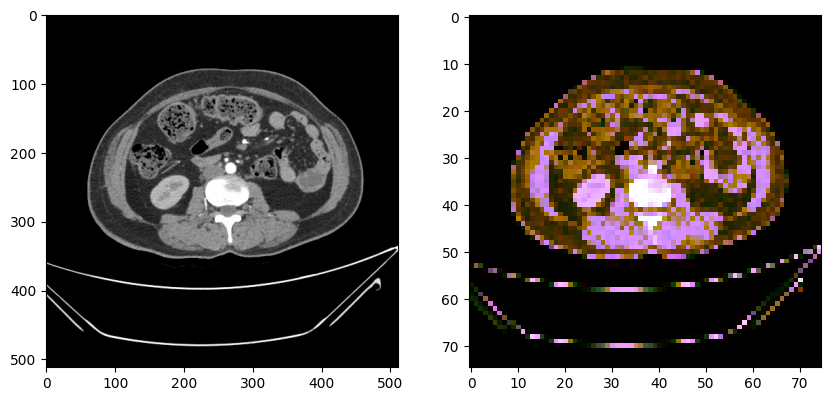

IndexError: ignored

In [ ]:
for i in range(10):
  image,pre_image=load_and_preprocess_image(combined.iloc[int(np.random.randint(1,62500,1)),0],(75,75,3))
  plt.figure(figsize=(10,10))
  plt.subplot(1,2,1)
  plt.imshow(image)
  plt.subplot(1,2,2)
  plt.imshow(pre_image)
  plt.show()


In [ ]:
np.random.seed(42)
train=combined.iloc[0:int(len(combined)*0.8),:]
others=combined.iloc[int(len(combined)*0.8):,:]
validation=others.iloc[0:int(len(others)*0.5),:]
test=others.iloc[int(len(others)*0.5):,:]





class CancerImageDataGenerator(tf.keras.utils.Sequence):
    def __init__(self,data=combined,batch_size=256,image_size=(100,100)):
        self.data=data
        self.image_size=image_size
        self.batch_size=batch_size
        self.num_main_class=len(self.data.main_class.unique())
        self.num_sub_class=len(self.data.sub_class.unique())
        self.indexes=np.arange(len(self.data))
        self.current_index = 0
    def __len__(self):
        return int(np.ceil(len(self.data)/self.batch_size))

    def __getitem__(self, index):
        start_idx = index * self.batch_size
        end_idx = (index + 1) * self.batch_size

        batch_indexes = self.indexes[start_idx:end_idx]
        X, y_main, y_sub = self.__data_generation(batch_indexes)

        return X, [y_main, y_sub]

    def on_epoch_end(self):
        np.random.shuffle(self.indexes)
    def __iter__(self):
        return self
    def __next__(self):
        if self.current_index >= len(self):
            # If we have iterated over all batches, reset the index and raise StopIteration
            self.current_index = 0
            raise StopIteration
        else:
            # Get the next batch and increment the current index
            batch_X, batch_Y = self.__getitem__(self.current_index)
            self.current_index += 1
            return batch_X, batch_Y

    def __data_generation(self, batch_indexes):
        X = np.empty((len(batch_indexes), *self.image_size, 3))
        y_main = np.empty((len(batch_indexes)), dtype=int)
        y_sub = np.empty((len(batch_indexes)), dtype=int)

        for i, idx in enumerate(batch_indexes):
            image_path = self.data.iloc[idx]['image_path']
            img = load_and_preprocess_image(image_path, self.image_size)
            X[i,] = img
            y_main[i] = self.data.iloc[idx]['int_main_class']
            y_sub[i] = self.data.iloc[idx]['int_sub_class']

        y_main = to_categorical(y_main, num_classes=self.num_main_class)
        y_sub = to_categorical(y_sub, num_classes=self.num_sub_class)

        return X, y_main, y_sub



#def load_and_preprocess_image(image_path, image_size):
    # Load and preprocess the image using your preferred image processing library (e.g., PIL, OpenCV)
    # You may need to resize, normalize, and perform other preprocessing steps.
    # Here's a simple example using TensorFlow and tf.image:
#    image = tf.io.read_file(image_path)
#    image = tf.image.decode_jpeg(image, channels=3)
#    image = tf.image.resize(image, image_size)
 #   image = tf.image.convert_image_dtype(image, tf.float32)
    #image = (image - 0.5) * 2.0  # Normalize to range [-1, 1]
 #   image=image/(255.0)
 #   return image
def load_and_preprocess_image(image_path, image_size):
    # Load the image using OpenCV
    image = cv2.imread(image_path)  # Load in BGR format

    # Split the image into three channels
    b, g, r = cv2.split(image)

    # Apply individual processing to each channel (you can customize these steps)
    b = cv2.equalizeHist(b)  # Example: Histogram Equalization for the blue channel
    g = cv2.GaussianBlur(g, (5, 5), 0)  # Example: Gaussian Blur for the green channel
    erode = cv2.erode(r, None, iterations = 3)
    r = cv2.dilate(erode, None, iterations = 3)
    #r = cv2.threshold(r, 128, 255, cv2.THRESH_BINARY)[1]  # Example: Binary Thresholding for the red channel

    # Merge the channels back together
    processed_image = cv2.merge([b, g, r])

    # Resize the image to the desired size
    processed_image = cv2.resize(processed_image, (image_size[0], image_size[1]))

    # Normalize pixel values to the range [0, 1]
    processed_image = processed_image.astype(np.float32) / 255.0

    return processed_image

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

batch_size = 256
np.random.seed(42)
train_Generator = CancerImageDataGenerator(data=train, batch_size=batch_size)
validation_Generator = CancerImageDataGenerator(data=validation, batch_size=batch_size)
test_Generator = CancerImageDataGenerator(data=test, batch_size=batch_size)


In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import  VGG16, InceptionV3, ResNet50,ResNet152V2,MobileNetV2,DenseNet201, Xception, EfficientNetB0,NASNetLarge,EfficientNetV2L,ConvNeXtTiny,ConvNeXtLarge
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

NUM_CLASSES = 23
IMG_SIZE = 75  # replace with your desired image size

# Define a list of pre-trained models
results = pd.DataFrame()
columns=['Model', 'Main Accuracy', 'Sub Accuracy','Test Main Accuracy','Test Sub Accuracy']
pretrained_models = [InceptionV3,Xception]

# Create a DataFrame to store the results


for model_class in pretrained_models:
    # Load pre-trained model
    np.random.seed(42)
    base_model = model_class(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

    # Custom input layer
    input_tensor = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    #x = Conv2D(3, (3, 3), padding='same')(input_tensor)  # Convert single-channel (grayscale) input to 3 channels

    # Connect the custom input layer to the pre-trained model
    pretrained_out = base_model(input_tensor)

    # Flatten the output of the pre-trained model
    flatten = Flatten()(pretrained_out)

    # Main and sub Dense layers with BatchNormalization and Dropout
    dense_main = Dense(512, activation='relu')(flatten)
    batch_norm_main = BatchNormalization()(dense_main)
    dropout_main = Dropout(0.5)(batch_norm_main)

    dense_main_2 = Dense(512, activation='relu')(dropout_main)
    batch_norm_main_2 = BatchNormalization()(dense_main_2)
    dropout_main_2 = Dropout(0.5)(batch_norm_main_2)

    dense_sub = Dense(512, activation='relu')(flatten)
    batch_norm_sub = BatchNormalization()(dense_sub)
    dropout_sub = Dropout(0.5)(batch_norm_sub)

    dense_sub2 = Dense(512, activation='relu')(dropout_sub)
    batch_norm_sub2 = BatchNormalization()(dense_sub2)
    dropout_sub2 = Dropout(0.5)(batch_norm_sub2)

    # Output layers
    output_main = Dense(train_Generator.num_main_class, activation='softmax', name='output_main')(dropout_main_2)
    output_sub = Dense(train_Generator.num_sub_class, activation='softmax', name='output_sub')(dropout_sub2)

    # Create the model
    model = Model(inputs=input_tensor, outputs=[output_main, output_sub])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
                  loss=['categorical_crossentropy', 'categorical_crossentropy'],
                  metrics=['accuracy'])

    # ModelCheckpoint callback
    checkpoint = ModelCheckpoint(f'best_model_{model_class.__name__}.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)




    # Fit the model using the generators
    history = model.fit(
        train_Generator,
        steps_per_epoch=len(train_Generator),
        epochs=30,  # Adjust the number of epochs as needed
        validation_data=validation_Generator,
        validation_steps=len(validation_Generator),
        callbacks=[checkpoint],  # Optional: You can add more callbacks as needed
        verbose=1
    )

    # Evaluate the model on the test set
    test_results = model.evaluate(test_Generator, verbose=1)
    #print(test_results)

    # Save the evaluation results to the DataFrame
    model_name = model_class.__name__
    main_acc =  history.history['output_main_accuracy'][-1]
    sub_acc = history.history['output_sub_accuracy'][-1]
    test_main_acc = test_results[-2]
    test_sub_acc = test_results[-1]

    # Append a new row to the DataFrame
    results = pd.concat([results, pd.DataFrame([[model_name, main_acc, sub_acc, test_main_acc, test_sub_acc]], columns=columns)], ignore_index=True)

# Save the results to a CSV file
results.to_csv('model_results.csv', index=False)

# Print the results
print(results)

# Create a LaTeX table
latex_table = results.to_latex(index=False)
with open('model_results.tex', 'w') as f:
    f.write(latex_table)


87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/30
98/98 [==============================] - ETA: 0s - loss: 1.7723 - output_main_loss: 0.3465 - output_sub_loss: 1.4258 - output_main_accuracy: 0.8916 - output_sub_accuracy: 0.5448

98/98 [==============================] - 310s 3s/step - loss: 1.7723 - output_main_loss: 0.3465 - output_sub_loss: 1.4258 - output_main_accuracy: 0.8916 - output_sub_accuracy: 0.5448 - val_loss: 360.1179 - val_output_main_loss: 83.8224 - val_output_sub_loss: 276.2955 - val_output_main_accuracy: 0.1731 - val_output_sub_accuracy: 0.0768
Epoch 2/30
98/98 [==============================] - ETA: 0s - loss: 0.4435 - output_main_loss: 0.0433 - output_sub_loss: 0.4001 - output_main_accuracy: 0.9894 - output_sub_accuracy: 0.8583

98/98 [==============================] - 197s 2s/step - loss: 0.4435 - output_main_loss: 0.0433 - output_sub_loss: 0.4001 - output_main_accuracy: 0.9894 - output_sub_accuracy: 0.8583 - val_loss: 1.4040 - val_output_main_loss: 0.3746 - val_output_sub_loss: 1.0294 - val_output_main_accuracy: 0.8931 - val_output_sub_accuracy: 0.7162
Epoch 3/30
98/98 [==============================] - ETA: 0s - loss: 0.2505 - output_main_loss: 0.0256 - output_sub_loss: 0.2250 - output_main_accuracy: 0.9936 - output_sub_accuracy: 0.9250

98/98 [==============================] - 192s 2s/step - loss: 0.2505 - output_main_loss: 0.0256 - output_sub_loss: 0.2250 - output_main_accuracy: 0.9936 - output_sub_accuracy: 0.9250 - val_loss: 0.4132 - val_output_main_loss: 0.0356 - val_output_sub_loss: 0.3777 - val_output_main_accuracy: 0.9914 - val_output_sub_accuracy: 0.8614
Epoch 4/30
16/98 [===>..........................] - ETA: 2:17 - loss: 0.1805 - output_main_loss: 0.0149 - output_sub_loss: 0.1656 - output_main_accuracy: 0.9958 - output_sub_accuracy: 0.9470

KeyboardInterrupt: ignored

In [ ]:
combined[combined.main_class=='OralCancer'].sub_class.unique()

array(['oral_normal', 'oral_scc'], dtype=object)

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.layers import Flatten, Dense, Dropout
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, LearningRateScheduler, EarlyStopping
# # Define your image size and input shape
# image_size = (100, 100)
# input_shape = (*image_size, 3)

# # Load the pre-trained VGG16 model and freeze its layers
# base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# for layer in base_model.layers:
#     layer.trainable = False

# # Add custom layers and apply dropout
# flatten = Flatten()(base_model.output)
# dense_main = Dense(256, activation='relu')(flatten)
# dropout_main = Dropout(0.5)(dense_main)  # Add dropout layer with a dropout rate of 0.5

# dense_sub = Dense(256, activation='relu')(flatten)
# dropout_sub = Dropout(0.5)(dense_sub)  # Add dropout layer with a dropout rate of 0.5

# output_main = Dense(train_Generator.num_main_class, activation='softmax')(dropout_main)
# output_sub = Dense(train_Generator.num_sub_class, activation='softmax')(dropout_sub)


# model = Model(inputs=base_model.input, outputs=[output_main, output_sub])

# model.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
#               loss=['categorical_crossentropy', 'categorical_crossentropy'],
#               metrics=['accuracy'])


# checkpoint = ModelCheckpoint("vgg_best_model.h5", monitor='val_loss', save_best_only=True, mode='min')


# tensorboard = TensorBoard(log_dir='./logs', histogram_freq=1)


# epochs = 20
# batch_size = 256


# def lr_scheduler(epoch):
#     if epoch < 10:
#         return 0.001
#     else:
#         return 0.0001

# lr_schedule = LearningRateScheduler(lr_scheduler)


# early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)


# vgg_history = model.fit_generator(train_Generator, epochs=epochs, validation_data=validation_Generator,
#                     callbacks=[checkpoint, tensorboard, lr_schedule, early_stopping])


# model.evaluate(test_Generator)
# import pickle

# with open('vgg_history.pkl', 'wb') as file:
#     pickle.dump(vgg_history.history, file)

In [ ]:
combined

,image_path,sub_class,main_class,int_main_class,int_sub_class
59887,/content/Multi Cancer/Oral Cancer/oral_normal/...,oral_normal,OralCancer,7,23
53868,/content/Multi Cancer/Lymphoma/lymph_cll/lymph...,lymph_cll,Lymphoma,6,21
57287,/content/Multi Cancer/Lymphoma/lymph_fl/lymph_...,lymph_fl,Lymphoma,6,22
37007,/content/Multi Cancer/Kidney Cancer/kidney_nor...,kidney_normal,KidneyCancer,4,14
34309,/content/Multi Cancer/Cervical Cancer/cervix_s...,cervix_sfi,CervicalCancer,3,13
...,...,...,...,...,...
54343,/content/Multi Cancer/Lymphoma/lymph_cll/lymph...,lymph_cll,Lymphoma,6,21
38158,/content/Multi Cancer/Kidney Cancer/kidney_tum...,kidney_tumor,KidneyCancer,4,15
860,/content/Multi Cancer/ALL/all_benign/all_benig...,all_benign,All,0,0
15795,/content/Multi Cancer/Brain Cancer/brain_tumor...,brain_tumor,BrainCancer,1,6


In [ ]:
combined['main_class']=combined.main_class.astype(str)
combined['sub_class']=combined.sub_class.astype(str)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential

# Load your CSV file containing image labels and locations
# csv_file = 'image_data.csv'  # Replace with your CSV file path
# data = pd.read_csv(csv_file)

# Split the data into output block 1 (long_labels) and output block 2 (numeric)


In [ ]:

# output_block1_data = combined[['image_path', 'main_class']]
# output_block2_data = combined[['image_path', 'sub_class']]
# # Split the data into training and validation sets for both output blocks
# output_block1_train, output_block1_val = train_test_split(output_block1_data, test_size=0.2, random_state=42)
# output_block2_train, output_block2_val = train_test_split(output_block2_data, test_size=0.2, random_state=42)

# # Define the CNN models for each character category in output block 2
# categories = list(combined.main_class.unique()) # Replace with your specific character categories
# models = {}

# for category in categories:
#     # Create a model for the current character category
#     IMG_SIZE=100
#     inputs = Input(shape = (IMG_SIZE, IMG_SIZE, 3))

#     model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1))(inputs)
#     model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
#     model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
#     model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
#     model = BatchNormalization(momentum=0.15)(model)
#     model = MaxPool2D(pool_size=(2, 2))(model)
#     model = Conv2D(filters=32, kernel_size=(5, 5), padding='SAME', activation='relu')(model)
#     model = Dropout(rate=0.3)(model)

#     model = Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
#     model = Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
#     model = Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
#     model = Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
#     model = BatchNormalization(momentum=0.15)(model)
#     model = MaxPool2D(pool_size=(2, 2))(model)
#     model = Conv2D(filters=64, kernel_size=(5, 5), padding='SAME', activation='relu')(model)
#     model = BatchNormalization(momentum=0.15)(model)
#     model = Dropout(rate=0.3)(model)

#     model = Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
#     model = Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
#     model = Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
#     model = Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
#     model = BatchNormalization(momentum=0.15)(model)
#     model = MaxPool2D(pool_size=(2, 2))(model)
#     model = Conv2D(filters=128, kernel_size=(5, 5), padding='SAME', activation='relu')(model)
#     model = BatchNormalization(momentum=0.15)(model)
#     model = Dropout(rate=0.3)(model)

#     model = Conv2D(filters=256, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
#     model = Conv2D(filters=256, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
#     model = Conv2D(filters=256, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
#     model = Conv2D(filters=256, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
#     model = BatchNormalization(momentum=0.15)(model)
#     model = MaxPool2D(pool_size=(2, 2))(model)
#     model = Conv2D(filters=256, kernel_size=(5, 5), padding='SAME', activation='relu')(model)
#     model = BatchNormalization(momentum=0.15)(model)
#     model = Dropout(rate=0.3)(model)

#     model = Flatten()(model)
#     model = Dense(4096, activation = "relu")(model)
#     model = Dropout(rate=0.3)(model)
#     dense = Dense(4096, activation = "relu")(model)

#     head_root = Dense(8, activation = 'softmax',name='output1')(dense)


#     model = Model(inputs=inputs, outputs=[head_root])

#         # Compile the model
#     model.compile(optimizer='adam',
#                       loss={'output1': 'categorical_crossentropy'},
#                       metrics={'output1': 'accuracy'})

#     models[category] = model

# # Create data generators for image augmentation and preprocessing
# datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# output_block1_batch_size = 512
# output_block2_batch_size = 512

# output_block1_train_generator = datagen.flow_from_dataframe(
#     dataframe=output_block1_train,
#     x_col='image_path',
#     y_col='main_class',
#     class_mode='categorical',
#     target_size=(IMG_SIZE, IMG_SIZE),
#     batch_size=output_block1_batch_size
# )

# output_block2_train_generator = datagen.flow_from_dataframe(
#     dataframe=output_block2_train,
#     x_col='image_path',
#     y_col='sub_class',
#     class_mode='categorical',
#     target_size=(IMG_SIZE, IMG_SIZE),
#     batch_size=output_block2_batch_size
# )

# output_block1_val_generator = datagen.flow_from_dataframe(
#     dataframe=output_block1_val,
#     x_col='image_path',
#     y_col='main_class',
#     class_mode='categorical',
#     target_size=(IMG_SIZE, IMG_SIZE),
#     batch_size=output_block1_batch_size
# )

# output_block2_val_generator = datagen.flow_from_dataframe(
#     dataframe=output_block2_val,
#     x_col='image_path',
#     y_col='sub_class',
#     class_mode='categorical',
#     target_size=(IMG_SIZE, IMG_SIZE),
#     batch_size=output_block2_batch_size
# )

# # Train the models for each character category in output block 2
# for category in categories:
#     model = models[category]
#     train_generator = output_block2_train_generator
#     val_generator = output_block2_val_generator

#     model.fit(
#         train_generator,
#         epochs=10,  # Adjust the number of epochs
#         validation_data=val_generator
#     )

# # Now, you can combine the models and make predictions as needed for your specific use case.

In [ ]:

# import pandas as pd
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout, Input
# from tensorflow.keras.models import Model

# # Assuming 'main_class' and 'sub_class' are string columns, convert them to a categorical type
# combined['main_class'] = combined['main_class'].astype('category')
# combined['sub_class'] = combined['sub_class'].astype('category')

# combined['main_class_code'] = combined['main_class'].cat.codes

# # Split the data into output block 1 (main_class) and output block 2 (sub_class)
# output_block1_data = combined[['image_path', 'main_class_code']]
# output_block2_data = combined[['image_path', 'sub_class']]

# output_block1_train, output_block1_val = train_test_split(output_block1_data, test_size=0.2, random_state=42)
# output_block2_train, output_block2_val = train_test_split(output_block2_data, test_size=0.2, random_state=42)

# # Define the CNN model for main_class prediction
# IMG_SIZE = 100
# inputs_main = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# main_model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3))(inputs_main)
# # Add layers as needed
# main_model = Flatten()(main_model)
# main_model = Dense(256, activation='relu')(main_model)
# main_model = Dense(combined['main_class'].nunique(), activation='softmax', name='output_main')(main_model)

# model_main = Model(inputs=inputs_main, outputs=[main_model])

# model_main.compile(optimizer='adam',
#                   loss={'output_main': 'categorical_crossentropy'},
#                   metrics={'output_main': 'accuracy'})

# # Create data generator for main_class prediction
# datagen_main = ImageDataGenerator(rescale=1.0 / 255.0)

# output_block1_batch_size = 512

# output_block1_train_generator = datagen_main.flow_from_dataframe(
#     dataframe=output_block1_train,
#     x_col='image_path',
#     y_col='main_class_code',
#     class_mode='categorical',
#     target_size=(IMG_SIZE, IMG_SIZE),
#     batch_size=output_block1_batch_size
# )

# output_block1_val_generator = datagen_main.flow_from_dataframe(
#     dataframe=output_block1_val,
#     x_col='image_path',
#     y_col='main_class_code',
#     class_mode='categorical',
#     target_size=(IMG_SIZE, IMG_SIZE),
#     batch_size=output_block1_batch_size
# )

# # Train the main_class prediction model
# model_main.fit(
#     output_block1_train_generator,
#     epochs=10,  # Adjust the number of epochs
#     validation_data=output_block1_val_generator
# )

# # Now, for each unique main_class, train a separate model for sub_class
# main_classes = combined['main_class'].unique()
# sub_models = {}

# for main_class in main_classes:
#     # Filter data for the current main_class
#     sub_block2_train = output_block2_train[output_block2_train['main_class'] == main_class]
#     sub_block2_val = output_block2_val[output_block2_val['main_class'] == main_class]

#     # Create a model for the current main_class
#     inputs_sub = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
#     sub_model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3))(inputs_sub)
#     # Add layers as needed
#     sub_model = Flatten()(sub_model)
#     sub_model = Dense(256, activation='relu')(sub_model)
#     sub_model = Dense(sub_block2_train['sub_class'].nunique(), activation='softmax', name=f'output_{main_class}')(sub_model)

#     model_sub = Model(inputs=inputs_sub, outputs=[sub_model])

#     model_sub.compile(optimizer='adam',
#                       loss={f'output_{main_class}': 'categorical_crossentropy'},
#                       metrics={f'output_{main_class}': 'accuracy'})

#     # Create data generator for sub_class prediction
#     datagen_sub = ImageDataGenerator(rescale=1.0 / 255.0)

#     output_block2_batch_size = 512

#     output_block2_train_generator = datagen_sub.flow_from_dataframe(
#         dataframe=sub_block2_train,
#         x_col='image_path',
#         y_col='sub_class',
#         class_mode='categorical',
#         target_size=(IMG_SIZE, IMG_SIZE),
#         batch_size=output_block2_batch_size
#     )

#     output_block2_val_generator = datagen_sub.flow_from_dataframe(
#         dataframe=sub_block2_val,
#         x_col='image_path',
#         y_col='sub_class',
#         class_mode='categorical',
#         target_size=(IMG_SIZE, IMG_SIZE),
#         batch_size=output_block2_batch_size
#     )

#     # Train the sub_class prediction model for the current main_class
#     model_sub.fit(
#         output_block2_train_generator,
#         epochs=10,  # Adjust the number of epochs
#         validation_data=output_block2_val_generator
#     )

#     sub_models[main_class] = model_sub

# # Now, you can use model_main to predict main_class and then use the corresponding sub_model for sub_class prediction.


In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout, Input
# from tensorflow.keras.models import Model

# # Assuming 'main_class' and 'sub_class' are string columns, convert them to a categorical type
# combined['main_class'] = combined['main_class'].astype('category')
# combined['sub_class'] = combined['sub_class'].astype('category')

# combined['main_class_code'] = combined['main_class'].cat.codes

# # Split the data into output block 1 (main_class) and output block 2 (sub_class)
# output_block1_data = combined[['image_path', 'main_class']]
# output_block2_data = combined[['image_path', 'sub_class']]

# output_block1_train, output_block1_val = train_test_split(output_block1_data, test_size=0.2, random_state=42)
# output_block2_train, output_block2_val = train_test_split(output_block2_data, test_size=0.2, random_state=42)

# # Define the CNN model for main_class prediction
# IMG_SIZE = 100
# inputs_main = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# main_model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3))(inputs_main)
# # Add layers as needed
# main_model = Flatten()(main_model)
# main_model = Dense(256, activation='relu')(main_model)
# main_model = Dense(combined['main_class'].nunique(), activation='softmax', name='output_main')(main_model)

# model_main = Model(inputs=inputs_main, outputs=[main_model])

# model_main.compile(optimizer='adam',
#                   loss={'output_main': 'categorical_crossentropy'},
#                   metrics={'output_main': 'accuracy'})

# # Create data generator for main_class prediction
# datagen_main = ImageDataGenerator(rescale=1.0 / 255.0)

# output_block1_batch_size = 512

# output_block1_train_generator = datagen_main.flow_from_dataframe(
#     dataframe=output_block1_train,
#     x_col='image_path',
#     y_col='main_class',
#     class_mode='categorical',
#     target_size=(IMG_SIZE, IMG_SIZE),
#     batch_size=output_block1_batch_size
# )

# output_block1_val_generator = datagen_main.flow_from_dataframe(
#     dataframe=output_block1_val,
#     x_col='image_path',
#     y_col='main_class',
#     class_mode='categorical',
#     target_size=(IMG_SIZE, IMG_SIZE),
#     batch_size=output_block1_batch_size
# )

# # Train the main_class prediction model
# model_main.fit(
#     output_block1_train_generator,
#     epochs=1,  # Adjust the number of epochs
#     validation_data=output_block1_val_generator
# )

# # Now, for each unique main_class, train a separate model for sub_class
# main_classes = combined['main_class'].unique()
# sub_models = {}

# for main_class in main_classes:
#     # Filter data for the current main_class
#     sub_block2_train = output_block2_train[output_block2_train['main_class'] == main_class]
#     sub_block2_val = output_block2_val[output_block2_val['main_class'] == main_class]

#     # Create a model for the current main_class
#     inputs_sub = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
#     sub_model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3))(inputs_sub)
#     # Add layers as needed
#     sub_model = Flatten()(sub_model)
#     sub_model = Dense(256, activation='relu')(sub_model)
#     sub_model = Dense(sub_block2_train['sub_class'].nunique(), activation='softmax', name=f'output_{main_class}')(sub_model)

#     model_sub = Model(inputs=inputs_sub, outputs=[sub_model])

#     model_sub.compile(optimizer='adam',
#                       loss={f'output_{main_class}': 'categorical_crossentropy'},
#                       metrics={f'output_{main_class}': 'accuracy'})

#     # Create data generator for sub_class prediction
#     datagen_sub = ImageDataGenerator(rescale=1.0 / 255.0)

#     output_block2_batch_size = 512

#     output_block2_train_generator = datagen_sub.flow_from_dataframe(
#         dataframe=sub_block2_train,
#         x_col='image_path',
#         y_col='sub_class',
#         class_mode='categorical',
#         target_size=(IMG_SIZE, IMG_SIZE),
#         batch_size=output_block2_batch_size
#     )

#     output_block2_val_generator = datagen_sub.flow_from_dataframe(
#         dataframe=sub_block2_val,
#         x_col='image_path',
#         y_col='sub_class',
#         class_mode='categorical',
#         target_size=(IMG_SIZE, IMG_SIZE),
#         batch_size=output_block2_batch_size
#     )

#     # Train the sub_class prediction model for the current main_class
#     model_sub.fit(
#         output_block2_train_generator,
#         epochs=1,  # Adjust the number of epochs
#         validation_data=output_block2_val_generator
#     )

#     sub_models[main_class] = model_sub

# # Now, you can use model_main to predict main_class and then use the corresponding sub_model for sub_class prediction.


In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout, Input
# from tensorflow.keras.models import Model

# # Assuming 'main_class' and 'sub_class' are string columns, convert them to a categorical type
# combined['main_class'] = combined['main_class'].astype('category')
# combined['sub_class'] = combined['sub_class'].astype('category')

# combined['main_class_code'] = combined['main_class'].cat.codes

# # Split the data into output block 1 (main_class) and output block 2 (sub_class)
# output_block1_data = combined[['image_path', 'main_class']]
# output_block2_data = combined[['image_path', 'sub_class', 'main_class']]  # Include 'main_class' column here

# output_block1_train, output_block1_val = train_test_split(output_block1_data, test_size=0.2, random_state=42)
# output_block2_train, output_block2_val = train_test_split(output_block2_data, test_size=0.2, random_state=42)

# # Define the CNN model for main_class prediction
# IMG_SIZE = 100
# inputs_main = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# main_model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3))(inputs_main)
# # Add layers as needed
# main_model = Flatten()(main_model)
# main_model = Dense(256, activation='relu')(main_model)
# main_model = Dense(combined['main_class'].nunique(), activation='softmax', name='output_main')(main_model)

# model_main = Model(inputs=inputs_main, outputs=[main_model])

# model_main.compile(optimizer='adam',
#                   loss={'output_main': 'categorical_crossentropy'},
#                   metrics={'output_main': 'accuracy'})

# # Create data generator for main_class prediction
# datagen_main = ImageDataGenerator(rescale=1.0 / 255.0)

# output_block1_batch_size = 512

# output_block1_train_generator = datagen_main.flow_from_dataframe(
#     dataframe=output_block1_train,
#     x_col='image_path',
#     y_col='main_class',
#     class_mode='categorical',
#     target_size=(IMG_SIZE, IMG_SIZE),
#     batch_size=output_block1_batch_size
# )

# output_block1_val_generator = datagen_main.flow_from_dataframe(
#     dataframe=output_block1_val,
#     x_col='image_path',
#     y_col='main_class',
#     class_mode='categorical',
#     target_size=(IMG_SIZE, IMG_SIZE),
#     batch_size=output_block1_batch_size
# )

# # Train the main_class prediction model
# model_main.fit(
#     output_block1_train_generator,
#     epochs=1,  # Adjust the number of epochs
#     validation_data=output_block1_val_generator
# )

# # Now, for each unique main_class, train a separate model for sub_class
# main_classes = combined['main_class'].unique()
# sub_models = {}

# for main_class in main_classes:
#     # Filter data for the current main_class
#     sub_block2_train = output_block2_train[output_block2_train['main_class'] == main_class]
#     sub_block2_val = output_block2_val[output_block2_val['main_class'] == main_class]

#     # Create a model for the current main_class
#     inputs_sub = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
#     sub_model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3))(inputs_sub)
#     # Add layers as needed
#     sub_model = Flatten()(sub_model)
#     sub_model = Dense(256, activation='relu')(sub_model)
#     sub_model = Dense(sub_block2_train['sub_class'].nunique(), activation='softmax', name=f'output_{main_class}')(sub_model)

#     model_sub = Model(inputs=inputs_sub, outputs=[sub_model])

#     model_sub.compile(optimizer='adam',
#                       loss={f'output_{main_class}': 'categorical_crossentropy'},
#                       metrics={f'output_{main_class}': 'accuracy'})

#     # Create data generator for sub_class prediction
#     datagen_sub = ImageDataGenerator(rescale=1.0 / 255.0)

#     output_block2_batch_size = 512

#     output_block2_train_generator = datagen_sub.flow_from_dataframe(
#         dataframe=sub_block2_train,
#         x_col='image_path',
#         y_col='sub_class',
#         class_mode='categorical',
#         target_size=(IMG_SIZE, IMG_SIZE),
#         batch_size=output_block2_batch_size
#     )

#     output_block2_val_generator = datagen_sub.flow_from_dataframe(
#         dataframe=sub_block2_val,
#         x_col='image_path',
#         y_col='sub_class',
#         class_mode='categorical',
#         target_size=(IMG_SIZE, IMG_SIZE),
#         batch_size=output_block2_batch_size
#     )

#     # Train the sub_class prediction model for the current main_class
#     model_sub.fit(
#         output_block2_train_generator,
#         epochs=1,  # Adjust the number of epochs
#         validation_data=output_block2_val_generator
#     )

#     sub_models[main_class] = model_sub

# # Now, you can use model_main to predict main_class and then use the corresponding sub_model for sub_class prediction.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.models import Model

# Assuming 'main_class' and 'sub_class' are string columns, convert them to a categorical type
combined['main_class'] = combined['main_class'].astype('category')
combined['sub_class'] = combined['sub_class'].astype('category')

combined['main_class_code'] = combined['main_class'].cat.codes

# Split the data into output block 1 (main_class) and output block 2 (sub_class)
output_block1_data = combined[['image_path', 'main_class']]
output_block2_data = combined[['image_path', 'sub_class', 'main_class']]  # Include 'main_class' column here

output_block1_train, output_block1_val = train_test_split(output_block1_data, test_size=0.2, random_state=42)
output_block2_train, output_block2_val = train_test_split(output_block2_data, test_size=0.2, random_state=42)

# Define the VGG16 model for feature extraction
IMG_SIZE = (100,100)  # VGG16 input size
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create the main_class prediction model using VGG16
inputs_main = Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
x = base_model(inputs_main)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
main_model = Dense(combined['main_class'].nunique(), activation='softmax', name='output_main')(x)

model_main = Model(inputs=inputs_main, outputs=[main_model])

model_main.compile(optimizer='adam',
                  loss={'output_main': 'categorical_crossentropy'},
                  metrics={'output_main': 'accuracy'})

# Create data generator for main_class prediction
datagen_main = ImageDataGenerator(rescale=1.0 / 255.0)

output_block1_batch_size = 512  # Decrease the batch size for fine-tuning

output_block1_train_generator = datagen_main.flow_from_dataframe(
    dataframe=output_block1_train,
    x_col='image_path',
    y_col='main_class',
    class_mode='categorical',
    target_size=IMG_SIZE,
    batch_size=output_block1_batch_size
)

output_block1_val_generator = datagen_main.flow_from_dataframe(
    dataframe=output_block1_val,
    x_col='image_path',
    y_col='main_class',
    class_mode='categorical',
    target_size=IMG_SIZE,
    batch_size=output_block1_batch_size
)

# Train the main_class prediction model
model_main.fit(
    output_block1_train_generator,
    epochs=20,  # Adjust the number of epochs
    validation_data=output_block1_val_generator
)

# Now, for each unique main_class, train a separate model for sub_class using the same VGG16 base model
main_classes = combined['main_class'].unique()
sub_models = {}

for main_class in main_classes:
    # Filter data for the current main_class
    sub_block2_train = output_block2_train[output_block2_train['main_class'] == main_class]
    sub_block2_val = output_block2_val[output_block2_val['main_class'] == main_class]

    # Create the sub_class prediction model for the current main_class
    inputs_sub = Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
    x = base_model(inputs_sub)
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    sub_model = Dense(sub_block2_train['sub_class'].nunique(), activation='softmax', name=f'output_{main_class}')(x)

    model_sub = Model(inputs=inputs_sub, outputs=[sub_model])

    model_sub.compile(optimizer='adam',
                      loss={f'output_{main_class}': 'categorical_crossentropy'},
                      metrics={f'output_{main_class}': 'accuracy'})

    # Create data generator for sub_class prediction
    datagen_sub = ImageDataGenerator(rescale=1.0 / 255.0)

    output_block2_batch_size = 512  # Decrease the batch size for fine-tuning

    output_block2_train_generator = datagen_sub.flow_from_dataframe(
        dataframe=sub_block2_train,
        x_col='image_path',
        y_col='sub_class',
        class_mode='categorical',
        target_size=IMG_SIZE,
        batch_size=output_block2_batch_size
    )

    output_block2_val_generator = datagen_sub.flow_from_dataframe(
        dataframe=sub_block2_val,
        x_col='image_path',
        y_col='sub_class',
        class_mode='categorical',
        target_size=IMG_SIZE,
        batch_size=output_block2_batch_size
    )

    # Train the sub_class prediction model for the current main_class
    model_sub.fit(
        output_block2_train_generator,
        epochs=20,  # Adjust the number of epochs
        validation_data=output_block2_val_generator
    )

    sub_models[main_class] = model_sub

# Now, you can use model_main to predict main_class and then use the corresponding sub_model for sub_class prediction.


58889256/58889256 [==============================] - 0s 0us/step
Found 50000 validated image filenames belonging to 8 classes.
Found 12500 validated image filenames belonging to 8 classes.
Epoch 1/20
98/98 [==============================] - 290s 3s/step - loss: 0.2011 - accuracy: 0.9357 - val_loss: 0.0551 - val_accuracy: 0.9844
Epoch 2/20
98/98 [==============================] - 267s 3s/step - loss: 0.0434 - accuracy: 0.9871 - val_loss: 0.0413 - val_accuracy: 0.9878
Epoch 3/20
98/98 [==============================] - 232s 2s/step - loss: 0.0295 - accuracy: 0.9913 - val_loss: 0.0323 - val_accuracy: 0.9904
Epoch 4/20
98/98 [==============================] - 210s 2s/step - loss: 0.0229 - accuracy: 0.9928 - val_loss: 0.0439 - val_accuracy: 0.9847
Epoch 5/20
98/98 [==============================] - 179s 2s/step - loss: 0.0166 - accuracy: 0.9948 - val_loss: 0.0286 - val_accuracy: 0.9910
Epoch 6/20
98/98 [==============================] - 181s 2s/step - loss: 0.0121 - accuracy: 0.9965 - val_l

In [ ]:
# Save the main model architecture and weights
model_main.save('model_main.h5')

# Save the data generators for later use
output_block1_train_generator.save('output_block1_train_generator')
output_block1_val_generator.save('output_block1_val_generator')


In [ ]:
for main_class, model_sub in sub_models.items():
    # Save each sub model architecture and weights
    model_sub.save(f'model_sub_{main_class}.h5')

    # Save the corresponding data generators for later use
    output_block2_train_generator.save(f'output_block2_train_generator_{main_class}')
    output_block2_val_generator.save(f'output_block2_val_generator_{main_class}')


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the main model
loaded_model_main = load_model('model_main.h5')

# Load the data generators
loaded_output_block1_train_generator = ImageDataGenerator.load('output_block1_train_generator')
loaded_output_block1_val_generator = ImageDataGenerator.load('output_block1_val_generator')

# Load and compile each sub model
loaded_sub_models = {}
for main_class in main_classes:
    loaded_sub_model = load_model(f'model_sub_{main_class}.h5')
    loaded_sub_model.compile(optimizer='adam',
                             loss={f'output_{main_class}': 'categorical_crossentropy'},
                             metrics={f'output_{main_class}': 'accuracy'})
    loaded_sub_models[main_class] = loaded_sub_model

    # Load the corresponding data generators
    loaded_output_block2_train_generator = ImageDataGenerator.load(f'output_block2_train_generator_{main_class}')
    loaded_output_block2_val_generator = ImageDataGenerator.load(f'output_block2_val_generator_{main_class}')


In [ ]:
# Test the main model
main_model_predictions = loaded_model_main.predict(loaded_output_block1_val_generator)

# Test each sub model
for main_class, loaded_sub_model in loaded_sub_models.items():
    sub_model_predictions = loaded_sub_model.predict(loaded_output_block2_val_generator)
    # Further processing or evaluation based on sub_model_predictions


In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout, Input
# from tensorflow.keras.models import Model

# # Assuming 'main_class' and 'sub_class' are string columns, convert them to a categorical type
# combined['main_class'] = combined['main_class'].astype('category')
# combined['sub_class'] = combined['sub_class'].astype('category')

# combined['main_class_code'] = combined['main_class'].cat.codes

# # Split the data into output block 1 (main_class) and output block 2 (sub_class)
# output_block1_data = combined[['image_path', 'main_class']]
# output_block2_data = combined[['image_path', 'sub_class']]

# output_block1_train, output_block1_val = train_test_split(output_block1_data, test_size=0.2, random_state=42)
# output_block2_train, output_block2_val = train_test_split(output_block2_data, test_size=0.2, random_state=42)

# # Define the CNN model for main_class prediction
# IMG_SIZE = 100
# inputs_main = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# main_model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3))(inputs_main)
# # Add layers as needed
# main_model = Flatten()(main_model)
# main_model = Dense(256, activation='relu')(main_model)
# main_model = Dense(combined['main_class'].nunique(), activation='softmax', name='output_main')(main_model)

# model_main = Model(inputs=inputs_main, outputs=[main_model])

# model_main.compile(optimizer='adam',
#                   loss={'output_main': 'categorical_crossentropy'},
#                   metrics={'output_main': 'accuracy'})

# # Create data generator for main_class prediction
# datagen_main = ImageDataGenerator(rescale=1.0 / 255.0)

# output_block1_batch_size = 512

# output_block1_train_generator = datagen_main.flow_from_dataframe(
#     dataframe=output_block1_train,
#     x_col='image_path',
#     y_col='main_class',
#     class_mode='categorical',
#     target_size=(IMG_SIZE, IMG_SIZE),
#     batch_size=output_block1_batch_size
# )

# output_block1_val_generator = datagen_main.flow_from_dataframe(
#     dataframe=output_block1_val,
#     x_col='image_path',
#     y_col='main_class',
#     class_mode='categorical',
#     target_size=(IMG_SIZE, IMG_SIZE),
#     batch_size=output_block1_batch_size
# )

# # Train the main_class prediction model
# model_main.fit(
#     output_block1_train_generator,
#     epochs=1,  # Adjust the number of epochs
#     validation_data=output_block1_val_generator
# )

# # Now, for each unique main_class, train a separate model for sub_class
# main_classes = combined['main_class'].unique()
# sub_models = {}

# for main_class in main_classes:
#     # Filter data for the current main_class in output_block2
#     sub_block2_train_current = output_block2_train[output_block2_train['main_class'] == main_class]
#     sub_block2_val_current = output_block2_val[output_block2_val['main_class'] == main_class]

#     # Create a model for the current main_class
#     inputs_sub = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
#     sub_model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3))(inputs_sub)
#     # Add layers as needed
#     sub_model = Flatten()(sub_model)
#     sub_model = Dense(256, activation='relu')(sub_model)
#     sub_model = Dense(sub_block2_train_current['sub_class'].nunique(), activation='softmax', name=f'output_{main_class}')(sub_model)

#     model_sub = Model(inputs=inputs_sub, outputs=[sub_model])

#     model_sub.compile(optimizer='adam',
#                       loss={f'output_{main_class}': 'categorical_crossentropy'},
#                       metrics={f'output_{main_class}': 'accuracy'})

#     # Create data generator for sub_class prediction
#     datagen_sub = ImageDataGenerator(rescale=1.0 / 255.0)

#     output_block2_batch_size = 512

#     output_block2_train_generator = datagen_sub.flow_from_dataframe(
#         dataframe=sub_block2_train_current,
#         x_col='image_path',
#         y_col='sub_class',
#         class_mode='categorical',
#         target_size=(IMG_SIZE, IMG_SIZE),
#         batch_size=output_block2_batch_size
#     )

#     output_block2_val_generator = datagen_sub.flow_from_dataframe(
#         dataframe=sub_block2_val_current,
#         x_col='image_path',
#         y_col='sub_class',
#         class_mode='categorical',
#         target_size=(IMG_SIZE, IMG_SIZE),
#         batch_size=output_block2_batch_size
#     )

#     # Train the sub_class prediction model for the current main_class
#     model_sub.fit(
#         output_block2_train_generator,
#         epochs=1,  # Adjust the number of epochs
#         validation_data=output_block2_val_generator
#     )

#     sub_models[main_class] = model_sub

# # Now, you can use model_main to predict main_class and then use the corresponding sub_model for sub_class prediction.


Found 50000 validated image filenames belonging to 8 classes.
Found 12500 validated image filenames belonging to 8 classes.
98/98 [==============================] - 226s 2s/step - loss: 8.2328 - accuracy: 0.7128 - val_loss: 0.2315 - val_accuracy: 0.9263


KeyError: ignored

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.models import Model

# Assuming 'main_class' and 'sub_class' are string columns, convert them to a categorical type
combined['main_class'] = combined['main_class'].astype('category')
combined['sub_class'] = combined['sub_class'].astype('category')

combined['main_class_code'] = combined['main_class'].cat.codes

# Split the data into output block 1 (main_class) and output block 2 (sub_class)
output_block1_data = combined[['image_path', 'main_class']]
output_block2_data = combined[['image_path', 'sub_class']]

output_block1_train, output_block1_val = train_test_split(output_block1_data, test_size=0.2, random_state=42)
output_block2_train, output_block2_val = train_test_split(output_block2_data, test_size=0.2, random_state=42)

# Define the CNN model for main_class prediction
IMG_SIZE = 100
#inputs_main = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

#main_model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3))(inputs_main)
# Add layers as needed
inputs_main = Input(shape = (IMG_SIZE, IMG_SIZE, 3))

model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1))(inputs_main)
model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=32, kernel_size=(5, 5), padding='SAME', activation='relu')(model)
model = Dropout(rate=0.3)(model)

model = Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=64, kernel_size=(5, 5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.3)(model)

model = Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=128, kernel_size=(5, 5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.3)(model)

model = Conv2D(filters=256, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = Conv2D(filters=256, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = Conv2D(filters=256, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = Conv2D(filters=256, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=256, kernel_size=(5, 5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.3)(model)

model = Flatten()(model)

main_model = Flatten()(model)
main_model = Dense(256, activation='relu')(main_model)
main_model = Dense(combined['main_class'].nunique(), activation='softmax', name='output_main')(main_model)

model_main = Model(inputs=inputs_main, outputs=[main_model])

model_main.compile(optimizer='adam',
                  loss={'output_main': 'categorical_crossentropy'},
                  metrics={'output_main': 'accuracy'})

# Create data generator for main_class prediction
datagen_main = ImageDataGenerator(rescale=1.0 / 255.0)

output_block1_batch_size = 512

output_block1_train_generator = datagen_main.flow_from_dataframe(
    dataframe=output_block1_train,
    x_col='image_path',
    y_col='main_class',
    class_mode='categorical',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=output_block1_batch_size
)

output_block1_val_generator = datagen_main.flow_from_dataframe(
    dataframe=output_block1_val,
    x_col='image_path',
    y_col='main_class',
    class_mode='categorical',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=output_block1_batch_size
)

# Train the main_class prediction model
model_main.fit(
    output_block1_train_generator,
    epochs=10,  # Adjust the number of epochs
    validation_data=output_block1_val_generator
)

# Now, for each unique main_class, train a separate model for sub_class
main_classes = combined['main_class'].unique()
sub_models = {}

for main_class in main_classes:
    # Filter data for the current main_class
    sub_block2_train = output_block2_train[output_block2_train['main_class'] == main_class]
    sub_block2_val = output_block2_val[output_block2_val['main_class'] == main_class]

    # Create a model for the current main_class
    inputs_sub = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    #sub_model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3))(inputs_sub)
    # Add layers as needed

    sub_model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3))(inputs_sub)
    sub_model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu')(sub_model)
    sub_model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu')(sub_model)
    sub_model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu')(sub_model)
    sub_model = BatchNormalization(momentum=0.15)(sub_model)
    sub_model = MaxPool2D(pool_size=(2, 2))(sub_model)
    sub_model = Conv2D(filters=32, kernel_size=(5, 5), padding='SAME', activation='relu')(sub_model)
    sub_model = Dropout(rate=0.3)(sub_model)

    sub_model = Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(sub_model)
    sub_model = Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(sub_model)
    sub_model = Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(sub_model)
    sub_model = Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(sub_model)
    sub_model = BatchNormalization(momentum=0.15)(sub_model)
    sub_model = MaxPool2D(pool_size=(2, 2))(sub_model)
    sub_model = Conv2D(filters=64, kernel_size=(5, 5), padding='SAME', activation='relu')(sub_model)
    sub_model = BatchNormalization(momentum=0.15)(sub_model)
    sub_model = Dropout(rate=0.3)(sub_model)

    sub_model = Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu')(sub_model)
    sub_model = Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu')(sub_model)
    sub_model = Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu')(sub_model)
    sub_model = Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu')(sub_model)
    sub_model = BatchNormalization(momentum=0.15)(sub_model)
    sub_model = MaxPool2D(pool_size=(2, 2))(sub_model)
    sub_model = Conv2D(filters=128, kernel_size=(5, 5), padding='SAME', activation='relu')(sub_model)
    sub_model = BatchNormalization(momentum=0.15)(sub_model)
    sub_model = Dropout(rate=0.3)(sub_model)

    sub_model = Conv2D(filters=256, kernel_size=(3, 3), padding='SAME', activation='relu')(sub_model)
    sub_model = Conv2D(filters=256, kernel_size=(3, 3), padding='SAME', activation='relu')(sub_model)
    sub_model = Conv2D(filters=256, kernel_size=(3, 3), padding='SAME', activation='relu')(sub_model)
    sub_model = Conv2D(filters=256, kernel_size=(3, 3), padding='SAME', activation='relu')(sub_model)
    sub_model = BatchNormalization(momentum=0.15)(sub_model)
    sub_model = MaxPool2D(pool_size=(2, 2))(sub_model)
    sub_model = Conv2D(filters=256, kernel_size=(5, 5), padding='SAME', activation='relu')(sub_model)
    sub_model = BatchNormalization(momentum=0.15)(sub_model)
    sub_model = Dropout(rate=0.3)(sub_model)


    sub_model = Flatten()(sub_model)
    sub_model = Dense(256, activation='relu')(sub_model)
    sub_model = Dense(sub_block2_train['sub_class'].nunique(), activation='softmax', name=f'output_{main_class}')(sub_model)

    model_sub = Model(inputs=inputs_sub, outputs=[sub_model])

    model_sub.compile(optimizer='adam',
                      loss={f'output_{main_class}': 'categorical_crossentropy'},
                      metrics={f'output_{main_class}': 'accuracy'})

    # Create data generator for sub_class prediction
    datagen_sub = ImageDataGenerator(rescale=1.0 / 255.0)

    output_block2_batch_size = 512

    output_block2_train_generator = datagen_sub.flow_from_dataframe(
        dataframe=sub_block2_train,
        x_col='image_path',
        y_col='sub_class',
        class_mode='categorical',
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=output_block2_batch_size
    )

    output_block2_val_generator = datagen_sub.flow_from_dataframe(
        dataframe=sub_block2_val,
        x_col='image_path',
        y_col='sub_class',
        class_mode='categorical',
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=output_block2_batch_size
    )

    # Train the sub_class prediction model for the current main_class
    model_sub.fit(
        output_block2_train_generator,
        epochs=20,  # Adjust the number of epochs
        validation_data=output_block2_val_generator
    )

    sub_models[main_class] = model_sub

# Now, you can use model_main to predict main_class and then use the corresponding sub_model for sub_class prediction.


NameError: ignored